## Processing with RN data obtained from forest sites

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
site_data = '../02_input_data/RN_sites_data.xlsx'
df = pd.read_excel(site_data, sheet_name='RN_filtration_data')
df.head()

,Ідентифікатор,Site #,Species,Species_ID,Ntrees at site,% composition,D_cm,H_m,G_m2_ha,N_ha,...,T_ag_Cs,ln_T_ag_Cs,T_ag_Sr,ln_T_ag_Sr,AEDR_count,AEDR_mean,AEDR_median,AEDR_std,Distance_km,Azimuth
0,81,001_2021,Pine,0,23,100.000000,26.060965,25.423284,49.081648,920,...,0.781087,-0.247069,9.004084,2.197678,26,3.524231,3.530,0.235489,5.926403,249
1,219,002_2021,Pine,0,60,90.178571,4.303100,4.705979,8.731641,6000,...,1.549336,0.437826,24.247024,3.188294,15,3.830667,3.780,0.166272,6.018960,249
2,224,003_2021,Pine,0,44,100.000000,28.142898,27.556869,54.703060,880,...,0.583447,-0.538802,9.304047,2.230449,28,0.483571,0.475,0.068931,13.046428,189
3,228,004_2021,Pine,0,23,100.000000,14.953551,8.506028,40.420188,2300,...,0.145072,-1.930528,5.279971,1.663921,20,0.364500,0.365,0.029576,12.741627,189
4,232,005_2021,Pine,0,26,100.000000,7.208435,3.425669,2.120687,520,...,0.254295,-1.369259,6.629225,1.891488,18,0.333333,0.345,0.036515,12.893213,189


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:
'Species', 'Species_ID', '% composition', 'D_cm', 'H_m', 'G_m2_ha',
                                    'Origin', 'Origin_ID','A_year', 'D_live_cm', 'H_live_m', 'G_live_m2_ha',
                                    'F_Soil_ID', 'M_Soil', 'AEDR_mean', 'Distance_km', 'Azimuth',
                                    'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_A_Cs', 'ln_A_Sr', 
                                    'T_ag_Cs', 'ln_T_ag_Cs', 'T_ag_Sr', 'ln_T_ag_Sr'
"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Species', 'Species_ID', '% composition', 'D_cm', 'H_m', 'G_m2_ha',
                                    'Origin', 'Origin_ID','A_year',
                                    'F_Soil_ID', 'M_Soil', 'AEDR_mean', 'Distance_km', 'Azimuth',
                                    'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_A_Cs', 'ln_A_Sr', 
                                    'ln_T_ag_Cs', 'ln_T_ag_Sr'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Species,Species_ID,% composition,D_cm,H_m,G_m2_ha,Origin,Origin_ID,A_year,F_Soil_ID,M_Soil,AEDR_mean,Distance_km,Azimuth,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_A_Cs,ln_A_Sr,ln_T_ag_Cs,ln_T_ag_Sr
0,Pine,0,100.000000,26.060965,25.423284,49.081648,a,1,68,1,2,3.524231,5.926403,249,2842.194109,998.435843,7.705262,9.103868,-0.247069,2.197678
1,Pine,0,90.178571,4.303100,4.705979,8.731641,n,0,15,1,2,3.830667,6.018960,249,2930.287815,987.750099,8.420682,10.083724,0.437826,3.188294
2,Pine,0,100.000000,28.142898,27.556869,54.703060,n,0,69,1,2,0.483571,13.046428,189,281.088291,65.777826,5.099866,6.416732,-0.538802,2.230449
3,Pine,0,100.000000,14.953551,8.506028,40.420188,n,0,15,2,2,0.364500,12.741627,189,289.512268,69.886752,3.737670,5.910797,-1.930528,1.663921
4,Pine,0,100.000000,7.208435,3.425669,2.120687,n,0,10,2,2,0.333333,12.893213,189,287.067816,69.993095,4.290459,6.139885,-1.369259,1.891488


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Species        209 non-null    object 
 1   Species_ID     209 non-null    int64  
 2   % composition  209 non-null    float64
 3   D_cm           209 non-null    float64
 4   H_m            209 non-null    float64
 5   G_m2_ha        209 non-null    float64
 6   Origin         209 non-null    object 
 7   Origin_ID      209 non-null    int64  
 8   A_year         209 non-null    int64  
 9   F_Soil_ID      209 non-null    int64  
 10  M_Soil         209 non-null    int64  
 11  AEDR_mean      209 non-null    float64
 12  Distance_km    209 non-null    float64
 13  Azimuth        209 non-null    int64  
 14  Cs_2021_kBq_m  209 non-null    float64
 15  Sr_2021_kBq_m  209 non-null    float64
 16  ln_A_Cs        209 non-null    float64
 17  ln_A_Sr        209 non-null    float64
 18  ln_T_ag_Cs

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species"])["ln_A_Cs", "ln_A_Sr"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


ln_A_Cs                                                              \
          count      mean       std       min       25%       50%       75%   
Species                                                                       
Alder      13.0  6.249674  1.661129  3.295837  5.840642  6.040255  6.940222   
Aspen       9.0  5.584313  3.039601  2.708050  3.295837  4.204693  6.729824   
Birch      45.0  5.737563  2.249143  2.079442  3.761200  6.173786  7.229839   
Oak         7.0  6.900674  2.917841  2.397895  4.966038  7.753624  9.021902   
Pine      130.0  6.066275  1.963371  1.504077  4.358932  6.564371  7.374614   
Red oak     3.0  3.445685  0.588708  2.833213  3.164860  3.496508  3.751920   
Robinia     1.0  4.394449       NaN  4.394449  4.394449  4.394449  4.394449   
Spruce      1.0  5.176150       NaN  5.176150  5.176150  5.176150  5.176150   

                   ln_A_Sr                                                    \
               max   count      mean       std       min       25%       50%   
Species                                                                        
Alder     9.287301    13.0  6.055811  1.449620  4.094345  4.442651  6.302619   
Aspen    11.366743     9.0  7.575485  2.597130  4.615121  5.209486  7.870930   
Birch    10.332018    45.0  7.671630  2.317833  2.660260  5.752573  7.749322   
Oak      10.177324     7.0  7.188390  2.638333  3.871201  5.248545  7.766417   
Pine     10.468801   130.0  7.470846  1.889243  2.406945  6.165469  7.588295   
Red oak   4.007333     3.0  4.697638  0.334751  4.418841  4.512005  4.605170   
Robinia   4.394449     1.0  7.265430       NaN  7.265430  7.265430  7.265430   
Spruce    5.176150     1.0  7.783224       NaN  7.783224  7.783224  7.783224   

                              
              75%        max  
Species                       
Alder    7.286192   7.649693  
Aspen    8.881836  11.180246  
Birch    8.995909  13.864301  
Oak      8.529114  11.125791  
Pine     8.730280  12.687263  
Red oak  4.837037   5.068904  
Robinia  7.265430   7.265430  
Spruce   7.783224   7.783224

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,% composition,D_cm,H_m,G_m2_ha,Origin_ID,A_year,F_Soil_ID,M_Soil,AEDR_mean,Distance_km,Azimuth,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_A_Cs,ln_A_Sr,ln_T_ag_Cs,ln_T_ag_Sr
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,1.057416,94.337925,17.770981,16.978858,30.000765,0.454545,47.464115,1.918660,2.220096,2.526858,14.640059,174.296651,2040.059453,670.875816,5.964225,7.381811,-0.640088,2.317915
std,1.524339,14.155594,8.921738,6.832292,15.907971,0.499125,24.724635,0.634039,0.692944,4.756383,12.363729,99.912885,3821.573719,1529.917216,2.095016,2.042856,1.288804,0.931775
min,0.000000,20.805369,1.914854,2.704460,0.259356,0.000000,10.000000,1.000000,0.000000,0.110000,3.998568,9.000000,28.815348,2.402062,1.504077,2.406945,-4.677466,-0.222660
25%,0.000000,96.775081,11.601519,12.401789,17.519173,0.000000,30.000000,2.000000,2.000000,0.460000,6.562497,56.000000,446.906289,44.007562,4.110874,5.752573,-1.390832,1.734814
50%,0.000000,100.000000,16.817809,17.466646,30.845307,0.000000,45.000000,2.000000,2.000000,0.756000,9.203749,189.000000,708.799781,187.465954,6.309918,7.506592,-0.504711,2.420262
75%,2.000000,100.000000,22.264253,21.414562,42.817263,1.000000,60.000000,2.000000,3.000000,2.401667,20.865459,261.000000,1940.992207,442.523198,7.306531,8.846497,0.338120,2.967019
max,5.000000,100.000000,52.228464,34.048688,66.922093,1.000000,150.000000,3.000000,4.000000,36.591739,57.286577,342.000000,25173.384978,10477.431302,11.366743,13.864301,1.651960,4.658771


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "ln_A_Cs"
indep_variables = ['Species_ID', 'D_cm', 'H_m', 'G_m2_ha', 'A_year', 'F_Soil_ID', 'AEDR_mean']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

    Species  Species_ID  % composition       D_cm        H_m    G_m2_ha  \
0      Pine           0     100.000000  26.060965  25.423284  49.081648   
1      Pine           0      90.178571   4.303100   4.705979   8.731641   
2      Pine           0     100.000000  28.142898  27.556869  54.703060   
3      Pine           0     100.000000  14.953551   8.506028  40.420188   
4      Pine           0     100.000000   7.208435   3.425669   2.120687   
..      ...         ...            ...        ...        ...        ...   
204   Aspen           4      99.930119  11.401754  14.676282  17.972410   
205   Birch           2     100.000000   7.912790  13.818368  19.279495   
206    Pine           0     100.000000  16.041613  17.515821  31.533411   
207    Pine           0      96.775081  14.946465  18.178975  44.220927   
208    Pine           0     100.000000  15.387224  17.673021  55.824342   

    Origin  Origin_ID  A_year  F_Soil_ID  M_Soil  AEDR_mean  Distance_km  \
0        a          1  

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,Species_ID,D_cm,H_m,G_m2_ha,A_year,F_Soil_ID,AEDR_mean
0,0,26.060965,25.423284,49.081648,68,1,3.524231
1,0,4.303100,4.705979,8.731641,15,1,3.830667
2,0,28.142898,27.556869,54.703060,69,1,0.483571
3,0,14.953551,8.506028,40.420188,15,2,0.364500
4,0,7.208435,3.425669,2.120687,10,2,0.333333


In [11]:
# Columns in "y" data collections
y.head()

,ln_A_Cs
0,7.705262
1,8.420682
2,5.099866
3,3.737670
4,4.290459


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.6437810750862563, 0.7533492122105804, 0.6790800408462635]
    Mean: 0.692
    Std: 0.046

 --------------------
Root-mean-square error (RMSE): 

    Scores: [1.29964956 1.09247579 1.01319154]
    Mean: 1.135
    Std: 0.121

 --------------------
Mean absolute error (MAE): 

    Scores: [1.0500043136693498, 0.7885069885662563, 0.7970088567410567]
    Mean: 0.879
    Std: 0.121

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.6770642459868581                  # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.1863184876162866                 # gamma
print('Gamma: ' + str(p2))

p3 = 0.1354475314452787                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 3            # max_depth
print('Max_depth: ' + str(p4))

p5 = 159         # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.9411648912889603                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.6770642459868581
Gamma: 0.1863184876162866
Learning_rate: 0.1354475314452787
Max_depth: 3
N_estimators: 159
Subsample: 0.9411648912889603


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    exp_R_square = r2_score(exp_y_test, exp_y_pred)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)    
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:5.05235	validation_1-rmse:5.60616
[1]	validation_0-rmse:4.46241	validation_1-rmse:5.03596
[2]	validation_0-rmse:3.91821	validation_1-rmse:4.47255
[3]	validation_0-rmse:3.48933	validation_1-rmse:4.07614
[4]	validation_0-rmse:3.13813	validation_1-rmse:3.73086
[5]	validation_0-rmse:2.82023	validation_1-rmse:3.43363
[6]	validation_0-rmse:2.55399	validation_1-rmse:3.17315


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.26868	validation_1-rmse:2.85858
[8]	validation_0-rmse:2.07596	validation_1-rmse:2.66916
[9]	validation_0-rmse:1.85688	validation_1-rmse:2.42368
[10]	validation_0-rmse:1.71985	validation_1-rmse:2.29917
[11]	validation_0-rmse:1.54837	validation_1-rmse:2.09615
[12]	validation_0-rmse:1.45094	validation_1-rmse:2.01770
[13]	validation_0-rmse:1.32434	validation_1-rmse:1.86078
[14]	validation_0-rmse:1.25356	validation_1-rmse:1.79389
[15]	validation_0-rmse:1.15185	validation_1-rmse:1.68989
[16]	validation_0-rmse:1.06211	validation_1-rmse:1.58783
[17]	validation_0-rmse:1.01651	validation_1-rmse:1.55186
[18]	validation_0-rmse:0.98093	validation_1-rmse:1.52061
[19]	validation_0-rmse:0.95008	validation_1-rmse:1.50091
[20]	validation_0-rmse:0.92276	validation_1-rmse:1.48610
[21]	validation_0-rmse:0.86822	validation_1-rmse:1.42631
[22]	validation_0-rmse:0.82418	validation_1-rmse:1.38297
[23]	validation_0-rmse:0.80496	validation_1-rmse:1.37529
[24]	validation_0-rmse:0.76951	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.13949	validation_1-rmse:5.33146
[1]	validation_0-rmse:4.55553	validation_1-rmse:4.73571
[2]	validation_0-rmse:3.99525	validation_1-rmse:4.13650
[3]	validation_0-rmse:3.56244	validation_1-rmse:3.64905
[4]	validation_0-rmse:3.20531	validation_1-rmse:3.26377
[5]	validation_0-rmse:2.89158	validation_1-rmse:2.91401
[6]	validation_0-rmse:2.61815	validation_1-rmse:2.64043


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.31932	validation_1-rmse:2.33442
[8]	validation_0-rmse:2.12946	validation_1-rmse:2.13128
[9]	validation_0-rmse:1.89728	validation_1-rmse:1.91509
[10]	validation_0-rmse:1.76469	validation_1-rmse:1.77296
[11]	validation_0-rmse:1.58110	validation_1-rmse:1.62278
[12]	validation_0-rmse:1.48852	validation_1-rmse:1.52601
[13]	validation_0-rmse:1.34360	validation_1-rmse:1.40511
[14]	validation_0-rmse:1.27077	validation_1-rmse:1.35289
[15]	validation_0-rmse:1.15631	validation_1-rmse:1.28724
[16]	validation_0-rmse:1.06341	validation_1-rmse:1.23676
[17]	validation_0-rmse:1.01025	validation_1-rmse:1.18830
[18]	validation_0-rmse:0.98001	validation_1-rmse:1.15632
[19]	validation_0-rmse:0.95359	validation_1-rmse:1.13428
[20]	validation_0-rmse:0.93396	validation_1-rmse:1.11601
[21]	validation_0-rmse:0.87455	validation_1-rmse:1.08772
[22]	validation_0-rmse:0.82849	validation_1-rmse:1.07021
[23]	validation_0-rmse:0.81555	validation_1-rmse:1.05835
[24]	validation_0-rmse:0.77300	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.15579	validation_1-rmse:5.19098
[1]	validation_0-rmse:4.57685	validation_1-rmse:4.60709
[2]	validation_0-rmse:4.00656	validation_1-rmse:4.02557
[3]	validation_0-rmse:3.56061	validation_1-rmse:3.59268
[4]	validation_0-rmse:3.19538	validation_1-rmse:3.23860
[5]	validation_0-rmse:2.88238	validation_1-rmse:2.92939
[6]	validation_0-rmse:2.61965	validation_1-rmse:2.69873
[7]	validation_0-rmse:2.32019	validation_1-rmse:2.40785
[8]	validation_0-rmse:2.12918	validation_1-rmse:2.25590
[9]	validation_0-rmse:1.89976	validation_1-rmse:2.03847
[10]	validation_0-rmse:1.76947	validation_1-rmse:1.92061
[11]	validation_0-rmse:1.59058	validation_1-rmse:1.77074
[12]	validation_0-rmse:1.48717	validation_1-rmse:1.68230
[13]	validation_0-rmse:1.35069	validation_1-rmse:1.56790
[14]	validation_0-rmse:1.27800	validation_1-rmse:1.51756
[15]	validation_0-rmse:1.16671	validation_1-rmse:1.43948
[16]	validation_0-rmse:1.07773	validation_1-rmse:1.37534
[17]	validation_0-rmse:1.02918	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.95108	validation_1-rmse:4.36329
[3]	validation_0-rmse:3.51823	validation_1-rmse:3.92053
[4]	validation_0-rmse:3.15539	validation_1-rmse:3.56291
[5]	validation_0-rmse:2.83677	validation_1-rmse:3.26214
[6]	validation_0-rmse:2.57388	validation_1-rmse:3.00146
[7]	validation_0-rmse:2.27890	validation_1-rmse:2.66668
[8]	validation_0-rmse:2.09520	validation_1-rmse:2.48263
[9]	validation_0-rmse:1.87234	validation_1-rmse:2.24599
[10]	validation_0-rmse:1.74164	validation_1-rmse:2.13353
[11]	validation_0-rmse:1.56936	validation_1-rmse:1.97544
[12]	validation_0-rmse:1.47136	validation_1-rmse:1.87841
[13]	validation_0-rmse:1.33715	validation_1-rmse:1.74259
[14]	validation_0-rmse:1.26310	validation_1-rmse:1.69085
[15]	validation_0-rmse:1.15248	validation_1-rmse:1.57665
[16]	validation_0-rmse:1.06411	validation_1-rmse:1.48971
[17]	validation_0-rmse:1.01695	validation_1-rmse:1.46383
[18]	validation_0-rmse:0.98218	validation_1-rmse:1.45830
[19]	validation_0-rmse:0.95512	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.85111	validation_1-rmse:2.94889
[6]	validation_0-rmse:2.59547	validation_1-rmse:2.69498
[7]	validation_0-rmse:2.29482	validation_1-rmse:2.41021
[8]	validation_0-rmse:2.10298	validation_1-rmse:2.24682
[9]	validation_0-rmse:1.87722	validation_1-rmse:2.03739
[10]	validation_0-rmse:1.73979	validation_1-rmse:1.91260
[11]	validation_0-rmse:1.56197	validation_1-rmse:1.74667
[12]	validation_0-rmse:1.46552	validation_1-rmse:1.66597
[13]	validation_0-rmse:1.33146	validation_1-rmse:1.53810
[14]	validation_0-rmse:1.25773	validation_1-rmse:1.47988
[15]	validation_0-rmse:1.15378	validation_1-rmse:1.38315
[16]	validation_0-rmse:1.06617	validation_1-rmse:1.31198
[17]	validation_0-rmse:1.02257	validation_1-rmse:1.28822
[18]	validation_0-rmse:0.98102	validation_1-rmse:1.26872
[19]	validation_0-rmse:0.95529	validation_1-rmse:1.25520
[20]	validation_0-rmse:0.93203	validation_1-rmse:1.24060
[21]	validation_0-rmse:0.88012	validation_1-rmse:1.19423
[22]	validation_0-rmse:0.83324	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.54074	validation_1-rmse:3.74815
[4]	validation_0-rmse:3.15887	validation_1-rmse:3.38696
[5]	validation_0-rmse:2.83283	validation_1-rmse:3.11130
[6]	validation_0-rmse:2.56707	validation_1-rmse:2.89626
[7]	validation_0-rmse:2.27653	validation_1-rmse:2.63462
[8]	validation_0-rmse:2.08608	validation_1-rmse:2.48920
[9]	validation_0-rmse:1.85654	validation_1-rmse:2.30398
[10]	validation_0-rmse:1.71078	validation_1-rmse:2.20146
[11]	validation_0-rmse:1.53526	validation_1-rmse:2.03074
[12]	validation_0-rmse:1.43015	validation_1-rmse:1.96866
[13]	validation_0-rmse:1.30341	validation_1-rmse:1.84089
[14]	validation_0-rmse:1.21674	validation_1-rmse:1.77259
[15]	validation_0-rmse:1.11455	validation_1-rmse:1.67969
[16]	validation_0-rmse:1.03024	validation_1-rmse:1.58786
[17]	validation_0-rmse:0.98024	validation_1-rmse:1.55373
[18]	validation_0-rmse:0.94021	validation_1-rmse:1.52237
[19]	validation_0-rmse:0.91191	validation_1-rmse:1.50429
[20]	validation_0-rmse:0.88750	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.57191	validation_1-rmse:3.60532
[4]	validation_0-rmse:3.20523	validation_1-rmse:3.23546
[5]	validation_0-rmse:2.89044	validation_1-rmse:2.93491
[6]	validation_0-rmse:2.62260	validation_1-rmse:2.68803
[7]	validation_0-rmse:2.32543	validation_1-rmse:2.41333
[8]	validation_0-rmse:2.12870	validation_1-rmse:2.24107
[9]	validation_0-rmse:1.89824	validation_1-rmse:2.02720
[10]	validation_0-rmse:1.75575	validation_1-rmse:1.89508
[11]	validation_0-rmse:1.57274	validation_1-rmse:1.73018
[12]	validation_0-rmse:1.47680	validation_1-rmse:1.64636
[13]	validation_0-rmse:1.33627	validation_1-rmse:1.52377
[14]	validation_0-rmse:1.26934	validation_1-rmse:1.46829
[15]	validation_0-rmse:1.16723	validation_1-rmse:1.36381
[16]	validation_0-rmse:1.08339	validation_1-rmse:1.28772
[17]	validation_0-rmse:1.03765	validation_1-rmse:1.25711
[18]	validation_0-rmse:1.00410	validation_1-rmse:1.23793
[19]	validation_0-rmse:0.97880	validation_1-rmse:1.23116
[20]	validation_0-rmse:0.95941	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.03897	validation_1-rmse:3.73973
[3]	validation_0-rmse:3.59094	validation_1-rmse:3.33007
[4]	validation_0-rmse:3.22215	validation_1-rmse:2.98960
[5]	validation_0-rmse:2.89983	validation_1-rmse:2.71530
[6]	validation_0-rmse:2.63583	validation_1-rmse:2.49426
[7]	validation_0-rmse:2.33241	validation_1-rmse:2.21577
[8]	validation_0-rmse:2.14510	validation_1-rmse:2.05683
[9]	validation_0-rmse:1.91022	validation_1-rmse:1.84434
[10]	validation_0-rmse:1.76961	validation_1-rmse:1.74511
[11]	validation_0-rmse:1.58680	validation_1-rmse:1.61801
[12]	validation_0-rmse:1.48837	validation_1-rmse:1.55064
[13]	validation_0-rmse:1.35025	validation_1-rmse:1.44314
[14]	validation_0-rmse:1.27350	validation_1-rmse:1.39041
[15]	validation_0-rmse:1.16315	validation_1-rmse:1.31985
[16]	validation_0-rmse:1.06954	validation_1-rmse:1.26258
[17]	validation_0-rmse:1.02090	validation_1-rmse:1.24823
[18]	validation_0-rmse:0.98991	validation_1-rmse:1.22920
[19]	validation_0-rmse:0.95333	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.87064	validation_1-rmse:2.88617
[6]	validation_0-rmse:2.60918	validation_1-rmse:2.67944
[7]	validation_0-rmse:2.31244	validation_1-rmse:2.40015
[8]	validation_0-rmse:2.11797	validation_1-rmse:2.23262
[9]	validation_0-rmse:1.89227	validation_1-rmse:2.01575
[10]	validation_0-rmse:1.75833	validation_1-rmse:1.90869
[11]	validation_0-rmse:1.58148	validation_1-rmse:1.73933
[12]	validation_0-rmse:1.48156	validation_1-rmse:1.65719
[13]	validation_0-rmse:1.34483	validation_1-rmse:1.53064
[14]	validation_0-rmse:1.26644	validation_1-rmse:1.46585
[15]	validation_0-rmse:1.16725	validation_1-rmse:1.36370
[16]	validation_0-rmse:1.08201	validation_1-rmse:1.30904
[17]	validation_0-rmse:1.03494	validation_1-rmse:1.28616
[18]	validation_0-rmse:0.99919	validation_1-rmse:1.27841
[19]	validation_0-rmse:0.96284	validation_1-rmse:1.26165
[20]	validation_0-rmse:0.93008	validation_1-rmse:1.24525
[21]	validation_0-rmse:0.87667	validation_1-rmse:1.19183
[22]	validation_0-rmse:0.83354	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.04608	validation_1-rmse:5.68471
[1]	validation_0-rmse:4.46979	validation_1-rmse:5.10979
[2]	validation_0-rmse:3.92036	validation_1-rmse:4.51483
[3]	validation_0-rmse:3.48550	validation_1-rmse:4.08480
[4]	validation_0-rmse:3.12061	validation_1-rmse:3.75513
[5]	validation_0-rmse:2.81043	validation_1-rmse:3.44352
[6]	validation_0-rmse:2.54029	validation_1-rmse:3.18997
[7]	validation_0-rmse:2.25563	validation_1-rmse:2.85487
[8]	validation_0-rmse:2.06365	validation_1-rmse:2.65573
[9]	validation_0-rmse:1.84162	validation_1-rmse:2.40132
[10]	validation_0-rmse:1.70800	validation_1-rmse:2.26183
[11]	validation_0-rmse:1.53516	validation_1-rmse:2.06457
[12]	validation_0-rmse:1.44524	validation_1-rmse:1.96527
[13]	validation_0-rmse:1.32125	validation_1-rmse:1.81951
[14]	validation_0-rmse:1.24818	validation_1-rmse:1.76170
[15]	validation_0-rmse:1.14953	validation_1-rmse:1.64567
[16]	validation_0-rmse:1.06405	validation_1-rmse:1.54199
[17]	validation_0-rmse:1.01710	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.50966	validation_1-rmse:4.84005
[2]	validation_0-rmse:3.96400	validation_1-rmse:4.23931
[3]	validation_0-rmse:3.53192	validation_1-rmse:3.78338
[4]	validation_0-rmse:3.17780	validation_1-rmse:3.42499
[5]	validation_0-rmse:2.86227	validation_1-rmse:3.09070
[6]	validation_0-rmse:2.60961	validation_1-rmse:2.84851
[7]	validation_0-rmse:2.32359	validation_1-rmse:2.54945
[8]	validation_0-rmse:2.13389	validation_1-rmse:2.35826
[9]	validation_0-rmse:1.90506	validation_1-rmse:2.11781
[10]	validation_0-rmse:1.77078	validation_1-rmse:1.98590
[11]	validation_0-rmse:1.59193	validation_1-rmse:1.79925
[12]	validation_0-rmse:1.49926	validation_1-rmse:1.71012
[13]	validation_0-rmse:1.36827	validation_1-rmse:1.57470
[14]	validation_0-rmse:1.30265	validation_1-rmse:1.50854
[15]	validation_0-rmse:1.19481	validation_1-rmse:1.40986
[16]	validation_0-rmse:1.10098	validation_1-rmse:1.32059
[17]	validation_0-rmse:1.05193	validation_1-rmse:1.26128
[18]	validation_0-rmse:1.01698	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.57271	validation_1-rmse:3.20391
[7]	validation_0-rmse:2.27996	validation_1-rmse:2.89604
[8]	validation_0-rmse:2.08731	validation_1-rmse:2.73604
[9]	validation_0-rmse:1.85856	validation_1-rmse:2.49538
[10]	validation_0-rmse:1.72109	validation_1-rmse:2.38516
[11]	validation_0-rmse:1.54758	validation_1-rmse:2.21591
[12]	validation_0-rmse:1.44322	validation_1-rmse:2.11580
[13]	validation_0-rmse:1.30979	validation_1-rmse:1.97358
[14]	validation_0-rmse:1.22092	validation_1-rmse:1.91518
[15]	validation_0-rmse:1.12126	validation_1-rmse:1.81046
[16]	validation_0-rmse:1.03850	validation_1-rmse:1.71116
[17]	validation_0-rmse:1.00094	validation_1-rmse:1.68572
[18]	validation_0-rmse:0.96512	validation_1-rmse:1.65426
[19]	validation_0-rmse:0.93847	validation_1-rmse:1.63112
[20]	validation_0-rmse:0.91122	validation_1-rmse:1.61288
[21]	validation_0-rmse:0.85613	validation_1-rmse:1.57258
[22]	validation_0-rmse:0.81101	validation_1-rmse:1.55609
[23]	validation_0-rmse:0.79397	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.11831	validation_1-rmse:5.33620
[1]	validation_0-rmse:4.52891	validation_1-rmse:4.75360
[2]	validation_0-rmse:3.96859	validation_1-rmse:4.22578
[3]	validation_0-rmse:3.51902	validation_1-rmse:3.81028
[4]	validation_0-rmse:3.15041	validation_1-rmse:3.48084
[5]	validation_0-rmse:2.82998	validation_1-rmse:3.18985
[6]	validation_0-rmse:2.56467	validation_1-rmse:2.98800
[7]	validation_0-rmse:2.27272	validation_1-rmse:2.69291
[8]	validation_0-rmse:2.09061	validation_1-rmse:2.53104
[9]	validation_0-rmse:1.86255	validation_1-rmse:2.31007
[10]	validation_0-rmse:1.72847	validation_1-rmse:2.19900
[11]	validation_0-rmse:1.55420	validation_1-rmse:2.05034
[12]	validation_0-rmse:1.45366	validation_1-rmse:1.95551
[13]	validation_0-rmse:1.32259	validation_1-rmse:1.84520
[14]	validation_0-rmse:1.24299	validation_1-rmse:1.79339
[15]	validation_0-rmse:1.13914	validation_1-rmse:1.69141
[16]	validation_0-rmse:1.05348	validation_1-rmse:1.61004
[17]	validation_0-rmse:1.01187	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.79837	validation_1-rmse:3.51210
[6]	validation_0-rmse:2.54310	validation_1-rmse:3.27340
[7]	validation_0-rmse:2.25136	validation_1-rmse:2.94569
[8]	validation_0-rmse:2.06601	validation_1-rmse:2.77470
[9]	validation_0-rmse:1.84276	validation_1-rmse:2.54513
[10]	validation_0-rmse:1.70940	validation_1-rmse:2.42004
[11]	validation_0-rmse:1.53436	validation_1-rmse:2.21332
[12]	validation_0-rmse:1.43491	validation_1-rmse:2.12554
[13]	validation_0-rmse:1.30372	validation_1-rmse:1.95704
[14]	validation_0-rmse:1.23276	validation_1-rmse:1.89422
[15]	validation_0-rmse:1.12945	validation_1-rmse:1.77175
[16]	validation_0-rmse:1.04102	validation_1-rmse:1.67297
[17]	validation_0-rmse:0.99542	validation_1-rmse:1.63438
[18]	validation_0-rmse:0.95628	validation_1-rmse:1.61225
[19]	validation_0-rmse:0.91900	validation_1-rmse:1.57486
[20]	validation_0-rmse:0.89288	validation_1-rmse:1.56259
[21]	validation_0-rmse:0.84035	validation_1-rmse:1.49277
[22]	validation_0-rmse:0.79585	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.13195	validation_1-rmse:5.27459
[1]	validation_0-rmse:4.52867	validation_1-rmse:4.73510
[2]	validation_0-rmse:3.96936	validation_1-rmse:4.20204
[3]	validation_0-rmse:3.53147	validation_1-rmse:3.80720
[4]	validation_0-rmse:3.16356	validation_1-rmse:3.46307
[5]	validation_0-rmse:2.84539	validation_1-rmse:3.17099
[6]	validation_0-rmse:2.57190	validation_1-rmse:2.93555
[7]	validation_0-rmse:2.28196	validation_1-rmse:2.64835
[8]	validation_0-rmse:2.08755	validation_1-rmse:2.50009
[9]	validation_0-rmse:1.86624	validation_1-rmse:2.27068
[10]	validation_0-rmse:1.72265	validation_1-rmse:2.15672
[11]	validation_0-rmse:1.55363	validation_1-rmse:1.99277
[12]	validation_0-rmse:1.45467	validation_1-rmse:1.91511
[13]	validation_0-rmse:1.33421	validation_1-rmse:1.79759
[14]	validation_0-rmse:1.25993	validation_1-rmse:1.77482
[15]	validation_0-rmse:1.16180	validation_1-rmse:1.66601
[16]	validation_0-rmse:1.07793	validation_1-rmse:1.58822
[17]	validation_0-rmse:1.03540	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.15931	validation_1-rmse:3.39806
[5]	validation_0-rmse:2.84469	validation_1-rmse:3.08955
[6]	validation_0-rmse:2.56919	validation_1-rmse:2.82911
[7]	validation_0-rmse:2.28151	validation_1-rmse:2.54837
[8]	validation_0-rmse:2.09038	validation_1-rmse:2.39888
[9]	validation_0-rmse:1.85726	validation_1-rmse:2.18444
[10]	validation_0-rmse:1.72726	validation_1-rmse:2.09550
[11]	validation_0-rmse:1.54976	validation_1-rmse:1.92650
[12]	validation_0-rmse:1.45318	validation_1-rmse:1.87379
[13]	validation_0-rmse:1.32164	validation_1-rmse:1.74568
[14]	validation_0-rmse:1.25579	validation_1-rmse:1.70788
[15]	validation_0-rmse:1.15316	validation_1-rmse:1.60861
[16]	validation_0-rmse:1.06660	validation_1-rmse:1.52765
[17]	validation_0-rmse:1.02737	validation_1-rmse:1.50800
[18]	validation_0-rmse:0.99232	validation_1-rmse:1.48827
[19]	validation_0-rmse:0.96425	validation_1-rmse:1.48403
[20]	validation_0-rmse:0.94148	validation_1-rmse:1.47208
[21]	validation_0-rmse:0.88644	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.26828	validation_1-rmse:2.71028
[5]	validation_0-rmse:2.94864	validation_1-rmse:2.39321
[6]	validation_0-rmse:2.67457	validation_1-rmse:2.14253
[7]	validation_0-rmse:2.36352	validation_1-rmse:1.86744
[8]	validation_0-rmse:2.17483	validation_1-rmse:1.70445
[9]	validation_0-rmse:1.93890	validation_1-rmse:1.50707
[10]	validation_0-rmse:1.80158	validation_1-rmse:1.39108
[11]	validation_0-rmse:1.61420	validation_1-rmse:1.25105
[12]	validation_0-rmse:1.52092	validation_1-rmse:1.15891
[13]	validation_0-rmse:1.37673	validation_1-rmse:1.06558
[14]	validation_0-rmse:1.30850	validation_1-rmse:1.02520
[15]	validation_0-rmse:1.19425	validation_1-rmse:0.96931
[16]	validation_0-rmse:1.09977	validation_1-rmse:0.91858
[17]	validation_0-rmse:1.05317	validation_1-rmse:0.91000
[18]	validation_0-rmse:1.01834	validation_1-rmse:0.90896
[19]	validation_0-rmse:0.98686	validation_1-rmse:0.90979
[20]	validation_0-rmse:0.95913	validation_1-rmse:0.91266
[21]	validation_0-rmse:0.90315	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.50915	validation_1-rmse:3.98570
[4]	validation_0-rmse:3.14629	validation_1-rmse:3.67028
[5]	validation_0-rmse:2.82853	validation_1-rmse:3.38507
[6]	validation_0-rmse:2.56546	validation_1-rmse:3.13132
[7]	validation_0-rmse:2.26755	validation_1-rmse:2.82898
[8]	validation_0-rmse:2.07825	validation_1-rmse:2.68344
[9]	validation_0-rmse:1.85551	validation_1-rmse:2.46526
[10]	validation_0-rmse:1.71096	validation_1-rmse:2.34392
[11]	validation_0-rmse:1.53407	validation_1-rmse:2.14993
[12]	validation_0-rmse:1.43334	validation_1-rmse:2.05785
[13]	validation_0-rmse:1.29648	validation_1-rmse:1.89547
[14]	validation_0-rmse:1.22962	validation_1-rmse:1.84703
[15]	validation_0-rmse:1.12544	validation_1-rmse:1.72915
[16]	validation_0-rmse:1.04270	validation_1-rmse:1.63558
[17]	validation_0-rmse:0.99647	validation_1-rmse:1.60071
[18]	validation_0-rmse:0.95463	validation_1-rmse:1.56793
[19]	validation_0-rmse:0.92661	validation_1-rmse:1.54319
[20]	validation_0-rmse:0.89589	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.23208	validation_1-rmse:4.78319
[1]	validation_0-rmse:4.63117	validation_1-rmse:4.18547
[2]	validation_0-rmse:4.06003	validation_1-rmse:3.68879
[3]	validation_0-rmse:3.62904	validation_1-rmse:3.27344
[4]	validation_0-rmse:3.26214	validation_1-rmse:2.90774
[5]	validation_0-rmse:2.93432	validation_1-rmse:2.62445
[6]	validation_0-rmse:2.65956	validation_1-rmse:2.38410
[7]	validation_0-rmse:2.35569	validation_1-rmse:2.16198
[8]	validation_0-rmse:2.16205	validation_1-rmse:1.99504
[9]	validation_0-rmse:1.93080	validation_1-rmse:1.81296
[10]	validation_0-rmse:1.79129	validation_1-rmse:1.70750
[11]	validation_0-rmse:1.61472	validation_1-rmse:1.59556
[12]	validation_0-rmse:1.52173	validation_1-rmse:1.55148
[13]	validation_0-rmse:1.38899	validation_1-rmse:1.46411
[14]	validation_0-rmse:1.31128	validation_1-rmse:1.43502
[15]	validation_0-rmse:1.20848	validation_1-rmse:1.36481
[16]	validation_0-rmse:1.11638	validation_1-rmse:1.31876
[17]	validation_0-rmse:1.06553	validation

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[18]	validation_0-rmse:1.03022	validation_1-rmse:1.28064
[19]	validation_0-rmse:1.00071	validation_1-rmse:1.27763
[20]	validation_0-rmse:0.96540	validation_1-rmse:1.27315
[21]	validation_0-rmse:0.90647	validation_1-rmse:1.24804
[22]	validation_0-rmse:0.85897	validation_1-rmse:1.22480
[23]	validation_0-rmse:0.83902	validation_1-rmse:1.22738
[24]	validation_0-rmse:0.79905	validation_1-rmse:1.20807
[25]	validation_0-rmse:0.76180	validation_1-rmse:1.18964
[26]	validation_0-rmse:0.72714	validation_1-rmse:1.17555
[27]	validation_0-rmse:0.69669	validation_1-rmse:1.15831
[28]	validation_0-rmse:0.67466	validation_1-rmse:1.14250
[29]	validation_0-rmse:0.65821	validation_1-rmse:1.13412
[30]	validation_0-rmse:0.65034	validation_1-rmse:1.13621
[31]	validation_0-rmse:0.63201	validation_1-rmse:1.12839
[32]	validation_0-rmse:0.61780	validation_1-rmse:1.12021
[33]	validation_0-rmse:0.60839	validation_1-rmse:1.12697
[34]	validation_0-rmse:0.59598	validation_1-rmse:1.12862
[35]	validation_0-rmse:0.58097	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.57363	validation_1-rmse:2.87564
[7]	validation_0-rmse:2.27782	validation_1-rmse:2.55373
[8]	validation_0-rmse:2.08429	validation_1-rmse:2.38922
[9]	validation_0-rmse:1.85928	validation_1-rmse:2.16869
[10]	validation_0-rmse:1.72121	validation_1-rmse:2.06703
[11]	validation_0-rmse:1.54518	validation_1-rmse:1.89305
[12]	validation_0-rmse:1.44589	validation_1-rmse:1.81196
[13]	validation_0-rmse:1.31397	validation_1-rmse:1.68643
[14]	validation_0-rmse:1.24433	validation_1-rmse:1.64352
[15]	validation_0-rmse:1.13447	validation_1-rmse:1.54646
[16]	validation_0-rmse:1.04742	validation_1-rmse:1.47648
[17]	validation_0-rmse:1.00327	validation_1-rmse:1.47045
[18]	validation_0-rmse:0.96806	validation_1-rmse:1.46135
[19]	validation_0-rmse:0.93850	validation_1-rmse:1.44705
[20]	validation_0-rmse:0.91320	validation_1-rmse:1.43163
[21]	validation_0-rmse:0.85541	validation_1-rmse:1.38175
[22]	validation_0-rmse:0.80902	validation_1-rmse:1.34133
[23]	validation_0-rmse:0.79172	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.17299	validation_1-rmse:5.03002
[1]	validation_0-rmse:4.59306	validation_1-rmse:4.39327
[2]	validation_0-rmse:4.02564	validation_1-rmse:3.84228
[3]	validation_0-rmse:3.58653	validation_1-rmse:3.40740
[4]	validation_0-rmse:3.21973	validation_1-rmse:3.02985
[5]	validation_0-rmse:2.91088	validation_1-rmse:2.74407
[6]	validation_0-rmse:2.63429	validation_1-rmse:2.44813
[7]	validation_0-rmse:2.33559	validation_1-rmse:2.16481
[8]	validation_0-rmse:2.14258	validation_1-rmse:1.98329
[9]	validation_0-rmse:1.91232	validation_1-rmse:1.79192
[10]	validation_0-rmse:1.77842	validation_1-rmse:1.68273
[11]	validation_0-rmse:1.59851	validation_1-rmse:1.52192
[12]	validation_0-rmse:1.50111	validation_1-rmse:1.43824
[13]	validation_0-rmse:1.36658	validation_1-rmse:1.31730


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[14]	validation_0-rmse:1.29476	validation_1-rmse:1.26783
[15]	validation_0-rmse:1.18758	validation_1-rmse:1.19569
[16]	validation_0-rmse:1.09695	validation_1-rmse:1.12022
[17]	validation_0-rmse:1.05047	validation_1-rmse:1.10171
[18]	validation_0-rmse:1.01547	validation_1-rmse:1.07251
[19]	validation_0-rmse:0.98290	validation_1-rmse:1.06569
[20]	validation_0-rmse:0.95993	validation_1-rmse:1.06153
[21]	validation_0-rmse:0.90723	validation_1-rmse:1.00987
[22]	validation_0-rmse:0.86002	validation_1-rmse:0.98006
[23]	validation_0-rmse:0.84506	validation_1-rmse:0.97315
[24]	validation_0-rmse:0.80895	validation_1-rmse:0.94938
[25]	validation_0-rmse:0.77962	validation_1-rmse:0.92935
[26]	validation_0-rmse:0.75185	validation_1-rmse:0.92005
[27]	validation_0-rmse:0.72510	validation_1-rmse:0.89790
[28]	validation_0-rmse:0.70611	validation_1-rmse:0.89611
[29]	validation_0-rmse:0.68912	validation_1-rmse:0.88127
[30]	validation_0-rmse:0.67476	validation_1-rmse:0.88423
[31]	validation_0-rmse:0.65710	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.18020	validation_1-rmse:5.10581
[1]	validation_0-rmse:4.58907	validation_1-rmse:4.52776
[2]	validation_0-rmse:4.02582	validation_1-rmse:4.00914
[3]	validation_0-rmse:3.58540	validation_1-rmse:3.53923
[4]	validation_0-rmse:3.21951	validation_1-rmse:3.18981
[5]	validation_0-rmse:2.90290	validation_1-rmse:2.88398
[6]	validation_0-rmse:2.63687	validation_1-rmse:2.60295
[7]	validation_0-rmse:2.33073	validation_1-rmse:2.35893
[8]	validation_0-rmse:2.14436	validation_1-rmse:2.18996
[9]	validation_0-rmse:1.91179	validation_1-rmse:1.98914
[10]	validation_0-rmse:1.77258	validation_1-rmse:1.85949
[11]	validation_0-rmse:1.58520	validation_1-rmse:1.72904
[12]	validation_0-rmse:1.48119	validation_1-rmse:1.64731


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[13]	validation_0-rmse:1.34050	validation_1-rmse:1.54519
[14]	validation_0-rmse:1.26304	validation_1-rmse:1.51649
[15]	validation_0-rmse:1.15566	validation_1-rmse:1.44650
[16]	validation_0-rmse:1.06270	validation_1-rmse:1.38497
[17]	validation_0-rmse:1.01512	validation_1-rmse:1.34923
[18]	validation_0-rmse:0.97718	validation_1-rmse:1.33263
[19]	validation_0-rmse:0.94414	validation_1-rmse:1.32570
[20]	validation_0-rmse:0.91688	validation_1-rmse:1.30498
[21]	validation_0-rmse:0.86300	validation_1-rmse:1.27700
[22]	validation_0-rmse:0.81824	validation_1-rmse:1.24099
[23]	validation_0-rmse:0.80119	validation_1-rmse:1.23216
[24]	validation_0-rmse:0.76229	validation_1-rmse:1.21446
[25]	validation_0-rmse:0.72627	validation_1-rmse:1.18312
[26]	validation_0-rmse:0.69380	validation_1-rmse:1.16707
[27]	validation_0-rmse:0.66638	validation_1-rmse:1.15347
[28]	validation_0-rmse:0.64647	validation_1-rmse:1.13738
[29]	validation_0-rmse:0.62674	validation_1-rmse:1.12791
[30]	validation_0-rmse:0.61516	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.20093	validation_1-rmse:3.43994
[5]	validation_0-rmse:2.87248	validation_1-rmse:3.16299
[6]	validation_0-rmse:2.59932	validation_1-rmse:2.92499
[7]	validation_0-rmse:2.30890	validation_1-rmse:2.60509
[8]	validation_0-rmse:2.11170	validation_1-rmse:2.43441
[9]	validation_0-rmse:1.88471	validation_1-rmse:2.19105
[10]	validation_0-rmse:1.74779	validation_1-rmse:2.06411
[11]	validation_0-rmse:1.56974	validation_1-rmse:1.88304
[12]	validation_0-rmse:1.47475	validation_1-rmse:1.80975
[13]	validation_0-rmse:1.33079	validation_1-rmse:1.65201
[14]	validation_0-rmse:1.26127	validation_1-rmse:1.59489
[15]	validation_0-rmse:1.15379	validation_1-rmse:1.49906
[16]	validation_0-rmse:1.06413	validation_1-rmse:1.43600
[17]	validation_0-rmse:1.02593	validation_1-rmse:1.42377
[18]	validation_0-rmse:0.99442	validation_1-rmse:1.41249
[19]	validation_0-rmse:0.95514	validation_1-rmse:1.39749
[20]	validation_0-rmse:0.92604	validation_1-rmse:1.38226
[21]	validation_0-rmse:0.86819	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.17171	validation_1-rmse:3.42198
[5]	validation_0-rmse:2.85547	validation_1-rmse:3.13200
[6]	validation_0-rmse:2.58658	validation_1-rmse:2.89255
[7]	validation_0-rmse:2.28732	validation_1-rmse:2.55999
[8]	validation_0-rmse:2.09282	validation_1-rmse:2.38165
[9]	validation_0-rmse:1.86928	validation_1-rmse:2.15660
[10]	validation_0-rmse:1.73745	validation_1-rmse:2.03848
[11]	validation_0-rmse:1.56644	validation_1-rmse:1.85710
[12]	validation_0-rmse:1.46914	validation_1-rmse:1.79298
[13]	validation_0-rmse:1.33329	validation_1-rmse:1.64353
[14]	validation_0-rmse:1.25764	validation_1-rmse:1.58078
[15]	validation_0-rmse:1.15757	validation_1-rmse:1.50283
[16]	validation_0-rmse:1.07320	validation_1-rmse:1.42462
[17]	validation_0-rmse:1.02487	validation_1-rmse:1.41009
[18]	validation_0-rmse:0.98837	validation_1-rmse:1.37715
[19]	validation_0-rmse:0.95200	validation_1-rmse:1.36506
[20]	validation_0-rmse:0.92905	validation_1-rmse:1.35531
[21]	validation_0-rmse:0.87557	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.60182	validation_1-rmse:2.75585
[7]	validation_0-rmse:2.30297	validation_1-rmse:2.45650
[8]	validation_0-rmse:2.11396	validation_1-rmse:2.28681
[9]	validation_0-rmse:1.89352	validation_1-rmse:2.07315
[10]	validation_0-rmse:1.75904	validation_1-rmse:1.94936
[11]	validation_0-rmse:1.57713	validation_1-rmse:1.78120
[12]	validation_0-rmse:1.48353	validation_1-rmse:1.69814
[13]	validation_0-rmse:1.34286	validation_1-rmse:1.56020
[14]	validation_0-rmse:1.26737	validation_1-rmse:1.51785
[15]	validation_0-rmse:1.16610	validation_1-rmse:1.42801
[16]	validation_0-rmse:1.07566	validation_1-rmse:1.35590
[17]	validation_0-rmse:1.03193	validation_1-rmse:1.33295
[18]	validation_0-rmse:0.98645	validation_1-rmse:1.32197
[19]	validation_0-rmse:0.95833	validation_1-rmse:1.30412
[20]	validation_0-rmse:0.92745	validation_1-rmse:1.29910
[21]	validation_0-rmse:0.86690	validation_1-rmse:1.25169
[22]	validation_0-rmse:0.81685	validation_1-rmse:1.22851
[23]	validation_0-rmse:0.79702	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.90860	validation_1-rmse:2.67800
[6]	validation_0-rmse:2.64696	validation_1-rmse:2.43143
[7]	validation_0-rmse:2.34148	validation_1-rmse:2.16123
[8]	validation_0-rmse:2.15690	validation_1-rmse:1.98533
[9]	validation_0-rmse:1.93183	validation_1-rmse:1.79446
[10]	validation_0-rmse:1.79350	validation_1-rmse:1.67598
[11]	validation_0-rmse:1.61136	validation_1-rmse:1.53634
[12]	validation_0-rmse:1.50895	validation_1-rmse:1.44697
[13]	validation_0-rmse:1.37345	validation_1-rmse:1.34783
[14]	validation_0-rmse:1.30028	validation_1-rmse:1.29582
[15]	validation_0-rmse:1.19079	validation_1-rmse:1.21555
[16]	validation_0-rmse:1.09746	validation_1-rmse:1.14882
[17]	validation_0-rmse:1.05026	validation_1-rmse:1.12468
[18]	validation_0-rmse:1.00983	validation_1-rmse:1.09746
[19]	validation_0-rmse:0.98331	validation_1-rmse:1.08566
[20]	validation_0-rmse:0.95928	validation_1-rmse:1.07899
[21]	validation_0-rmse:0.90099	validation_1-rmse:1.03422
[22]	validation_0-rmse:0.85159	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.88911	validation_1-rmse:2.75942
[6]	validation_0-rmse:2.62936	validation_1-rmse:2.50406
[7]	validation_0-rmse:2.32550	validation_1-rmse:2.22285
[8]	validation_0-rmse:2.12579	validation_1-rmse:2.04769
[9]	validation_0-rmse:1.88834	validation_1-rmse:1.84090
[10]	validation_0-rmse:1.75392	validation_1-rmse:1.72341
[11]	validation_0-rmse:1.57346	validation_1-rmse:1.57760
[12]	validation_0-rmse:1.47659	validation_1-rmse:1.51543
[13]	validation_0-rmse:1.33965	validation_1-rmse:1.41343
[14]	validation_0-rmse:1.26238	validation_1-rmse:1.36389
[15]	validation_0-rmse:1.15735	validation_1-rmse:1.30796
[16]	validation_0-rmse:1.07008	validation_1-rmse:1.26908
[17]	validation_0-rmse:1.02785	validation_1-rmse:1.25091
[18]	validation_0-rmse:0.99055	validation_1-rmse:1.23805
[19]	validation_0-rmse:0.95793	validation_1-rmse:1.22693
[20]	validation_0-rmse:0.93487	validation_1-rmse:1.21995
[21]	validation_0-rmse:0.88101	validation_1-rmse:1.19738
[22]	validation_0-rmse:0.83644	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:2.06661	validation_1-rmse:2.71377
[9]	validation_0-rmse:1.84120	validation_1-rmse:2.48614
[10]	validation_0-rmse:1.71382	validation_1-rmse:2.33599
[11]	validation_0-rmse:1.55258	validation_1-rmse:2.15784
[12]	validation_0-rmse:1.46052	validation_1-rmse:2.05032
[13]	validation_0-rmse:1.33092	validation_1-rmse:1.87640
[14]	validation_0-rmse:1.25841	validation_1-rmse:1.78727
[15]	validation_0-rmse:1.16136	validation_1-rmse:1.67111
[16]	validation_0-rmse:1.07962	validation_1-rmse:1.56482
[17]	validation_0-rmse:1.03254	validation_1-rmse:1.51134
[18]	validation_0-rmse:1.00342	validation_1-rmse:1.46747
[19]	validation_0-rmse:0.97653	validation_1-rmse:1.43281
[20]	validation_0-rmse:0.94833	validation_1-rmse:1.40281
[21]	validation_0-rmse:0.89485	validation_1-rmse:1.34272
[22]	validation_0-rmse:0.84734	validation_1-rmse:1.29924
[23]	validation_0-rmse:0.82694	validation_1-rmse:1.28275
[24]	validation_0-rmse:0.78857	validation_1-rmse:1.23824
[25]	validation_0-rmse:0.75763	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.62236	validation_1-rmse:3.36262
[4]	validation_0-rmse:3.25121	validation_1-rmse:3.01682
[5]	validation_0-rmse:2.91510	validation_1-rmse:2.68259
[6]	validation_0-rmse:2.64074	validation_1-rmse:2.41851
[7]	validation_0-rmse:2.34439	validation_1-rmse:2.13490
[8]	validation_0-rmse:2.15724	validation_1-rmse:1.96932
[9]	validation_0-rmse:1.92314	validation_1-rmse:1.75181
[10]	validation_0-rmse:1.78090	validation_1-rmse:1.62682
[11]	validation_0-rmse:1.60337	validation_1-rmse:1.48282
[12]	validation_0-rmse:1.50621	validation_1-rmse:1.40461
[13]	validation_0-rmse:1.37409	validation_1-rmse:1.28527
[14]	validation_0-rmse:1.30296	validation_1-rmse:1.25234
[15]	validation_0-rmse:1.19017	validation_1-rmse:1.14300
[16]	validation_0-rmse:1.10017	validation_1-rmse:1.07974
[17]	validation_0-rmse:1.03804	validation_1-rmse:1.04288
[18]	validation_0-rmse:0.99426	validation_1-rmse:1.02633
[19]	validation_0-rmse:0.96323	validation_1-rmse:1.02714
[20]	validation_0-rmse:0.93707	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.32674	validation_1-rmse:2.47038
[8]	validation_0-rmse:2.13396	validation_1-rmse:2.30587
[9]	validation_0-rmse:1.90279	validation_1-rmse:2.10855
[10]	validation_0-rmse:1.76869	validation_1-rmse:1.97345
[11]	validation_0-rmse:1.58284	validation_1-rmse:1.84162
[12]	validation_0-rmse:1.48720	validation_1-rmse:1.74399
[13]	validation_0-rmse:1.35206	validation_1-rmse:1.64664
[14]	validation_0-rmse:1.28929	validation_1-rmse:1.60513
[15]	validation_0-rmse:1.18156	validation_1-rmse:1.52279
[16]	validation_0-rmse:1.08976	validation_1-rmse:1.45863
[17]	validation_0-rmse:1.05446	validation_1-rmse:1.43349
[18]	validation_0-rmse:1.01124	validation_1-rmse:1.40167
[19]	validation_0-rmse:0.98213	validation_1-rmse:1.38161
[20]	validation_0-rmse:0.95423	validation_1-rmse:1.36207
[21]	validation_0-rmse:0.89820	validation_1-rmse:1.31623
[22]	validation_0-rmse:0.85116	validation_1-rmse:1.28073
[23]	validation_0-rmse:0.83273	validation_1-rmse:1.26575
[24]	validation_0-rmse:0.79557	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.19859	validation_1-rmse:5.08537
[1]	validation_0-rmse:4.60942	validation_1-rmse:4.51307
[2]	validation_0-rmse:4.04290	validation_1-rmse:3.95906
[3]	validation_0-rmse:3.60202	validation_1-rmse:3.57758
[4]	validation_0-rmse:3.22935	validation_1-rmse:3.22683
[5]	validation_0-rmse:2.91471	validation_1-rmse:2.94789
[6]	validation_0-rmse:2.64958	validation_1-rmse:2.70383
[7]	validation_0-rmse:2.35002	validation_1-rmse:2.43005
[8]	validation_0-rmse:2.15951	validation_1-rmse:2.28805
[9]	validation_0-rmse:1.93388	validation_1-rmse:2.06877
[10]	validation_0-rmse:1.80359	validation_1-rmse:1.97772
[11]	validation_0-rmse:1.62915	validation_1-rmse:1.81046
[12]	validation_0-rmse:1.53159	validation_1-rmse:1.74488
[13]	validation_0-rmse:1.40157	validation_1-rmse:1.61153
[14]	validation_0-rmse:1.33343	validation_1-rmse:1.56898
[15]	validation_0-rmse:1.22607	validation_1-rmse:1.46547


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[16]	validation_0-rmse:1.14005	validation_1-rmse:1.36627
[17]	validation_0-rmse:1.09911	validation_1-rmse:1.34576
[18]	validation_0-rmse:1.05928	validation_1-rmse:1.32173
[19]	validation_0-rmse:1.02868	validation_1-rmse:1.32334
[20]	validation_0-rmse:1.00676	validation_1-rmse:1.31653
[21]	validation_0-rmse:0.95405	validation_1-rmse:1.24733
[22]	validation_0-rmse:0.91315	validation_1-rmse:1.19457
[23]	validation_0-rmse:0.89219	validation_1-rmse:1.17635
[24]	validation_0-rmse:0.85480	validation_1-rmse:1.14081
[25]	validation_0-rmse:0.82151	validation_1-rmse:1.10434
[26]	validation_0-rmse:0.78989	validation_1-rmse:1.06910
[27]	validation_0-rmse:0.76761	validation_1-rmse:1.04015
[28]	validation_0-rmse:0.75065	validation_1-rmse:1.01797
[29]	validation_0-rmse:0.73414	validation_1-rmse:0.99959
[30]	validation_0-rmse:0.71621	validation_1-rmse:0.97939
[31]	validation_0-rmse:0.70010	validation_1-rmse:0.96015
[32]	validation_0-rmse:0.68219	validation_1-rmse:0.94541
[33]	validation_0-rmse:0.66967	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.56011	validation_1-rmse:4.60310
[2]	validation_0-rmse:4.00042	validation_1-rmse:4.05628
[3]	validation_0-rmse:3.56104	validation_1-rmse:3.63450
[4]	validation_0-rmse:3.19986	validation_1-rmse:3.28203
[5]	validation_0-rmse:2.87907	validation_1-rmse:2.98975
[6]	validation_0-rmse:2.60940	validation_1-rmse:2.75053
[7]	validation_0-rmse:2.31087	validation_1-rmse:2.47017
[8]	validation_0-rmse:2.11987	validation_1-rmse:2.30916
[9]	validation_0-rmse:1.89595	validation_1-rmse:2.11478
[10]	validation_0-rmse:1.75805	validation_1-rmse:2.00437
[11]	validation_0-rmse:1.58529	validation_1-rmse:1.83799
[12]	validation_0-rmse:1.48419	validation_1-rmse:1.76477
[13]	validation_0-rmse:1.35222	validation_1-rmse:1.67340
[14]	validation_0-rmse:1.27885	validation_1-rmse:1.62635
[15]	validation_0-rmse:1.17444	validation_1-rmse:1.54773
[16]	validation_0-rmse:1.08785	validation_1-rmse:1.46025
[17]	validation_0-rmse:1.04342	validation_1-rmse:1.43128
[18]	validation_0-rmse:1.00393	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.57773	validation_1-rmse:3.57031
[4]	validation_0-rmse:3.21281	validation_1-rmse:3.21614
[5]	validation_0-rmse:2.89786	validation_1-rmse:2.89813
[6]	validation_0-rmse:2.63712	validation_1-rmse:2.65124
[7]	validation_0-rmse:2.33085	validation_1-rmse:2.38123
[8]	validation_0-rmse:2.14004	validation_1-rmse:2.19539
[9]	validation_0-rmse:1.91023	validation_1-rmse:1.99398
[10]	validation_0-rmse:1.76780	validation_1-rmse:1.86205
[11]	validation_0-rmse:1.58988	validation_1-rmse:1.71421
[12]	validation_0-rmse:1.49467	validation_1-rmse:1.61213
[13]	validation_0-rmse:1.35844	validation_1-rmse:1.49102
[14]	validation_0-rmse:1.29304	validation_1-rmse:1.43319
[15]	validation_0-rmse:1.18714	validation_1-rmse:1.34456
[16]	validation_0-rmse:1.10340	validation_1-rmse:1.27823
[17]	validation_0-rmse:1.05482	validation_1-rmse:1.23433
[18]	validation_0-rmse:1.01668	validation_1-rmse:1.20546
[19]	validation_0-rmse:0.98580	validation_1-rmse:1.19292
[20]	validation_0-rmse:0.95894	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.21056	validation_1-rmse:3.09568
[5]	validation_0-rmse:2.88801	validation_1-rmse:2.80500
[6]	validation_0-rmse:2.61290	validation_1-rmse:2.54599
[7]	validation_0-rmse:2.31149	validation_1-rmse:2.32741
[8]	validation_0-rmse:2.12156	validation_1-rmse:2.16465
[9]	validation_0-rmse:1.88781	validation_1-rmse:1.99932
[10]	validation_0-rmse:1.74653	validation_1-rmse:1.89717
[11]	validation_0-rmse:1.56428	validation_1-rmse:1.74432
[12]	validation_0-rmse:1.46232	validation_1-rmse:1.66348
[13]	validation_0-rmse:1.32301	validation_1-rmse:1.56128
[14]	validation_0-rmse:1.25504	validation_1-rmse:1.51983
[15]	validation_0-rmse:1.14593	validation_1-rmse:1.45823
[16]	validation_0-rmse:1.05375	validation_1-rmse:1.40699
[17]	validation_0-rmse:1.00398	validation_1-rmse:1.37806
[18]	validation_0-rmse:0.96926	validation_1-rmse:1.35879
[19]	validation_0-rmse:0.93923	validation_1-rmse:1.34652
[20]	validation_0-rmse:0.91040	validation_1-rmse:1.33942
[21]	validation_0-rmse:0.85671	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.17410	validation_1-rmse:3.61268
[5]	validation_0-rmse:2.86621	validation_1-rmse:3.27300
[6]	validation_0-rmse:2.61115	validation_1-rmse:2.99299
[7]	validation_0-rmse:2.31420	validation_1-rmse:2.69890
[8]	validation_0-rmse:2.12593	validation_1-rmse:2.49974
[9]	validation_0-rmse:1.89273	validation_1-rmse:2.26400
[10]	validation_0-rmse:1.75927	validation_1-rmse:2.13039
[11]	validation_0-rmse:1.58491	validation_1-rmse:1.96507
[12]	validation_0-rmse:1.49096	validation_1-rmse:1.88824
[13]	validation_0-rmse:1.35082	validation_1-rmse:1.75436
[14]	validation_0-rmse:1.27437	validation_1-rmse:1.68546
[15]	validation_0-rmse:1.16247	validation_1-rmse:1.58264
[16]	validation_0-rmse:1.07115	validation_1-rmse:1.49721
[17]	validation_0-rmse:1.03195	validation_1-rmse:1.46802
[18]	validation_0-rmse:0.99542	validation_1-rmse:1.43922
[19]	validation_0-rmse:0.96880	validation_1-rmse:1.41930
[20]	validation_0-rmse:0.94742	validation_1-rmse:1.40101
[21]	validation_0-rmse:0.88851	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.22293	validation_1-rmse:3.18012
[5]	validation_0-rmse:2.89828	validation_1-rmse:2.90114
[6]	validation_0-rmse:2.62438	validation_1-rmse:2.65583
[7]	validation_0-rmse:2.33612	validation_1-rmse:2.41254
[8]	validation_0-rmse:2.14398	validation_1-rmse:2.24801
[9]	validation_0-rmse:1.92116	validation_1-rmse:2.04308
[10]	validation_0-rmse:1.77551	validation_1-rmse:1.91197
[11]	validation_0-rmse:1.60242	validation_1-rmse:1.74517
[12]	validation_0-rmse:1.50471	validation_1-rmse:1.69175
[13]	validation_0-rmse:1.37363	validation_1-rmse:1.56611
[14]	validation_0-rmse:1.29891	validation_1-rmse:1.51044
[15]	validation_0-rmse:1.19296	validation_1-rmse:1.41979
[16]	validation_0-rmse:1.10827	validation_1-rmse:1.34920
[17]	validation_0-rmse:1.06851	validation_1-rmse:1.33150
[18]	validation_0-rmse:1.03225	validation_1-rmse:1.31389
[19]	validation_0-rmse:1.00417	validation_1-rmse:1.28550
[20]	validation_0-rmse:0.98037	validation_1-rmse:1.26860
[21]	validation_0-rmse:0.92470	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.19472	validation_1-rmse:3.12678
[5]	validation_0-rmse:2.87710	validation_1-rmse:2.82851
[6]	validation_0-rmse:2.61022	validation_1-rmse:2.57805
[7]	validation_0-rmse:2.31199	validation_1-rmse:2.33840
[8]	validation_0-rmse:2.11443	validation_1-rmse:2.16363
[9]	validation_0-rmse:1.88606	validation_1-rmse:1.98566
[10]	validation_0-rmse:1.73476	validation_1-rmse:1.86993
[11]	validation_0-rmse:1.55899	validation_1-rmse:1.71629
[12]	validation_0-rmse:1.45850	validation_1-rmse:1.64308
[13]	validation_0-rmse:1.32410	validation_1-rmse:1.53762
[14]	validation_0-rmse:1.24706	validation_1-rmse:1.50710
[15]	validation_0-rmse:1.13951	validation_1-rmse:1.41704
[16]	validation_0-rmse:1.04769	validation_1-rmse:1.34252
[17]	validation_0-rmse:1.00275	validation_1-rmse:1.32482
[18]	validation_0-rmse:0.96758	validation_1-rmse:1.31132
[19]	validation_0-rmse:0.93926	validation_1-rmse:1.29462
[20]	validation_0-rmse:0.90734	validation_1-rmse:1.30134
[21]	validation_0-rmse:0.85263	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.60559	validation_1-rmse:3.53082
[4]	validation_0-rmse:3.22576	validation_1-rmse:3.22078
[5]	validation_0-rmse:2.89967	validation_1-rmse:2.95786
[6]	validation_0-rmse:2.63766	validation_1-rmse:2.74266
[7]	validation_0-rmse:2.33131	validation_1-rmse:2.50843
[8]	validation_0-rmse:2.13249	validation_1-rmse:2.34095
[9]	validation_0-rmse:1.90462	validation_1-rmse:2.14995
[10]	validation_0-rmse:1.75985	validation_1-rmse:2.03755
[11]	validation_0-rmse:1.58964	validation_1-rmse:1.88226
[12]	validation_0-rmse:1.48157	validation_1-rmse:1.80778
[13]	validation_0-rmse:1.35344	validation_1-rmse:1.67452
[14]	validation_0-rmse:1.27479	validation_1-rmse:1.63852
[15]	validation_0-rmse:1.17046	validation_1-rmse:1.53307
[16]	validation_0-rmse:1.08210	validation_1-rmse:1.46189
[17]	validation_0-rmse:1.04096	validation_1-rmse:1.44124
[18]	validation_0-rmse:1.00622	validation_1-rmse:1.42665
[19]	validation_0-rmse:0.97680	validation_1-rmse:1.41468
[20]	validation_0-rmse:0.95042	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.06566	validation_1-rmse:5.61555
[1]	validation_0-rmse:4.48526	validation_1-rmse:5.03247
[2]	validation_0-rmse:3.94297	validation_1-rmse:4.47621
[3]	validation_0-rmse:3.49546	validation_1-rmse:4.04272
[4]	validation_0-rmse:3.13548	validation_1-rmse:3.69565
[5]	validation_0-rmse:2.82078	validation_1-rmse:3.39295
[6]	validation_0-rmse:2.54788	validation_1-rmse:3.15459
[7]	validation_0-rmse:2.26187	validation_1-rmse:2.84690
[8]	validation_0-rmse:2.07043	validation_1-rmse:2.65283
[9]	validation_0-rmse:1.85057	validation_1-rmse:2.41589
[10]	validation_0-rmse:1.71337	validation_1-rmse:2.28319
[11]	validation_0-rmse:1.53701	validation_1-rmse:2.07454
[12]	validation_0-rmse:1.44558	validation_1-rmse:1.99036
[13]	validation_0-rmse:1.31490	validation_1-rmse:1.83847
[14]	validation_0-rmse:1.25029	validation_1-rmse:1.76830
[15]	validation_0-rmse:1.14833	validation_1-rmse:1.64368
[16]	validation_0-rmse:1.06633	validation_1-rmse:1.54152
[17]	validation_0-rmse:1.02382	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.24789	validation_1-rmse:3.17596
[5]	validation_0-rmse:2.93397	validation_1-rmse:2.86152
[6]	validation_0-rmse:2.65429	validation_1-rmse:2.60396
[7]	validation_0-rmse:2.34535	validation_1-rmse:2.34721
[8]	validation_0-rmse:2.15503	validation_1-rmse:2.16868
[9]	validation_0-rmse:1.92091	validation_1-rmse:1.98606
[10]	validation_0-rmse:1.78275	validation_1-rmse:1.86663
[11]	validation_0-rmse:1.59688	validation_1-rmse:1.72689
[12]	validation_0-rmse:1.50390	validation_1-rmse:1.65740
[13]	validation_0-rmse:1.36241	validation_1-rmse:1.55198
[14]	validation_0-rmse:1.29734	validation_1-rmse:1.49761
[15]	validation_0-rmse:1.18496	validation_1-rmse:1.42269
[16]	validation_0-rmse:1.08915	validation_1-rmse:1.36582
[17]	validation_0-rmse:1.03447	validation_1-rmse:1.32918
[18]	validation_0-rmse:0.99496	validation_1-rmse:1.29403
[19]	validation_0-rmse:0.96734	validation_1-rmse:1.27339
[20]	validation_0-rmse:0.94017	validation_1-rmse:1.27353
[21]	validation_0-rmse:0.88068	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.31808	validation_1-rmse:2.20424
[8]	validation_0-rmse:2.11126	validation_1-rmse:2.06589
[9]	validation_0-rmse:1.87840	validation_1-rmse:1.89077
[10]	validation_0-rmse:1.73285	validation_1-rmse:1.78802
[11]	validation_0-rmse:1.55666	validation_1-rmse:1.65960
[12]	validation_0-rmse:1.45520	validation_1-rmse:1.60478
[13]	validation_0-rmse:1.31882	validation_1-rmse:1.50499
[14]	validation_0-rmse:1.24496	validation_1-rmse:1.48465
[15]	validation_0-rmse:1.13889	validation_1-rmse:1.41618
[16]	validation_0-rmse:1.05053	validation_1-rmse:1.36305
[17]	validation_0-rmse:1.00279	validation_1-rmse:1.35316
[18]	validation_0-rmse:0.96373	validation_1-rmse:1.36688
[19]	validation_0-rmse:0.93041	validation_1-rmse:1.36337
[20]	validation_0-rmse:0.90309	validation_1-rmse:1.37129
[21]	validation_0-rmse:0.84904	validation_1-rmse:1.34291
[22]	validation_0-rmse:0.80190	validation_1-rmse:1.32867
[23]	validation_0-rmse:0.78497	validation_1-rmse:1.31828
[24]	validation_0-rmse:0.74963	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.95035	validation_1-rmse:4.19687
[3]	validation_0-rmse:3.51726	validation_1-rmse:3.74334
[4]	validation_0-rmse:3.15481	validation_1-rmse:3.39015
[5]	validation_0-rmse:2.84980	validation_1-rmse:3.10084
[6]	validation_0-rmse:2.58809	validation_1-rmse:2.84801
[7]	validation_0-rmse:2.29325	validation_1-rmse:2.55215
[8]	validation_0-rmse:2.10589	validation_1-rmse:2.37207
[9]	validation_0-rmse:1.87969	validation_1-rmse:2.13924
[10]	validation_0-rmse:1.73428	validation_1-rmse:1.99604
[11]	validation_0-rmse:1.55427	validation_1-rmse:1.80448
[12]	validation_0-rmse:1.45509	validation_1-rmse:1.71326
[13]	validation_0-rmse:1.31757	validation_1-rmse:1.58872
[14]	validation_0-rmse:1.24199	validation_1-rmse:1.53777
[15]	validation_0-rmse:1.12974	validation_1-rmse:1.45127
[16]	validation_0-rmse:1.03982	validation_1-rmse:1.38509
[17]	validation_0-rmse:0.99593	validation_1-rmse:1.37149
[18]	validation_0-rmse:0.95819	validation_1-rmse:1.34358
[19]	validation_0-rmse:0.92115	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.94163	validation_1-rmse:4.49803
[3]	validation_0-rmse:3.49536	validation_1-rmse:4.08298
[4]	validation_0-rmse:3.14037	validation_1-rmse:3.72535
[5]	validation_0-rmse:2.81666	validation_1-rmse:3.44195
[6]	validation_0-rmse:2.54869	validation_1-rmse:3.21321
[7]	validation_0-rmse:2.26512	validation_1-rmse:2.90214
[8]	validation_0-rmse:2.07540	validation_1-rmse:2.72281
[9]	validation_0-rmse:1.85359	validation_1-rmse:2.48724
[10]	validation_0-rmse:1.71840	validation_1-rmse:2.36906
[11]	validation_0-rmse:1.54481	validation_1-rmse:2.18103
[12]	validation_0-rmse:1.44940	validation_1-rmse:2.09407
[13]	validation_0-rmse:1.31977	validation_1-rmse:1.95381
[14]	validation_0-rmse:1.24797	validation_1-rmse:1.89977
[15]	validation_0-rmse:1.13734	validation_1-rmse:1.78877
[16]	validation_0-rmse:1.04856	validation_1-rmse:1.70444
[17]	validation_0-rmse:1.00578	validation_1-rmse:1.68574
[18]	validation_0-rmse:0.96820	validation_1-rmse:1.68323
[19]	validation_0-rmse:0.93342	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.57402	validation_1-rmse:3.62033
[4]	validation_0-rmse:3.20734	validation_1-rmse:3.21365
[5]	validation_0-rmse:2.89205	validation_1-rmse:2.88073
[6]	validation_0-rmse:2.63137	validation_1-rmse:2.60716
[7]	validation_0-rmse:2.33404	validation_1-rmse:2.28823
[8]	validation_0-rmse:2.14678	validation_1-rmse:2.09641
[9]	validation_0-rmse:1.91076	validation_1-rmse:1.85013
[10]	validation_0-rmse:1.78255	validation_1-rmse:1.71424
[11]	validation_0-rmse:1.59643	validation_1-rmse:1.55592
[12]	validation_0-rmse:1.49493	validation_1-rmse:1.43700
[13]	validation_0-rmse:1.35302	validation_1-rmse:1.31649
[14]	validation_0-rmse:1.28389	validation_1-rmse:1.24149
[15]	validation_0-rmse:1.17180	validation_1-rmse:1.14274
[16]	validation_0-rmse:1.07869	validation_1-rmse:1.08473
[17]	validation_0-rmse:1.03718	validation_1-rmse:1.04681
[18]	validation_0-rmse:1.00256	validation_1-rmse:1.00079
[19]	validation_0-rmse:0.97364	validation_1-rmse:0.97160
[20]	validation_0-rmse:0.94831	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.64944	validation_1-rmse:2.42203
[7]	validation_0-rmse:2.35544	validation_1-rmse:2.16381
[8]	validation_0-rmse:2.16575	validation_1-rmse:2.01097
[9]	validation_0-rmse:1.93202	validation_1-rmse:1.81135
[10]	validation_0-rmse:1.79137	validation_1-rmse:1.70445
[11]	validation_0-rmse:1.61057	validation_1-rmse:1.55131
[12]	validation_0-rmse:1.51002	validation_1-rmse:1.47732
[13]	validation_0-rmse:1.36776	validation_1-rmse:1.36051
[14]	validation_0-rmse:1.29462	validation_1-rmse:1.31309
[15]	validation_0-rmse:1.19053	validation_1-rmse:1.22796
[16]	validation_0-rmse:1.10239	validation_1-rmse:1.16741
[17]	validation_0-rmse:1.05390	validation_1-rmse:1.13519
[18]	validation_0-rmse:1.01355	validation_1-rmse:1.10384
[19]	validation_0-rmse:0.98008	validation_1-rmse:1.09237
[20]	validation_0-rmse:0.95571	validation_1-rmse:1.07597
[21]	validation_0-rmse:0.90148	validation_1-rmse:1.02959
[22]	validation_0-rmse:0.85476	validation_1-rmse:1.00298
[23]	validation_0-rmse:0.83160	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.61040	validation_1-rmse:2.55355
[7]	validation_0-rmse:2.30834	validation_1-rmse:2.26891
[8]	validation_0-rmse:2.11882	validation_1-rmse:2.07557
[9]	validation_0-rmse:1.88468	validation_1-rmse:1.86477
[10]	validation_0-rmse:1.74115	validation_1-rmse:1.71784
[11]	validation_0-rmse:1.55606	validation_1-rmse:1.56250
[12]	validation_0-rmse:1.46514	validation_1-rmse:1.46219
[13]	validation_0-rmse:1.32795	validation_1-rmse:1.36200
[14]	validation_0-rmse:1.25738	validation_1-rmse:1.31475
[15]	validation_0-rmse:1.15055	validation_1-rmse:1.23621
[16]	validation_0-rmse:1.06071	validation_1-rmse:1.18587
[17]	validation_0-rmse:1.01846	validation_1-rmse:1.17917
[18]	validation_0-rmse:0.98278	validation_1-rmse:1.16511
[19]	validation_0-rmse:0.95555	validation_1-rmse:1.14960
[20]	validation_0-rmse:0.92842	validation_1-rmse:1.14487
[21]	validation_0-rmse:0.86942	validation_1-rmse:1.12828
[22]	validation_0-rmse:0.81997	validation_1-rmse:1.10861
[23]	validation_0-rmse:0.80306	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.21648	validation_1-rmse:4.89996
[1]	validation_0-rmse:4.60545	validation_1-rmse:4.31185
[2]	validation_0-rmse:4.04051	validation_1-rmse:3.74105
[3]	validation_0-rmse:3.59519	validation_1-rmse:3.29737
[4]	validation_0-rmse:3.23491	validation_1-rmse:2.96342
[5]	validation_0-rmse:2.91235	validation_1-rmse:2.65060
[6]	validation_0-rmse:2.63774	validation_1-rmse:2.38422
[7]	validation_0-rmse:2.34527	validation_1-rmse:2.11282
[8]	validation_0-rmse:2.16297	validation_1-rmse:1.96183
[9]	validation_0-rmse:1.92816	validation_1-rmse:1.76877
[10]	validation_0-rmse:1.78895	validation_1-rmse:1.64107
[11]	validation_0-rmse:1.61099	validation_1-rmse:1.49170
[12]	validation_0-rmse:1.51419	validation_1-rmse:1.42194
[13]	validation_0-rmse:1.38256	validation_1-rmse:1.31706
[14]	validation_0-rmse:1.31319	validation_1-rmse:1.26683
[15]	validation_0-rmse:1.20710	validation_1-rmse:1.18889
[16]	validation_0-rmse:1.11566	validation_1-rmse:1.12048
[17]	validation_0-rmse:1.06196	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.60065	validation_1-rmse:2.64090
[7]	validation_0-rmse:2.30565	validation_1-rmse:2.40066
[8]	validation_0-rmse:2.11774	validation_1-rmse:2.24365
[9]	validation_0-rmse:1.89405	validation_1-rmse:2.05890
[10]	validation_0-rmse:1.75512	validation_1-rmse:1.94031
[11]	validation_0-rmse:1.58243	validation_1-rmse:1.79997
[12]	validation_0-rmse:1.48344	validation_1-rmse:1.72314
[13]	validation_0-rmse:1.34938	validation_1-rmse:1.61292
[14]	validation_0-rmse:1.28188	validation_1-rmse:1.56131
[15]	validation_0-rmse:1.17143	validation_1-rmse:1.48294
[16]	validation_0-rmse:1.08523	validation_1-rmse:1.41280
[17]	validation_0-rmse:1.03617	validation_1-rmse:1.39021
[18]	validation_0-rmse:1.00094	validation_1-rmse:1.36788
[19]	validation_0-rmse:0.97016	validation_1-rmse:1.35773
[20]	validation_0-rmse:0.94471	validation_1-rmse:1.34035
[21]	validation_0-rmse:0.88682	validation_1-rmse:1.29069
[22]	validation_0-rmse:0.83818	validation_1-rmse:1.24680
[23]	validation_0-rmse:0.82002	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.22556	validation_1-rmse:3.09197
[5]	validation_0-rmse:2.90361	validation_1-rmse:2.76114
[6]	validation_0-rmse:2.62269	validation_1-rmse:2.50472
[7]	validation_0-rmse:2.32405	validation_1-rmse:2.22260
[8]	validation_0-rmse:2.12567	validation_1-rmse:2.04572
[9]	validation_0-rmse:1.89466	validation_1-rmse:1.81521
[10]	validation_0-rmse:1.74894	validation_1-rmse:1.69026
[11]	validation_0-rmse:1.57108	validation_1-rmse:1.53285
[12]	validation_0-rmse:1.48065	validation_1-rmse:1.46336
[13]	validation_0-rmse:1.34511	validation_1-rmse:1.33772
[14]	validation_0-rmse:1.27782	validation_1-rmse:1.29782
[15]	validation_0-rmse:1.17842	validation_1-rmse:1.21174
[16]	validation_0-rmse:1.08992	validation_1-rmse:1.14473
[17]	validation_0-rmse:1.04283	validation_1-rmse:1.11786
[18]	validation_0-rmse:1.00384	validation_1-rmse:1.09396
[19]	validation_0-rmse:0.97501	validation_1-rmse:1.08655
[20]	validation_0-rmse:0.95055	validation_1-rmse:1.07754
[21]	validation_0-rmse:0.89330	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.90213	validation_1-rmse:2.81737
[6]	validation_0-rmse:2.64380	validation_1-rmse:2.56955
[7]	validation_0-rmse:2.34173	validation_1-rmse:2.27950
[8]	validation_0-rmse:2.13963	validation_1-rmse:2.11575
[9]	validation_0-rmse:1.90658	validation_1-rmse:1.90871
[10]	validation_0-rmse:1.76794	validation_1-rmse:1.78729
[11]	validation_0-rmse:1.58503	validation_1-rmse:1.63210
[12]	validation_0-rmse:1.48629	validation_1-rmse:1.54426
[13]	validation_0-rmse:1.34162	validation_1-rmse:1.42652
[14]	validation_0-rmse:1.27569	validation_1-rmse:1.38105
[15]	validation_0-rmse:1.16971	validation_1-rmse:1.29718
[16]	validation_0-rmse:1.07597	validation_1-rmse:1.23618
[17]	validation_0-rmse:1.02030	validation_1-rmse:1.20651
[18]	validation_0-rmse:0.97649	validation_1-rmse:1.17239
[19]	validation_0-rmse:0.94501	validation_1-rmse:1.16169
[20]	validation_0-rmse:0.91514	validation_1-rmse:1.16451
[21]	validation_0-rmse:0.85820	validation_1-rmse:1.12788
[22]	validation_0-rmse:0.81123	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.49606	validation_1-rmse:4.14719
[4]	validation_0-rmse:3.13170	validation_1-rmse:3.77421
[5]	validation_0-rmse:2.81465	validation_1-rmse:3.45364
[6]	validation_0-rmse:2.55837	validation_1-rmse:3.20703
[7]	validation_0-rmse:2.26048	validation_1-rmse:2.90049
[8]	validation_0-rmse:2.07972	validation_1-rmse:2.74964
[9]	validation_0-rmse:1.85345	validation_1-rmse:2.53483
[10]	validation_0-rmse:1.72374	validation_1-rmse:2.39351
[11]	validation_0-rmse:1.54975	validation_1-rmse:2.19558
[12]	validation_0-rmse:1.45440	validation_1-rmse:2.09556
[13]	validation_0-rmse:1.32700	validation_1-rmse:1.94606
[14]	validation_0-rmse:1.26511	validation_1-rmse:1.87866
[15]	validation_0-rmse:1.16062	validation_1-rmse:1.77578
[16]	validation_0-rmse:1.07363	validation_1-rmse:1.68459
[17]	validation_0-rmse:1.03261	validation_1-rmse:1.63877
[18]	validation_0-rmse:0.99555	validation_1-rmse:1.62666
[19]	validation_0-rmse:0.96537	validation_1-rmse:1.59470
[20]	validation_0-rmse:0.94446	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.82504	validation_1-rmse:3.49984
[6]	validation_0-rmse:2.55872	validation_1-rmse:3.26947
[7]	validation_0-rmse:2.26839	validation_1-rmse:2.94359
[8]	validation_0-rmse:2.08192	validation_1-rmse:2.77392
[9]	validation_0-rmse:1.86019	validation_1-rmse:2.52868
[10]	validation_0-rmse:1.70972	validation_1-rmse:2.38782
[11]	validation_0-rmse:1.53400	validation_1-rmse:2.19557
[12]	validation_0-rmse:1.44215	validation_1-rmse:2.12173
[13]	validation_0-rmse:1.30651	validation_1-rmse:1.96807
[14]	validation_0-rmse:1.23481	validation_1-rmse:1.90021
[15]	validation_0-rmse:1.13496	validation_1-rmse:1.78011
[16]	validation_0-rmse:1.04690	validation_1-rmse:1.70288
[17]	validation_0-rmse:0.99846	validation_1-rmse:1.66892
[18]	validation_0-rmse:0.96264	validation_1-rmse:1.63676
[19]	validation_0-rmse:0.92859	validation_1-rmse:1.61661
[20]	validation_0-rmse:0.90354	validation_1-rmse:1.59828
[21]	validation_0-rmse:0.84722	validation_1-rmse:1.54423
[22]	validation_0-rmse:0.80279	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.16035	validation_1-rmse:3.45789
[5]	validation_0-rmse:2.83483	validation_1-rmse:3.16006
[6]	validation_0-rmse:2.56002	validation_1-rmse:2.93421
[7]	validation_0-rmse:2.26531	validation_1-rmse:2.65943
[8]	validation_0-rmse:2.07322	validation_1-rmse:2.52091
[9]	validation_0-rmse:1.84804	validation_1-rmse:2.29692
[10]	validation_0-rmse:1.71149	validation_1-rmse:2.18014
[11]	validation_0-rmse:1.53789	validation_1-rmse:2.01928
[12]	validation_0-rmse:1.43812	validation_1-rmse:1.93631
[13]	validation_0-rmse:1.30790	validation_1-rmse:1.81073
[14]	validation_0-rmse:1.22916	validation_1-rmse:1.76912
[15]	validation_0-rmse:1.12405	validation_1-rmse:1.66569
[16]	validation_0-rmse:1.03939	validation_1-rmse:1.58744
[17]	validation_0-rmse:0.99718	validation_1-rmse:1.55860
[18]	validation_0-rmse:0.96261	validation_1-rmse:1.52879
[19]	validation_0-rmse:0.92618	validation_1-rmse:1.51130
[20]	validation_0-rmse:0.90188	validation_1-rmse:1.49858
[21]	validation_0-rmse:0.84592	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.17019	validation_1-rmse:5.14545
[1]	validation_0-rmse:4.56941	validation_1-rmse:4.61124
[2]	validation_0-rmse:4.00034	validation_1-rmse:4.05162
[3]	validation_0-rmse:3.54567	validation_1-rmse:3.64219
[4]	validation_0-rmse:3.16936	validation_1-rmse:3.32241
[5]	validation_0-rmse:2.84823	validation_1-rmse:3.05455
[6]	validation_0-rmse:2.58469	validation_1-rmse:2.85116
[7]	validation_0-rmse:2.28806	validation_1-rmse:2.55351
[8]	validation_0-rmse:2.08387	validation_1-rmse:2.40563
[9]	validation_0-rmse:1.85698	validation_1-rmse:2.18302
[10]	validation_0-rmse:1.71357	validation_1-rmse:2.07398
[11]	validation_0-rmse:1.53551	validation_1-rmse:1.90870
[12]	validation_0-rmse:1.43395	validation_1-rmse:1.83951
[13]	validation_0-rmse:1.29862	validation_1-rmse:1.71839
[14]	validation_0-rmse:1.22821	validation_1-rmse:1.68039
[15]	validation_0-rmse:1.12273	validation_1-rmse:1.58341
[16]	validation_0-rmse:1.03609	validation_1-rmse:1.51717


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[17]	validation_0-rmse:0.98751	validation_1-rmse:1.49729
[18]	validation_0-rmse:0.94968	validation_1-rmse:1.48722
[19]	validation_0-rmse:0.91996	validation_1-rmse:1.47454
[20]	validation_0-rmse:0.89247	validation_1-rmse:1.46061
[21]	validation_0-rmse:0.83891	validation_1-rmse:1.42008
[22]	validation_0-rmse:0.79491	validation_1-rmse:1.38635
[23]	validation_0-rmse:0.77805	validation_1-rmse:1.37929
[24]	validation_0-rmse:0.74212	validation_1-rmse:1.35617
[25]	validation_0-rmse:0.71086	validation_1-rmse:1.33199
[26]	validation_0-rmse:0.68593	validation_1-rmse:1.31199
[27]	validation_0-rmse:0.66413	validation_1-rmse:1.30873
[28]	validation_0-rmse:0.64514	validation_1-rmse:1.29865
[29]	validation_0-rmse:0.63127	validation_1-rmse:1.28828
[30]	validation_0-rmse:0.61601	validation_1-rmse:1.29631
[31]	validation_0-rmse:0.60074	validation_1-rmse:1.29077
[32]	validation_0-rmse:0.58895	validation_1-rmse:1.27784
[33]	validation_0-rmse:0.57906	validation_1-rmse:1.28257
[34]	validation_0-rmse:0.57221	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.59688	validation_1-rmse:2.67371
[7]	validation_0-rmse:2.29643	validation_1-rmse:2.44450
[8]	validation_0-rmse:2.08945	validation_1-rmse:2.30394
[9]	validation_0-rmse:1.86303	validation_1-rmse:2.12704
[10]	validation_0-rmse:1.71434	validation_1-rmse:2.02608
[11]	validation_0-rmse:1.53912	validation_1-rmse:1.89746
[12]	validation_0-rmse:1.44045	validation_1-rmse:1.84221
[13]	validation_0-rmse:1.30674	validation_1-rmse:1.73489
[14]	validation_0-rmse:1.22941	validation_1-rmse:1.68358
[15]	validation_0-rmse:1.12152	validation_1-rmse:1.61005
[16]	validation_0-rmse:1.03265	validation_1-rmse:1.54982
[17]	validation_0-rmse:0.98712	validation_1-rmse:1.52700
[18]	validation_0-rmse:0.94461	validation_1-rmse:1.51563
[19]	validation_0-rmse:0.91148	validation_1-rmse:1.48770
[20]	validation_0-rmse:0.88262	validation_1-rmse:1.46994
[21]	validation_0-rmse:0.82541	validation_1-rmse:1.43353
[22]	validation_0-rmse:0.77899	validation_1-rmse:1.39605
[23]	validation_0-rmse:0.75901	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.49433	validation_1-rmse:3.97288
[4]	validation_0-rmse:3.13081	validation_1-rmse:3.60205
[5]	validation_0-rmse:2.82349	validation_1-rmse:3.27504
[6]	validation_0-rmse:2.56831	validation_1-rmse:3.01702
[7]	validation_0-rmse:2.27919	validation_1-rmse:2.70265
[8]	validation_0-rmse:2.09087	validation_1-rmse:2.51192
[9]	validation_0-rmse:1.86613	validation_1-rmse:2.27053
[10]	validation_0-rmse:1.73447	validation_1-rmse:2.14338
[11]	validation_0-rmse:1.56682	validation_1-rmse:1.97210
[12]	validation_0-rmse:1.47054	validation_1-rmse:1.87426
[13]	validation_0-rmse:1.33655	validation_1-rmse:1.74438
[14]	validation_0-rmse:1.26466	validation_1-rmse:1.69719
[15]	validation_0-rmse:1.16190	validation_1-rmse:1.58047
[16]	validation_0-rmse:1.07563	validation_1-rmse:1.50670
[17]	validation_0-rmse:1.02949	validation_1-rmse:1.47431
[18]	validation_0-rmse:0.99591	validation_1-rmse:1.45619
[19]	validation_0-rmse:0.95846	validation_1-rmse:1.43984
[20]	validation_0-rmse:0.92959	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.49397	validation_1-rmse:3.97299
[4]	validation_0-rmse:3.12363	validation_1-rmse:3.64663
[5]	validation_0-rmse:2.80494	validation_1-rmse:3.36806
[6]	validation_0-rmse:2.52872	validation_1-rmse:3.13503
[7]	validation_0-rmse:2.24069	validation_1-rmse:2.85342
[8]	validation_0-rmse:2.05194	validation_1-rmse:2.69832
[9]	validation_0-rmse:1.83248	validation_1-rmse:2.46454
[10]	validation_0-rmse:1.70336	validation_1-rmse:2.36325
[11]	validation_0-rmse:1.53391	validation_1-rmse:2.16680
[12]	validation_0-rmse:1.43734	validation_1-rmse:2.08606
[13]	validation_0-rmse:1.30739	validation_1-rmse:1.93670
[14]	validation_0-rmse:1.23304	validation_1-rmse:1.89218
[15]	validation_0-rmse:1.13044	validation_1-rmse:1.77360
[16]	validation_0-rmse:1.04453	validation_1-rmse:1.67905
[17]	validation_0-rmse:1.00210	validation_1-rmse:1.65364
[18]	validation_0-rmse:0.96678	validation_1-rmse:1.63684
[19]	validation_0-rmse:0.93576	validation_1-rmse:1.62088
[20]	validation_0-rmse:0.90629	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.24970	validation_1-rmse:2.93410
[5]	validation_0-rmse:2.92557	validation_1-rmse:2.65465
[6]	validation_0-rmse:2.66453	validation_1-rmse:2.38588
[7]	validation_0-rmse:2.35938	validation_1-rmse:2.14304
[8]	validation_0-rmse:2.15802	validation_1-rmse:1.97231
[9]	validation_0-rmse:1.93014	validation_1-rmse:1.78462
[10]	validation_0-rmse:1.79095	validation_1-rmse:1.67406
[11]	validation_0-rmse:1.60965	validation_1-rmse:1.54683
[12]	validation_0-rmse:1.51280	validation_1-rmse:1.47055
[13]	validation_0-rmse:1.37599	validation_1-rmse:1.35823
[14]	validation_0-rmse:1.29228	validation_1-rmse:1.31189
[15]	validation_0-rmse:1.18104	validation_1-rmse:1.25053
[16]	validation_0-rmse:1.08887	validation_1-rmse:1.18441
[17]	validation_0-rmse:1.03637	validation_1-rmse:1.16396
[18]	validation_0-rmse:0.99239	validation_1-rmse:1.13956
[19]	validation_0-rmse:0.96078	validation_1-rmse:1.12036
[20]	validation_0-rmse:0.93102	validation_1-rmse:1.10938
[21]	validation_0-rmse:0.87435	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.59078	validation_1-rmse:3.40221
[4]	validation_0-rmse:3.21561	validation_1-rmse:3.06783
[5]	validation_0-rmse:2.88927	validation_1-rmse:2.78893
[6]	validation_0-rmse:2.61592	validation_1-rmse:2.57679
[7]	validation_0-rmse:2.31697	validation_1-rmse:2.29532
[8]	validation_0-rmse:2.11944	validation_1-rmse:2.15070
[9]	validation_0-rmse:1.88695	validation_1-rmse:1.94674
[10]	validation_0-rmse:1.74366	validation_1-rmse:1.83577
[11]	validation_0-rmse:1.56783	validation_1-rmse:1.67555
[12]	validation_0-rmse:1.46704	validation_1-rmse:1.59652
[13]	validation_0-rmse:1.33296	validation_1-rmse:1.48989
[14]	validation_0-rmse:1.25396	validation_1-rmse:1.46288
[15]	validation_0-rmse:1.15341	validation_1-rmse:1.37814
[16]	validation_0-rmse:1.06439	validation_1-rmse:1.29243
[17]	validation_0-rmse:1.01937	validation_1-rmse:1.27713
[18]	validation_0-rmse:0.97362	validation_1-rmse:1.26999
[19]	validation_0-rmse:0.93560	validation_1-rmse:1.27504
[20]	validation_0-rmse:0.90799	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.02699	validation_1-rmse:4.09127
[3]	validation_0-rmse:3.58227	validation_1-rmse:3.64389
[4]	validation_0-rmse:3.21869	validation_1-rmse:3.26397
[5]	validation_0-rmse:2.89315	validation_1-rmse:2.95938
[6]	validation_0-rmse:2.62431	validation_1-rmse:2.70234
[7]	validation_0-rmse:2.32239	validation_1-rmse:2.43172
[8]	validation_0-rmse:2.12247	validation_1-rmse:2.25488
[9]	validation_0-rmse:1.89794	validation_1-rmse:2.07730
[10]	validation_0-rmse:1.74115	validation_1-rmse:1.95609
[11]	validation_0-rmse:1.56383	validation_1-rmse:1.79900
[12]	validation_0-rmse:1.45929	validation_1-rmse:1.70408
[13]	validation_0-rmse:1.32472	validation_1-rmse:1.57597
[14]	validation_0-rmse:1.25551	validation_1-rmse:1.51860
[15]	validation_0-rmse:1.14770	validation_1-rmse:1.44118
[16]	validation_0-rmse:1.05625	validation_1-rmse:1.36991
[17]	validation_0-rmse:1.01489	validation_1-rmse:1.33116
[18]	validation_0-rmse:0.97793	validation_1-rmse:1.29594
[19]	validation_0-rmse:0.93754	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.64855	validation_1-rmse:4.20065
[2]	validation_0-rmse:4.07039	validation_1-rmse:3.66394
[3]	validation_0-rmse:3.62080	validation_1-rmse:3.22456
[4]	validation_0-rmse:3.24591	validation_1-rmse:2.87896
[5]	validation_0-rmse:2.92858	validation_1-rmse:2.58462
[6]	validation_0-rmse:2.65631	validation_1-rmse:2.34953
[7]	validation_0-rmse:2.35168	validation_1-rmse:2.09557
[8]	validation_0-rmse:2.16173	validation_1-rmse:1.93474
[9]	validation_0-rmse:1.92679	validation_1-rmse:1.74052
[10]	validation_0-rmse:1.78323	validation_1-rmse:1.63399
[11]	validation_0-rmse:1.60148	validation_1-rmse:1.49062
[12]	validation_0-rmse:1.50011	validation_1-rmse:1.44154
[13]	validation_0-rmse:1.36217	validation_1-rmse:1.33616
[14]	validation_0-rmse:1.28303	validation_1-rmse:1.29737
[15]	validation_0-rmse:1.16756	validation_1-rmse:1.21978
[16]	validation_0-rmse:1.07516	validation_1-rmse:1.15828
[17]	validation_0-rmse:1.02873	validation_1-rmse:1.15247
[18]	validation_0-rmse:0.99002	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.21822	validation_1-rmse:4.87719
[1]	validation_0-rmse:4.62282	validation_1-rmse:4.28120
[2]	validation_0-rmse:4.05151	validation_1-rmse:3.74873
[3]	validation_0-rmse:3.60084	validation_1-rmse:3.34406
[4]	validation_0-rmse:3.23086	validation_1-rmse:2.97381
[5]	validation_0-rmse:2.91165	validation_1-rmse:2.68200
[6]	validation_0-rmse:2.64469	validation_1-rmse:2.44228
[7]	validation_0-rmse:2.34328	validation_1-rmse:2.18589
[8]	validation_0-rmse:2.15423	validation_1-rmse:2.01824
[9]	validation_0-rmse:1.92151	validation_1-rmse:1.83425
[10]	validation_0-rmse:1.78108	validation_1-rmse:1.70657
[11]	validation_0-rmse:1.59573	validation_1-rmse:1.56612
[12]	validation_0-rmse:1.49746	validation_1-rmse:1.51171
[13]	validation_0-rmse:1.35703	validation_1-rmse:1.40429
[14]	validation_0-rmse:1.26994	validation_1-rmse:1.34896
[15]	validation_0-rmse:1.16388	validation_1-rmse:1.27129
[16]	validation_0-rmse:1.06887	validation_1-rmse:1.21848
[17]	validation_0-rmse:1.02614	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.59193	validation_1-rmse:2.85539
[7]	validation_0-rmse:2.29899	validation_1-rmse:2.51891
[8]	validation_0-rmse:2.10790	validation_1-rmse:2.35032
[9]	validation_0-rmse:1.88429	validation_1-rmse:2.11995
[10]	validation_0-rmse:1.74099	validation_1-rmse:1.97797
[11]	validation_0-rmse:1.57147	validation_1-rmse:1.82483
[12]	validation_0-rmse:1.47333	validation_1-rmse:1.73694
[13]	validation_0-rmse:1.34285	validation_1-rmse:1.59567
[14]	validation_0-rmse:1.27104	validation_1-rmse:1.56174
[15]	validation_0-rmse:1.16536	validation_1-rmse:1.45517
[16]	validation_0-rmse:1.07589	validation_1-rmse:1.38849
[17]	validation_0-rmse:1.03554	validation_1-rmse:1.37836
[18]	validation_0-rmse:0.99564	validation_1-rmse:1.35050
[19]	validation_0-rmse:0.96477	validation_1-rmse:1.33753
[20]	validation_0-rmse:0.93662	validation_1-rmse:1.33219
[21]	validation_0-rmse:0.87958	validation_1-rmse:1.27763
[22]	validation_0-rmse:0.83139	validation_1-rmse:1.23812
[23]	validation_0-rmse:0.81452	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.20756	validation_1-rmse:4.95991
[1]	validation_0-rmse:4.61216	validation_1-rmse:4.40112
[2]	validation_0-rmse:4.05041	validation_1-rmse:3.88461
[3]	validation_0-rmse:3.60917	validation_1-rmse:3.48237
[4]	validation_0-rmse:3.23223	validation_1-rmse:3.12693
[5]	validation_0-rmse:2.90867	validation_1-rmse:2.85110
[6]	validation_0-rmse:2.64186	validation_1-rmse:2.61596
[7]	validation_0-rmse:2.34125	validation_1-rmse:2.38542
[8]	validation_0-rmse:2.14561	validation_1-rmse:2.22074
[9]	validation_0-rmse:1.91502	validation_1-rmse:2.03927
[10]	validation_0-rmse:1.77484	validation_1-rmse:1.93095
[11]	validation_0-rmse:1.59826	validation_1-rmse:1.77108
[12]	validation_0-rmse:1.50087	validation_1-rmse:1.70410
[13]	validation_0-rmse:1.36580	validation_1-rmse:1.59740
[14]	validation_0-rmse:1.29627	validation_1-rmse:1.55618
[15]	validation_0-rmse:1.18702	validation_1-rmse:1.46884
[16]	validation_0-rmse:1.09999	validation_1-rmse:1.40696
[17]	validation_0-rmse:1.05435	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.59766	validation_1-rmse:3.40587
[4]	validation_0-rmse:3.23011	validation_1-rmse:3.04376
[5]	validation_0-rmse:2.90992	validation_1-rmse:2.74967
[6]	validation_0-rmse:2.64131	validation_1-rmse:2.49405
[7]	validation_0-rmse:2.33425	validation_1-rmse:2.24104
[8]	validation_0-rmse:2.14883	validation_1-rmse:2.05929
[9]	validation_0-rmse:1.91772	validation_1-rmse:1.85565
[10]	validation_0-rmse:1.78239	validation_1-rmse:1.73241
[11]	validation_0-rmse:1.60134	validation_1-rmse:1.61411
[12]	validation_0-rmse:1.50344	validation_1-rmse:1.54381
[13]	validation_0-rmse:1.36775	validation_1-rmse:1.44505
[14]	validation_0-rmse:1.29053	validation_1-rmse:1.40311
[15]	validation_0-rmse:1.17630	validation_1-rmse:1.33709
[16]	validation_0-rmse:1.08485	validation_1-rmse:1.26894
[17]	validation_0-rmse:1.03589	validation_1-rmse:1.25044
[18]	validation_0-rmse:0.99119	validation_1-rmse:1.24153
[19]	validation_0-rmse:0.95082	validation_1-rmse:1.21889
[20]	validation_0-rmse:0.91834	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.19794	validation_1-rmse:3.29327
[5]	validation_0-rmse:2.87599	validation_1-rmse:3.02559
[6]	validation_0-rmse:2.59571	validation_1-rmse:2.77304
[7]	validation_0-rmse:2.29988	validation_1-rmse:2.45897
[8]	validation_0-rmse:2.10312	validation_1-rmse:2.29687
[9]	validation_0-rmse:1.87486	validation_1-rmse:2.08439
[10]	validation_0-rmse:1.72768	validation_1-rmse:1.96480
[11]	validation_0-rmse:1.55266	validation_1-rmse:1.78754
[12]	validation_0-rmse:1.45074	validation_1-rmse:1.70911
[13]	validation_0-rmse:1.31720	validation_1-rmse:1.57770
[14]	validation_0-rmse:1.24465	validation_1-rmse:1.54747
[15]	validation_0-rmse:1.13629	validation_1-rmse:1.47158
[16]	validation_0-rmse:1.05239	validation_1-rmse:1.41811
[17]	validation_0-rmse:1.00040	validation_1-rmse:1.40887
[18]	validation_0-rmse:0.96378	validation_1-rmse:1.38477
[19]	validation_0-rmse:0.93236	validation_1-rmse:1.37092
[20]	validation_0-rmse:0.90862	validation_1-rmse:1.35779
[21]	validation_0-rmse:0.85485	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.20605	validation_1-rmse:3.19363
[5]	validation_0-rmse:2.87766	validation_1-rmse:2.92518
[6]	validation_0-rmse:2.61678	validation_1-rmse:2.70895
[7]	validation_0-rmse:2.32241	validation_1-rmse:2.40985
[8]	validation_0-rmse:2.12774	validation_1-rmse:2.23801
[9]	validation_0-rmse:1.90300	validation_1-rmse:2.01623
[10]	validation_0-rmse:1.76162	validation_1-rmse:1.91259
[11]	validation_0-rmse:1.58280	validation_1-rmse:1.73583
[12]	validation_0-rmse:1.48166	validation_1-rmse:1.67143
[13]	validation_0-rmse:1.34432	validation_1-rmse:1.56546
[14]	validation_0-rmse:1.26952	validation_1-rmse:1.54981
[15]	validation_0-rmse:1.16307	validation_1-rmse:1.45291
[16]	validation_0-rmse:1.07267	validation_1-rmse:1.38933
[17]	validation_0-rmse:1.02612	validation_1-rmse:1.36725
[18]	validation_0-rmse:0.98569	validation_1-rmse:1.35364
[19]	validation_0-rmse:0.95570	validation_1-rmse:1.34630
[20]	validation_0-rmse:0.92900	validation_1-rmse:1.33894
[21]	validation_0-rmse:0.87464	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.82774	validation_1-rmse:3.23732
[6]	validation_0-rmse:2.56127	validation_1-rmse:3.00001
[7]	validation_0-rmse:2.26879	validation_1-rmse:2.69755
[8]	validation_0-rmse:2.07756	validation_1-rmse:2.55433
[9]	validation_0-rmse:1.84458	validation_1-rmse:2.31810
[10]	validation_0-rmse:1.70144	validation_1-rmse:2.20958
[11]	validation_0-rmse:1.52935	validation_1-rmse:2.03808
[12]	validation_0-rmse:1.43197	validation_1-rmse:1.95871
[13]	validation_0-rmse:1.30091	validation_1-rmse:1.82830
[14]	validation_0-rmse:1.23227	validation_1-rmse:1.77864
[15]	validation_0-rmse:1.12743	validation_1-rmse:1.67864
[16]	validation_0-rmse:1.03927	validation_1-rmse:1.60053
[17]	validation_0-rmse:0.99951	validation_1-rmse:1.58498
[18]	validation_0-rmse:0.96598	validation_1-rmse:1.56918
[19]	validation_0-rmse:0.93435	validation_1-rmse:1.56916
[20]	validation_0-rmse:0.90553	validation_1-rmse:1.54829
[21]	validation_0-rmse:0.85409	validation_1-rmse:1.50978
[22]	validation_0-rmse:0.81022	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.53536	validation_1-rmse:3.74566
[4]	validation_0-rmse:3.16571	validation_1-rmse:3.41135
[5]	validation_0-rmse:2.84052	validation_1-rmse:3.14299
[6]	validation_0-rmse:2.56539	validation_1-rmse:2.92457
[7]	validation_0-rmse:2.27132	validation_1-rmse:2.61475
[8]	validation_0-rmse:2.07507	validation_1-rmse:2.45036
[9]	validation_0-rmse:1.84763	validation_1-rmse:2.21327
[10]	validation_0-rmse:1.70876	validation_1-rmse:2.11046
[11]	validation_0-rmse:1.53808	validation_1-rmse:1.91353
[12]	validation_0-rmse:1.43824	validation_1-rmse:1.85534
[13]	validation_0-rmse:1.30622	validation_1-rmse:1.71649
[14]	validation_0-rmse:1.23125	validation_1-rmse:1.67203
[15]	validation_0-rmse:1.12504	validation_1-rmse:1.56626
[16]	validation_0-rmse:1.03775	validation_1-rmse:1.47945
[17]	validation_0-rmse:0.99217	validation_1-rmse:1.46150
[18]	validation_0-rmse:0.95064	validation_1-rmse:1.44764
[19]	validation_0-rmse:0.92141	validation_1-rmse:1.43472
[20]	validation_0-rmse:0.89185	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.50825	validation_1-rmse:3.82731
[4]	validation_0-rmse:3.15190	validation_1-rmse:3.45529
[5]	validation_0-rmse:2.83591	validation_1-rmse:3.17308
[6]	validation_0-rmse:2.57369	validation_1-rmse:2.91800
[7]	validation_0-rmse:2.27424	validation_1-rmse:2.59307
[8]	validation_0-rmse:2.08833	validation_1-rmse:2.42822
[9]	validation_0-rmse:1.86628	validation_1-rmse:2.20024
[10]	validation_0-rmse:1.72472	validation_1-rmse:2.06533
[11]	validation_0-rmse:1.54487	validation_1-rmse:1.89583
[12]	validation_0-rmse:1.44743	validation_1-rmse:1.81629
[13]	validation_0-rmse:1.31709	validation_1-rmse:1.70441
[14]	validation_0-rmse:1.23365	validation_1-rmse:1.63700
[15]	validation_0-rmse:1.13247	validation_1-rmse:1.55618
[16]	validation_0-rmse:1.04204	validation_1-rmse:1.49024
[17]	validation_0-rmse:0.99691	validation_1-rmse:1.46543
[18]	validation_0-rmse:0.95731	validation_1-rmse:1.43941
[19]	validation_0-rmse:0.92631	validation_1-rmse:1.42243
[20]	validation_0-rmse:0.90015	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.60070	validation_1-rmse:2.68240
[7]	validation_0-rmse:2.30346	validation_1-rmse:2.42166
[8]	validation_0-rmse:2.10541	validation_1-rmse:2.28140
[9]	validation_0-rmse:1.88125	validation_1-rmse:2.08013
[10]	validation_0-rmse:1.73425	validation_1-rmse:1.98124
[11]	validation_0-rmse:1.55900	validation_1-rmse:1.82818
[12]	validation_0-rmse:1.45686	validation_1-rmse:1.76059
[13]	validation_0-rmse:1.31986	validation_1-rmse:1.64059
[14]	validation_0-rmse:1.24153	validation_1-rmse:1.61032
[15]	validation_0-rmse:1.14037	validation_1-rmse:1.51535
[16]	validation_0-rmse:1.05535	validation_1-rmse:1.43999
[17]	validation_0-rmse:1.00981	validation_1-rmse:1.43613
[18]	validation_0-rmse:0.97188	validation_1-rmse:1.42516
[19]	validation_0-rmse:0.93843	validation_1-rmse:1.41875
[20]	validation_0-rmse:0.91058	validation_1-rmse:1.41881
[21]	validation_0-rmse:0.85984	validation_1-rmse:1.36395
[22]	validation_0-rmse:0.81494	validation_1-rmse:1.32525
[23]	validation_0-rmse:0.79779	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.48777	validation_1-rmse:4.97078
[2]	validation_0-rmse:3.93452	validation_1-rmse:4.39051
[3]	validation_0-rmse:3.48739	validation_1-rmse:3.97954
[4]	validation_0-rmse:3.11999	validation_1-rmse:3.63840
[5]	validation_0-rmse:2.80265	validation_1-rmse:3.33917
[6]	validation_0-rmse:2.52494	validation_1-rmse:3.08908
[7]	validation_0-rmse:2.24495	validation_1-rmse:2.77396
[8]	validation_0-rmse:2.05396	validation_1-rmse:2.61972
[9]	validation_0-rmse:1.84023	validation_1-rmse:2.38879
[10]	validation_0-rmse:1.70286	validation_1-rmse:2.30502
[11]	validation_0-rmse:1.53358	validation_1-rmse:2.12034
[12]	validation_0-rmse:1.43852	validation_1-rmse:2.05413
[13]	validation_0-rmse:1.30106	validation_1-rmse:1.87299
[14]	validation_0-rmse:1.23329	validation_1-rmse:1.82777
[15]	validation_0-rmse:1.13510	validation_1-rmse:1.69299
[16]	validation_0-rmse:1.05082	validation_1-rmse:1.59693
[17]	validation_0-rmse:1.00585	validation_1-rmse:1.55819
[18]	validation_0-rmse:0.96077	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.17221	validation_1-rmse:3.32427
[5]	validation_0-rmse:2.84931	validation_1-rmse:2.98544
[6]	validation_0-rmse:2.58971	validation_1-rmse:2.73168
[7]	validation_0-rmse:2.29161	validation_1-rmse:2.45442
[8]	validation_0-rmse:2.10316	validation_1-rmse:2.27050
[9]	validation_0-rmse:1.87474	validation_1-rmse:2.03795
[10]	validation_0-rmse:1.74838	validation_1-rmse:1.90332
[11]	validation_0-rmse:1.56808	validation_1-rmse:1.74454
[12]	validation_0-rmse:1.47193	validation_1-rmse:1.64460
[13]	validation_0-rmse:1.33135	validation_1-rmse:1.52420
[14]	validation_0-rmse:1.26527	validation_1-rmse:1.46571
[15]	validation_0-rmse:1.16262	validation_1-rmse:1.39136
[16]	validation_0-rmse:1.07020	validation_1-rmse:1.31637
[17]	validation_0-rmse:1.01364	validation_1-rmse:1.26850
[18]	validation_0-rmse:0.98122	validation_1-rmse:1.24192
[19]	validation_0-rmse:0.94739	validation_1-rmse:1.22266
[20]	validation_0-rmse:0.92298	validation_1-rmse:1.19590
[21]	validation_0-rmse:0.86162	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.52602	validation_1-rmse:3.29247
[7]	validation_0-rmse:2.24960	validation_1-rmse:3.00274
[8]	validation_0-rmse:2.05382	validation_1-rmse:2.82556
[9]	validation_0-rmse:1.84278	validation_1-rmse:2.57852
[10]	validation_0-rmse:1.70250	validation_1-rmse:2.45224
[11]	validation_0-rmse:1.54354	validation_1-rmse:2.29274
[12]	validation_0-rmse:1.44208	validation_1-rmse:2.20695
[13]	validation_0-rmse:1.31952	validation_1-rmse:2.05370
[14]	validation_0-rmse:1.24234	validation_1-rmse:1.99943
[15]	validation_0-rmse:1.13761	validation_1-rmse:1.85189
[16]	validation_0-rmse:1.05545	validation_1-rmse:1.74466
[17]	validation_0-rmse:1.00627	validation_1-rmse:1.70701
[18]	validation_0-rmse:0.96568	validation_1-rmse:1.67955
[19]	validation_0-rmse:0.93713	validation_1-rmse:1.66755
[20]	validation_0-rmse:0.90880	validation_1-rmse:1.65742
[21]	validation_0-rmse:0.85888	validation_1-rmse:1.57570
[22]	validation_0-rmse:0.82076	validation_1-rmse:1.52121
[23]	validation_0-rmse:0.80239	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.93596	validation_1-rmse:4.21465
[3]	validation_0-rmse:3.50506	validation_1-rmse:3.79119
[4]	validation_0-rmse:3.15529	validation_1-rmse:3.44429
[5]	validation_0-rmse:2.84614	validation_1-rmse:3.14454
[6]	validation_0-rmse:2.59807	validation_1-rmse:2.89801
[7]	validation_0-rmse:2.30327	validation_1-rmse:2.58835
[8]	validation_0-rmse:2.11123	validation_1-rmse:2.40666
[9]	validation_0-rmse:1.88832	validation_1-rmse:2.20551
[10]	validation_0-rmse:1.75311	validation_1-rmse:2.08249
[11]	validation_0-rmse:1.58028	validation_1-rmse:1.89669
[12]	validation_0-rmse:1.48391	validation_1-rmse:1.81670
[13]	validation_0-rmse:1.34853	validation_1-rmse:1.68230
[14]	validation_0-rmse:1.26856	validation_1-rmse:1.64064
[15]	validation_0-rmse:1.16135	validation_1-rmse:1.53158
[16]	validation_0-rmse:1.08132	validation_1-rmse:1.46023
[17]	validation_0-rmse:1.03371	validation_1-rmse:1.43443
[18]	validation_0-rmse:0.98927	validation_1-rmse:1.40825
[19]	validation_0-rmse:0.95749	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.91761	validation_1-rmse:4.48297
[3]	validation_0-rmse:3.48496	validation_1-rmse:4.04038
[4]	validation_0-rmse:3.12051	validation_1-rmse:3.69091
[5]	validation_0-rmse:2.79844	validation_1-rmse:3.36155
[6]	validation_0-rmse:2.55463	validation_1-rmse:3.11740
[7]	validation_0-rmse:2.26094	validation_1-rmse:2.74936
[8]	validation_0-rmse:2.08342	validation_1-rmse:2.56892
[9]	validation_0-rmse:1.86142	validation_1-rmse:2.29233
[10]	validation_0-rmse:1.71483	validation_1-rmse:2.14755
[11]	validation_0-rmse:1.53721	validation_1-rmse:1.92020
[12]	validation_0-rmse:1.43828	validation_1-rmse:1.81619
[13]	validation_0-rmse:1.31123	validation_1-rmse:1.69263
[14]	validation_0-rmse:1.23472	validation_1-rmse:1.65621
[15]	validation_0-rmse:1.12760	validation_1-rmse:1.52775
[16]	validation_0-rmse:1.04640	validation_1-rmse:1.43060
[17]	validation_0-rmse:0.99990	validation_1-rmse:1.39835
[18]	validation_0-rmse:0.95846	validation_1-rmse:1.36069
[19]	validation_0-rmse:0.92758	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.59173	validation_1-rmse:3.51803
[4]	validation_0-rmse:3.22007	validation_1-rmse:3.20428
[5]	validation_0-rmse:2.89071	validation_1-rmse:2.90832
[6]	validation_0-rmse:2.62738	validation_1-rmse:2.67663
[7]	validation_0-rmse:2.32984	validation_1-rmse:2.39497
[8]	validation_0-rmse:2.14101	validation_1-rmse:2.26079
[9]	validation_0-rmse:1.91994	validation_1-rmse:2.05308
[10]	validation_0-rmse:1.78359	validation_1-rmse:1.93396
[11]	validation_0-rmse:1.59980	validation_1-rmse:1.77417
[12]	validation_0-rmse:1.50722	validation_1-rmse:1.71496
[13]	validation_0-rmse:1.36835	validation_1-rmse:1.62475
[14]	validation_0-rmse:1.29669	validation_1-rmse:1.58383
[15]	validation_0-rmse:1.18883	validation_1-rmse:1.50236
[16]	validation_0-rmse:1.09970	validation_1-rmse:1.43658
[17]	validation_0-rmse:1.03588	validation_1-rmse:1.41017
[18]	validation_0-rmse:0.99964	validation_1-rmse:1.39600
[19]	validation_0-rmse:0.96940	validation_1-rmse:1.39046
[20]	validation_0-rmse:0.94518	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.62177	validation_1-rmse:2.58970
[7]	validation_0-rmse:2.32414	validation_1-rmse:2.32431
[8]	validation_0-rmse:2.13081	validation_1-rmse:2.13725
[9]	validation_0-rmse:1.89205	validation_1-rmse:1.94383
[10]	validation_0-rmse:1.75401	validation_1-rmse:1.84051
[11]	validation_0-rmse:1.56974	validation_1-rmse:1.70352
[12]	validation_0-rmse:1.46688	validation_1-rmse:1.62764
[13]	validation_0-rmse:1.33137	validation_1-rmse:1.52092
[14]	validation_0-rmse:1.26124	validation_1-rmse:1.47310
[15]	validation_0-rmse:1.14944	validation_1-rmse:1.40982
[16]	validation_0-rmse:1.06306	validation_1-rmse:1.35505
[17]	validation_0-rmse:1.01973	validation_1-rmse:1.33230
[18]	validation_0-rmse:0.98577	validation_1-rmse:1.32063
[19]	validation_0-rmse:0.95527	validation_1-rmse:1.29831
[20]	validation_0-rmse:0.92397	validation_1-rmse:1.28780
[21]	validation_0-rmse:0.86513	validation_1-rmse:1.26387
[22]	validation_0-rmse:0.81770	validation_1-rmse:1.25543
[23]	validation_0-rmse:0.80268	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.20340	validation_1-rmse:4.94513
[1]	validation_0-rmse:4.60163	validation_1-rmse:4.37107
[2]	validation_0-rmse:4.02776	validation_1-rmse:3.85523
[3]	validation_0-rmse:3.58658	validation_1-rmse:3.47782
[4]	validation_0-rmse:3.21579	validation_1-rmse:3.15115
[5]	validation_0-rmse:2.89402	validation_1-rmse:2.87008
[6]	validation_0-rmse:2.62638	validation_1-rmse:2.64431
[7]	validation_0-rmse:2.32191	validation_1-rmse:2.40055
[8]	validation_0-rmse:2.13051	validation_1-rmse:2.22751
[9]	validation_0-rmse:1.89771	validation_1-rmse:2.04231
[10]	validation_0-rmse:1.76117	validation_1-rmse:1.93415
[11]	validation_0-rmse:1.58092	validation_1-rmse:1.80269
[12]	validation_0-rmse:1.47886	validation_1-rmse:1.74020
[13]	validation_0-rmse:1.33193	validation_1-rmse:1.63646
[14]	validation_0-rmse:1.26024	validation_1-rmse:1.58442
[15]	validation_0-rmse:1.14746	validation_1-rmse:1.50747
[16]	validation_0-rmse:1.05737	validation_1-rmse:1.45319
[17]	validation_0-rmse:1.00267	validation

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[19]	validation_0-rmse:0.93793	validation_1-rmse:1.37276
[20]	validation_0-rmse:0.90995	validation_1-rmse:1.37393
[21]	validation_0-rmse:0.85354	validation_1-rmse:1.34648
[22]	validation_0-rmse:0.81027	validation_1-rmse:1.32166
[23]	validation_0-rmse:0.79590	validation_1-rmse:1.31564
[24]	validation_0-rmse:0.75770	validation_1-rmse:1.29610
[25]	validation_0-rmse:0.72549	validation_1-rmse:1.28248
[26]	validation_0-rmse:0.69508	validation_1-rmse:1.26806
[27]	validation_0-rmse:0.67348	validation_1-rmse:1.25281
[28]	validation_0-rmse:0.65310	validation_1-rmse:1.24040
[29]	validation_0-rmse:0.63612	validation_1-rmse:1.24223
[30]	validation_0-rmse:0.62500	validation_1-rmse:1.24086
[31]	validation_0-rmse:0.61064	validation_1-rmse:1.23469
[32]	validation_0-rmse:0.59309	validation_1-rmse:1.22508
[33]	validation_0-rmse:0.58176	validation_1-rmse:1.22460
[34]	validation_0-rmse:0.57213	validation_1-rmse:1.22165
[35]	validation_0-rmse:0.56232	validation_1-rmse:1.22243
[36]	validation_0-rmse:0.55325	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.20114	validation_1-rmse:3.24293
[8]	validation_0-rmse:2.00818	validation_1-rmse:3.08265
[9]	validation_0-rmse:1.79655	validation_1-rmse:2.84718
[10]	validation_0-rmse:1.65733	validation_1-rmse:2.73789
[11]	validation_0-rmse:1.49435	validation_1-rmse:2.55416
[12]	validation_0-rmse:1.39516	validation_1-rmse:2.49100
[13]	validation_0-rmse:1.26690	validation_1-rmse:2.30941
[14]	validation_0-rmse:1.19628	validation_1-rmse:2.23514
[15]	validation_0-rmse:1.09603	validation_1-rmse:2.10821
[16]	validation_0-rmse:1.01716	validation_1-rmse:2.01981
[17]	validation_0-rmse:0.97276	validation_1-rmse:1.97694
[18]	validation_0-rmse:0.93641	validation_1-rmse:1.93906
[19]	validation_0-rmse:0.90153	validation_1-rmse:1.91438
[20]	validation_0-rmse:0.87885	validation_1-rmse:1.89163
[21]	validation_0-rmse:0.82699	validation_1-rmse:1.81430
[22]	validation_0-rmse:0.78192	validation_1-rmse:1.73659
[23]	validation_0-rmse:0.75986	validation_1-rmse:1.72811
[24]	validation_0-rmse:0.72709	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.16097	validation_1-rmse:3.44522
[5]	validation_0-rmse:2.84532	validation_1-rmse:3.11653
[6]	validation_0-rmse:2.58667	validation_1-rmse:2.86348
[7]	validation_0-rmse:2.29654	validation_1-rmse:2.56908
[8]	validation_0-rmse:2.10869	validation_1-rmse:2.38925
[9]	validation_0-rmse:1.88933	validation_1-rmse:2.18280
[10]	validation_0-rmse:1.74380	validation_1-rmse:2.05608
[11]	validation_0-rmse:1.57439	validation_1-rmse:1.91830
[12]	validation_0-rmse:1.48139	validation_1-rmse:1.82663
[13]	validation_0-rmse:1.34504	validation_1-rmse:1.71265
[14]	validation_0-rmse:1.27750	validation_1-rmse:1.65676
[15]	validation_0-rmse:1.17169	validation_1-rmse:1.55911
[16]	validation_0-rmse:1.08498	validation_1-rmse:1.46092
[17]	validation_0-rmse:1.04147	validation_1-rmse:1.42265
[18]	validation_0-rmse:1.00659	validation_1-rmse:1.39826
[19]	validation_0-rmse:0.97366	validation_1-rmse:1.38578
[20]	validation_0-rmse:0.94821	validation_1-rmse:1.37301
[21]	validation_0-rmse:0.89199	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.59377	validation_1-rmse:2.56367
[7]	validation_0-rmse:2.29516	validation_1-rmse:2.29652
[8]	validation_0-rmse:2.10715	validation_1-rmse:2.16401
[9]	validation_0-rmse:1.87918	validation_1-rmse:1.95548
[10]	validation_0-rmse:1.74063	validation_1-rmse:1.84607
[11]	validation_0-rmse:1.56760	validation_1-rmse:1.70512
[12]	validation_0-rmse:1.47061	validation_1-rmse:1.63559
[13]	validation_0-rmse:1.33881	validation_1-rmse:1.53275
[14]	validation_0-rmse:1.26191	validation_1-rmse:1.48301
[15]	validation_0-rmse:1.15645	validation_1-rmse:1.38984
[16]	validation_0-rmse:1.07006	validation_1-rmse:1.32999
[17]	validation_0-rmse:1.02250	validation_1-rmse:1.30600
[18]	validation_0-rmse:0.98618	validation_1-rmse:1.30138
[19]	validation_0-rmse:0.95674	validation_1-rmse:1.28992
[20]	validation_0-rmse:0.93414	validation_1-rmse:1.28606
[21]	validation_0-rmse:0.88007	validation_1-rmse:1.23602
[22]	validation_0-rmse:0.83375	validation_1-rmse:1.19669
[23]	validation_0-rmse:0.81633	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.55612	validation_1-rmse:4.66575
[2]	validation_0-rmse:3.98444	validation_1-rmse:4.07335
[3]	validation_0-rmse:3.54621	validation_1-rmse:3.62230
[4]	validation_0-rmse:3.18635	validation_1-rmse:3.26389
[5]	validation_0-rmse:2.86688	validation_1-rmse:2.93942
[6]	validation_0-rmse:2.59626	validation_1-rmse:2.70511
[7]	validation_0-rmse:2.29897	validation_1-rmse:2.41201
[8]	validation_0-rmse:2.10536	validation_1-rmse:2.23067
[9]	validation_0-rmse:1.87668	validation_1-rmse:2.01265
[10]	validation_0-rmse:1.74410	validation_1-rmse:1.87095
[11]	validation_0-rmse:1.56632	validation_1-rmse:1.72046
[12]	validation_0-rmse:1.46684	validation_1-rmse:1.62225
[13]	validation_0-rmse:1.33024	validation_1-rmse:1.50196
[14]	validation_0-rmse:1.24620	validation_1-rmse:1.43510
[15]	validation_0-rmse:1.14509	validation_1-rmse:1.35017
[16]	validation_0-rmse:1.05543	validation_1-rmse:1.28257
[17]	validation_0-rmse:1.01507	validation_1-rmse:1.26434
[18]	validation_0-rmse:0.98337	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.20487	validation_1-rmse:3.33236
[5]	validation_0-rmse:2.88753	validation_1-rmse:3.01147
[6]	validation_0-rmse:2.62183	validation_1-rmse:2.73801
[7]	validation_0-rmse:2.32633	validation_1-rmse:2.43538
[8]	validation_0-rmse:2.13059	validation_1-rmse:2.25255
[9]	validation_0-rmse:1.90359	validation_1-rmse:2.04137
[10]	validation_0-rmse:1.76138	validation_1-rmse:1.89995
[11]	validation_0-rmse:1.58878	validation_1-rmse:1.72945
[12]	validation_0-rmse:1.49110	validation_1-rmse:1.62234
[13]	validation_0-rmse:1.35609	validation_1-rmse:1.49413
[14]	validation_0-rmse:1.26780	validation_1-rmse:1.44565
[15]	validation_0-rmse:1.16666	validation_1-rmse:1.35765
[16]	validation_0-rmse:1.08072	validation_1-rmse:1.28675
[17]	validation_0-rmse:1.03878	validation_1-rmse:1.25656
[18]	validation_0-rmse:0.99225	validation_1-rmse:1.23081
[19]	validation_0-rmse:0.96315	validation_1-rmse:1.20571
[20]	validation_0-rmse:0.93048	validation_1-rmse:1.18936
[21]	validation_0-rmse:0.87758	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.23210	validation_1-rmse:3.00701
[5]	validation_0-rmse:2.91888	validation_1-rmse:2.70404
[6]	validation_0-rmse:2.64918	validation_1-rmse:2.44126
[7]	validation_0-rmse:2.34720	validation_1-rmse:2.17438
[8]	validation_0-rmse:2.15471	validation_1-rmse:1.99716
[9]	validation_0-rmse:1.92204	validation_1-rmse:1.79043
[10]	validation_0-rmse:1.77775	validation_1-rmse:1.67324
[11]	validation_0-rmse:1.59107	validation_1-rmse:1.51519
[12]	validation_0-rmse:1.49328	validation_1-rmse:1.42285
[13]	validation_0-rmse:1.36087	validation_1-rmse:1.31405
[14]	validation_0-rmse:1.29333	validation_1-rmse:1.26466
[15]	validation_0-rmse:1.18435	validation_1-rmse:1.20067
[16]	validation_0-rmse:1.08880	validation_1-rmse:1.13869
[17]	validation_0-rmse:1.04335	validation_1-rmse:1.11430
[18]	validation_0-rmse:1.00466	validation_1-rmse:1.09509
[19]	validation_0-rmse:0.97010	validation_1-rmse:1.07219
[20]	validation_0-rmse:0.94590	validation_1-rmse:1.06486
[21]	validation_0-rmse:0.88980	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.31918	validation_1-rmse:2.33041
[8]	validation_0-rmse:2.11743	validation_1-rmse:2.17565
[9]	validation_0-rmse:1.88663	validation_1-rmse:1.98036
[10]	validation_0-rmse:1.74123	validation_1-rmse:1.86578
[11]	validation_0-rmse:1.55818	validation_1-rmse:1.72360
[12]	validation_0-rmse:1.46067	validation_1-rmse:1.65025
[13]	validation_0-rmse:1.32490	validation_1-rmse:1.55381
[14]	validation_0-rmse:1.25671	validation_1-rmse:1.51076
[15]	validation_0-rmse:1.14951	validation_1-rmse:1.45096
[16]	validation_0-rmse:1.05803	validation_1-rmse:1.39179
[17]	validation_0-rmse:1.01361	validation_1-rmse:1.36583
[18]	validation_0-rmse:0.97610	validation_1-rmse:1.34189
[19]	validation_0-rmse:0.94587	validation_1-rmse:1.32906
[20]	validation_0-rmse:0.92179	validation_1-rmse:1.31510
[21]	validation_0-rmse:0.86277	validation_1-rmse:1.28513
[22]	validation_0-rmse:0.81510	validation_1-rmse:1.26489
[23]	validation_0-rmse:0.80144	validation_1-rmse:1.25942
[24]	validation_0-rmse:0.76485	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.94107	validation_1-rmse:2.68718
[6]	validation_0-rmse:2.65854	validation_1-rmse:2.49048
[7]	validation_0-rmse:2.35076	validation_1-rmse:2.27838
[8]	validation_0-rmse:2.15448	validation_1-rmse:2.15410
[9]	validation_0-rmse:1.93215	validation_1-rmse:1.96304
[10]	validation_0-rmse:1.78899	validation_1-rmse:1.87567
[11]	validation_0-rmse:1.60765	validation_1-rmse:1.74082
[12]	validation_0-rmse:1.49953	validation_1-rmse:1.69610
[13]	validation_0-rmse:1.35769	validation_1-rmse:1.59263
[14]	validation_0-rmse:1.28116	validation_1-rmse:1.56123
[15]	validation_0-rmse:1.17434	validation_1-rmse:1.48222
[16]	validation_0-rmse:1.08460	validation_1-rmse:1.41671
[17]	validation_0-rmse:1.04298	validation_1-rmse:1.41379
[18]	validation_0-rmse:0.99532	validation_1-rmse:1.40223
[19]	validation_0-rmse:0.96167	validation_1-rmse:1.38375
[20]	validation_0-rmse:0.93551	validation_1-rmse:1.37152
[21]	validation_0-rmse:0.87937	validation_1-rmse:1.32702
[22]	validation_0-rmse:0.83463	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.57202	validation_1-rmse:3.46947
[4]	validation_0-rmse:3.20842	validation_1-rmse:3.13759
[5]	validation_0-rmse:2.88277	validation_1-rmse:2.83473
[6]	validation_0-rmse:2.61266	validation_1-rmse:2.63113
[7]	validation_0-rmse:2.32811	validation_1-rmse:2.38500
[8]	validation_0-rmse:2.13321	validation_1-rmse:2.22434
[9]	validation_0-rmse:1.90564	validation_1-rmse:2.03727
[10]	validation_0-rmse:1.77176	validation_1-rmse:1.92980
[11]	validation_0-rmse:1.59636	validation_1-rmse:1.75020
[12]	validation_0-rmse:1.50031	validation_1-rmse:1.69878
[13]	validation_0-rmse:1.36101	validation_1-rmse:1.54921
[14]	validation_0-rmse:1.28505	validation_1-rmse:1.52824
[15]	validation_0-rmse:1.17205	validation_1-rmse:1.44941
[16]	validation_0-rmse:1.08365	validation_1-rmse:1.37285
[17]	validation_0-rmse:1.04300	validation_1-rmse:1.35724
[18]	validation_0-rmse:1.00835	validation_1-rmse:1.35489
[19]	validation_0-rmse:0.97376	validation_1-rmse:1.34788
[20]	validation_0-rmse:0.94695	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.08941	validation_1-rmse:3.55821
[3]	validation_0-rmse:3.64383	validation_1-rmse:3.12083
[4]	validation_0-rmse:3.26714	validation_1-rmse:2.81476
[5]	validation_0-rmse:2.94201	validation_1-rmse:2.51207
[6]	validation_0-rmse:2.66703	validation_1-rmse:2.27894
[7]	validation_0-rmse:2.36407	validation_1-rmse:2.01311
[8]	validation_0-rmse:2.16727	validation_1-rmse:1.86133
[9]	validation_0-rmse:1.94173	validation_1-rmse:1.69474
[10]	validation_0-rmse:1.80096	validation_1-rmse:1.57706
[11]	validation_0-rmse:1.62374	validation_1-rmse:1.45887
[12]	validation_0-rmse:1.51790	validation_1-rmse:1.37417
[13]	validation_0-rmse:1.37733	validation_1-rmse:1.28174
[14]	validation_0-rmse:1.29396	validation_1-rmse:1.24995
[15]	validation_0-rmse:1.18368	validation_1-rmse:1.17863
[16]	validation_0-rmse:1.09583	validation_1-rmse:1.14194
[17]	validation_0-rmse:1.04355	validation_1-rmse:1.13356
[18]	validation_0-rmse:1.00150	validation_1-rmse:1.13677
[19]	validation_0-rmse:0.96704	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.31859	validation_1-rmse:2.23511
[8]	validation_0-rmse:2.13042	validation_1-rmse:2.06214
[9]	validation_0-rmse:1.89920	validation_1-rmse:1.85244
[10]	validation_0-rmse:1.75857	validation_1-rmse:1.72541
[11]	validation_0-rmse:1.58302	validation_1-rmse:1.56540
[12]	validation_0-rmse:1.48469	validation_1-rmse:1.48428
[13]	validation_0-rmse:1.34713	validation_1-rmse:1.36976
[14]	validation_0-rmse:1.28199	validation_1-rmse:1.32915
[15]	validation_0-rmse:1.17385	validation_1-rmse:1.24235
[16]	validation_0-rmse:1.08876	validation_1-rmse:1.18103
[17]	validation_0-rmse:1.03685	validation_1-rmse:1.14934
[18]	validation_0-rmse:0.99281	validation_1-rmse:1.13978
[19]	validation_0-rmse:0.96281	validation_1-rmse:1.11745
[20]	validation_0-rmse:0.93098	validation_1-rmse:1.10609
[21]	validation_0-rmse:0.87592	validation_1-rmse:1.06287
[22]	validation_0-rmse:0.83258	validation_1-rmse:1.03527
[23]	validation_0-rmse:0.81537	validation_1-rmse:1.02934
[24]	validation_0-rmse:0.77936	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.62041	validation_1-rmse:2.67930
[7]	validation_0-rmse:2.32125	validation_1-rmse:2.36858
[8]	validation_0-rmse:2.12027	validation_1-rmse:2.19552
[9]	validation_0-rmse:1.89514	validation_1-rmse:2.00919
[10]	validation_0-rmse:1.75881	validation_1-rmse:1.87703
[11]	validation_0-rmse:1.58809	validation_1-rmse:1.72089
[12]	validation_0-rmse:1.48921	validation_1-rmse:1.63541
[13]	validation_0-rmse:1.35881	validation_1-rmse:1.51645
[14]	validation_0-rmse:1.28073	validation_1-rmse:1.48512
[15]	validation_0-rmse:1.17251	validation_1-rmse:1.38788
[16]	validation_0-rmse:1.08543	validation_1-rmse:1.31249
[17]	validation_0-rmse:1.03965	validation_1-rmse:1.29807
[18]	validation_0-rmse:0.99413	validation_1-rmse:1.27056
[19]	validation_0-rmse:0.96045	validation_1-rmse:1.24600
[20]	validation_0-rmse:0.93001	validation_1-rmse:1.24327
[21]	validation_0-rmse:0.86951	validation_1-rmse:1.20517
[22]	validation_0-rmse:0.82256	validation_1-rmse:1.16683
[23]	validation_0-rmse:0.80039	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.13769	validation_1-rmse:5.30118
[1]	validation_0-rmse:4.54685	validation_1-rmse:4.78499
[2]	validation_0-rmse:3.97948	validation_1-rmse:4.21388
[3]	validation_0-rmse:3.53035	validation_1-rmse:3.78943
[4]	validation_0-rmse:3.16697	validation_1-rmse:3.44369
[5]	validation_0-rmse:2.84729	validation_1-rmse:3.14903
[6]	validation_0-rmse:2.58286	validation_1-rmse:2.92506
[7]	validation_0-rmse:2.28170	validation_1-rmse:2.62434
[8]	validation_0-rmse:2.07898	validation_1-rmse:2.43921
[9]	validation_0-rmse:1.85698	validation_1-rmse:2.19818
[10]	validation_0-rmse:1.71565	validation_1-rmse:2.09828
[11]	validation_0-rmse:1.54646	validation_1-rmse:1.91553
[12]	validation_0-rmse:1.44688	validation_1-rmse:1.82560
[13]	validation_0-rmse:1.31373	validation_1-rmse:1.69403
[14]	validation_0-rmse:1.24156	validation_1-rmse:1.64981
[15]	validation_0-rmse:1.13617	validation_1-rmse:1.55098


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[16]	validation_0-rmse:1.05075	validation_1-rmse:1.47146
[17]	validation_0-rmse:1.00910	validation_1-rmse:1.42993
[18]	validation_0-rmse:0.97182	validation_1-rmse:1.39618
[19]	validation_0-rmse:0.94073	validation_1-rmse:1.37616
[20]	validation_0-rmse:0.91745	validation_1-rmse:1.35838
[21]	validation_0-rmse:0.86378	validation_1-rmse:1.30395
[22]	validation_0-rmse:0.81759	validation_1-rmse:1.25981
[23]	validation_0-rmse:0.79969	validation_1-rmse:1.24353
[24]	validation_0-rmse:0.75993	validation_1-rmse:1.20565
[25]	validation_0-rmse:0.73142	validation_1-rmse:1.17003
[26]	validation_0-rmse:0.70128	validation_1-rmse:1.13091
[27]	validation_0-rmse:0.67769	validation_1-rmse:1.11043
[28]	validation_0-rmse:0.65972	validation_1-rmse:1.09236
[29]	validation_0-rmse:0.64140	validation_1-rmse:1.08132
[30]	validation_0-rmse:0.63397	validation_1-rmse:1.07653
[31]	validation_0-rmse:0.62226	validation_1-rmse:1.06555
[32]	validation_0-rmse:0.61052	validation_1-rmse:1.04877
[33]	validation_0-rmse:0.60102	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.17475	validation_1-rmse:3.26305
[5]	validation_0-rmse:2.85204	validation_1-rmse:2.98294
[6]	validation_0-rmse:2.58705	validation_1-rmse:2.75622
[7]	validation_0-rmse:2.28976	validation_1-rmse:2.49580
[8]	validation_0-rmse:2.08853	validation_1-rmse:2.34449
[9]	validation_0-rmse:1.86931	validation_1-rmse:2.14177
[10]	validation_0-rmse:1.72149	validation_1-rmse:2.05805
[11]	validation_0-rmse:1.54857	validation_1-rmse:1.91083
[12]	validation_0-rmse:1.44043	validation_1-rmse:1.83564
[13]	validation_0-rmse:1.31093	validation_1-rmse:1.72661
[14]	validation_0-rmse:1.23670	validation_1-rmse:1.68328
[15]	validation_0-rmse:1.13976	validation_1-rmse:1.59893
[16]	validation_0-rmse:1.05741	validation_1-rmse:1.53178
[17]	validation_0-rmse:1.00587	validation_1-rmse:1.50176
[18]	validation_0-rmse:0.96805	validation_1-rmse:1.48310
[19]	validation_0-rmse:0.93154	validation_1-rmse:1.48272
[20]	validation_0-rmse:0.90370	validation_1-rmse:1.48131
[21]	validation_0-rmse:0.85175	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.61884	validation_1-rmse:3.30801
[4]	validation_0-rmse:3.24508	validation_1-rmse:2.95730
[5]	validation_0-rmse:2.92062	validation_1-rmse:2.69182
[6]	validation_0-rmse:2.64208	validation_1-rmse:2.44430
[7]	validation_0-rmse:2.34026	validation_1-rmse:2.17677
[8]	validation_0-rmse:2.14646	validation_1-rmse:2.02803
[9]	validation_0-rmse:1.91102	validation_1-rmse:1.82800
[10]	validation_0-rmse:1.76468	validation_1-rmse:1.71223
[11]	validation_0-rmse:1.58407	validation_1-rmse:1.57390
[12]	validation_0-rmse:1.48603	validation_1-rmse:1.50340
[13]	validation_0-rmse:1.34501	validation_1-rmse:1.40756
[14]	validation_0-rmse:1.26806	validation_1-rmse:1.36447
[15]	validation_0-rmse:1.15977	validation_1-rmse:1.29825
[16]	validation_0-rmse:1.06681	validation_1-rmse:1.25103
[17]	validation_0-rmse:1.02074	validation_1-rmse:1.24680
[18]	validation_0-rmse:0.98655	validation_1-rmse:1.24130
[19]	validation_0-rmse:0.95279	validation_1-rmse:1.23784
[20]	validation_0-rmse:0.92609	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.63076	validation_1-rmse:2.64546
[7]	validation_0-rmse:2.33285	validation_1-rmse:2.37944
[8]	validation_0-rmse:2.14528	validation_1-rmse:2.18621
[9]	validation_0-rmse:1.91223	validation_1-rmse:1.96246
[10]	validation_0-rmse:1.77177	validation_1-rmse:1.86238
[11]	validation_0-rmse:1.59981	validation_1-rmse:1.71359
[12]	validation_0-rmse:1.50074	validation_1-rmse:1.61588
[13]	validation_0-rmse:1.36043	validation_1-rmse:1.48921
[14]	validation_0-rmse:1.27372	validation_1-rmse:1.43431
[15]	validation_0-rmse:1.16784	validation_1-rmse:1.34478
[16]	validation_0-rmse:1.08319	validation_1-rmse:1.28969
[17]	validation_0-rmse:1.03631	validation_1-rmse:1.26058
[18]	validation_0-rmse:1.00085	validation_1-rmse:1.22357
[19]	validation_0-rmse:0.96754	validation_1-rmse:1.19331
[20]	validation_0-rmse:0.93615	validation_1-rmse:1.17033
[21]	validation_0-rmse:0.88285	validation_1-rmse:1.13111
[22]	validation_0-rmse:0.83869	validation_1-rmse:1.10502
[23]	validation_0-rmse:0.82324	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.55304	validation_1-rmse:4.71872
[2]	validation_0-rmse:3.99065	validation_1-rmse:4.19530
[3]	validation_0-rmse:3.55707	validation_1-rmse:3.80365
[4]	validation_0-rmse:3.18599	validation_1-rmse:3.46799
[5]	validation_0-rmse:2.86468	validation_1-rmse:3.15001
[6]	validation_0-rmse:2.60176	validation_1-rmse:2.92315
[7]	validation_0-rmse:2.30812	validation_1-rmse:2.65432
[8]	validation_0-rmse:2.11343	validation_1-rmse:2.48295
[9]	validation_0-rmse:1.88336	validation_1-rmse:2.26685
[10]	validation_0-rmse:1.74427	validation_1-rmse:2.15067
[11]	validation_0-rmse:1.56968	validation_1-rmse:1.98543
[12]	validation_0-rmse:1.46626	validation_1-rmse:1.91642
[13]	validation_0-rmse:1.33906	validation_1-rmse:1.80101
[14]	validation_0-rmse:1.26229	validation_1-rmse:1.75419
[15]	validation_0-rmse:1.15173	validation_1-rmse:1.64771
[16]	validation_0-rmse:1.06399	validation_1-rmse:1.56705
[17]	validation_0-rmse:1.02034	validation_1-rmse:1.53801
[18]	validation_0-rmse:0.98316	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.22415	validation_1-rmse:4.91147
[1]	validation_0-rmse:4.63558	validation_1-rmse:4.35671
[2]	validation_0-rmse:4.07089	validation_1-rmse:3.82190
[3]	validation_0-rmse:3.61748	validation_1-rmse:3.40949


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.25136	validation_1-rmse:3.06316
[5]	validation_0-rmse:2.92315	validation_1-rmse:2.77716
[6]	validation_0-rmse:2.65703	validation_1-rmse:2.53810
[7]	validation_0-rmse:2.36679	validation_1-rmse:2.26730
[8]	validation_0-rmse:2.17804	validation_1-rmse:2.10231
[9]	validation_0-rmse:1.93715	validation_1-rmse:1.89584
[10]	validation_0-rmse:1.80027	validation_1-rmse:1.78513
[11]	validation_0-rmse:1.61569	validation_1-rmse:1.62621
[12]	validation_0-rmse:1.51576	validation_1-rmse:1.55842
[13]	validation_0-rmse:1.38165	validation_1-rmse:1.44847
[14]	validation_0-rmse:1.30654	validation_1-rmse:1.39438
[15]	validation_0-rmse:1.19292	validation_1-rmse:1.30778
[16]	validation_0-rmse:1.10049	validation_1-rmse:1.22801
[17]	validation_0-rmse:1.05473	validation_1-rmse:1.20166
[18]	validation_0-rmse:1.01535	validation_1-rmse:1.16315
[19]	validation_0-rmse:0.98220	validation_1-rmse:1.14245
[20]	validation_0-rmse:0.95981	validation_1-rmse:1.13390
[21]	validation_0-rmse:0.90295	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.94625	validation_1-rmse:2.46156
[6]	validation_0-rmse:2.66383	validation_1-rmse:2.24331
[7]	validation_0-rmse:2.36007	validation_1-rmse:2.00326
[8]	validation_0-rmse:2.15290	validation_1-rmse:1.83279
[9]	validation_0-rmse:1.92281	validation_1-rmse:1.65719
[10]	validation_0-rmse:1.77753	validation_1-rmse:1.55800
[11]	validation_0-rmse:1.59222	validation_1-rmse:1.43026
[12]	validation_0-rmse:1.48904	validation_1-rmse:1.36745
[13]	validation_0-rmse:1.34671	validation_1-rmse:1.26746
[14]	validation_0-rmse:1.27415	validation_1-rmse:1.24056
[15]	validation_0-rmse:1.16487	validation_1-rmse:1.17512
[16]	validation_0-rmse:1.08191	validation_1-rmse:1.12888
[17]	validation_0-rmse:1.02809	validation_1-rmse:1.08825
[18]	validation_0-rmse:0.98725	validation_1-rmse:1.06499
[19]	validation_0-rmse:0.95440	validation_1-rmse:1.05322
[20]	validation_0-rmse:0.93373	validation_1-rmse:1.05783
[21]	validation_0-rmse:0.87883	validation_1-rmse:1.02170
[22]	validation_0-rmse:0.83493	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.54228	validation_1-rmse:4.77314
[2]	validation_0-rmse:3.97975	validation_1-rmse:4.20565
[3]	validation_0-rmse:3.53475	validation_1-rmse:3.77884
[4]	validation_0-rmse:3.17198	validation_1-rmse:3.45189
[5]	validation_0-rmse:2.85360	validation_1-rmse:3.15629
[6]	validation_0-rmse:2.58763	validation_1-rmse:2.87473
[7]	validation_0-rmse:2.29301	validation_1-rmse:2.56732
[8]	validation_0-rmse:2.10601	validation_1-rmse:2.37349
[9]	validation_0-rmse:1.88320	validation_1-rmse:2.12107
[10]	validation_0-rmse:1.75054	validation_1-rmse:1.99803
[11]	validation_0-rmse:1.57647	validation_1-rmse:1.82180
[12]	validation_0-rmse:1.47854	validation_1-rmse:1.72756
[13]	validation_0-rmse:1.34540	validation_1-rmse:1.58253
[14]	validation_0-rmse:1.27836	validation_1-rmse:1.52404
[15]	validation_0-rmse:1.17757	validation_1-rmse:1.42382
[16]	validation_0-rmse:1.08888	validation_1-rmse:1.34217
[17]	validation_0-rmse:1.04668	validation_1-rmse:1.31362
[18]	validation_0-rmse:1.01352	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.19600	validation_1-rmse:3.23655
[5]	validation_0-rmse:2.88023	validation_1-rmse:2.92726
[6]	validation_0-rmse:2.62123	validation_1-rmse:2.64260
[7]	validation_0-rmse:2.32143	validation_1-rmse:2.34688
[8]	validation_0-rmse:2.13294	validation_1-rmse:2.16460
[9]	validation_0-rmse:1.91170	validation_1-rmse:1.93967
[10]	validation_0-rmse:1.77642	validation_1-rmse:1.81310
[11]	validation_0-rmse:1.60010	validation_1-rmse:1.64307
[12]	validation_0-rmse:1.50800	validation_1-rmse:1.55444
[13]	validation_0-rmse:1.37102	validation_1-rmse:1.42138
[14]	validation_0-rmse:1.29199	validation_1-rmse:1.35844
[15]	validation_0-rmse:1.19098	validation_1-rmse:1.26436
[16]	validation_0-rmse:1.10727	validation_1-rmse:1.17663
[17]	validation_0-rmse:1.06966	validation_1-rmse:1.15178
[18]	validation_0-rmse:1.02944	validation_1-rmse:1.12541
[19]	validation_0-rmse:0.99699	validation_1-rmse:1.12235
[20]	validation_0-rmse:0.96981	validation_1-rmse:1.12203
[21]	validation_0-rmse:0.91331	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.61333	validation_1-rmse:4.38645
[2]	validation_0-rmse:4.03683	validation_1-rmse:3.83337
[3]	validation_0-rmse:3.59649	validation_1-rmse:3.39580
[4]	validation_0-rmse:3.22991	validation_1-rmse:3.03560
[5]	validation_0-rmse:2.90305	validation_1-rmse:2.72060
[6]	validation_0-rmse:2.62422	validation_1-rmse:2.48067
[7]	validation_0-rmse:2.32641	validation_1-rmse:2.20608
[8]	validation_0-rmse:2.12430	validation_1-rmse:2.01581
[9]	validation_0-rmse:1.89808	validation_1-rmse:1.83445
[10]	validation_0-rmse:1.75960	validation_1-rmse:1.70808
[11]	validation_0-rmse:1.58164	validation_1-rmse:1.59628
[12]	validation_0-rmse:1.48222	validation_1-rmse:1.52415
[13]	validation_0-rmse:1.34882	validation_1-rmse:1.44430
[14]	validation_0-rmse:1.27117	validation_1-rmse:1.43269
[15]	validation_0-rmse:1.16444	validation_1-rmse:1.32744
[16]	validation_0-rmse:1.07585	validation_1-rmse:1.26929
[17]	validation_0-rmse:1.02818	validation_1-rmse:1.25916
[18]	validation_0-rmse:0.99001	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.24875	validation_1-rmse:4.62994
[1]	validation_0-rmse:4.64117	validation_1-rmse:4.10855
[2]	validation_0-rmse:4.07304	validation_1-rmse:3.65840
[3]	validation_0-rmse:3.62928	validation_1-rmse:3.22516
[4]	validation_0-rmse:3.25329	validation_1-rmse:2.87947
[5]	validation_0-rmse:2.93052	validation_1-rmse:2.58373
[6]	validation_0-rmse:2.65519	validation_1-rmse:2.37705
[7]	validation_0-rmse:2.34073	validation_1-rmse:2.14518
[8]	validation_0-rmse:2.13547	validation_1-rmse:1.99317
[9]	validation_0-rmse:1.89956	validation_1-rmse:1.82858
[10]	validation_0-rmse:1.75506	validation_1-rmse:1.71521
[11]	validation_0-rmse:1.56954	validation_1-rmse:1.59750
[12]	validation_0-rmse:1.47339	validation_1-rmse:1.54218
[13]	validation_0-rmse:1.33424	validation_1-rmse:1.46636
[14]	validation_0-rmse:1.25923	validation_1-rmse:1.43334
[15]	validation_0-rmse:1.14916	validation_1-rmse:1.37724
[16]	validation_0-rmse:1.05612	validation_1-rmse:1.34581
[17]	validation_0-rmse:1.01306	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.20663	validation_1-rmse:3.25444
[5]	validation_0-rmse:2.88967	validation_1-rmse:2.97180
[6]	validation_0-rmse:2.62186	validation_1-rmse:2.73270
[7]	validation_0-rmse:2.32040	validation_1-rmse:2.41260
[8]	validation_0-rmse:2.13263	validation_1-rmse:2.25212
[9]	validation_0-rmse:1.89685	validation_1-rmse:2.03760
[10]	validation_0-rmse:1.75705	validation_1-rmse:1.93292
[11]	validation_0-rmse:1.58020	validation_1-rmse:1.75755
[12]	validation_0-rmse:1.48254	validation_1-rmse:1.69452
[13]	validation_0-rmse:1.34009	validation_1-rmse:1.55435
[14]	validation_0-rmse:1.26962	validation_1-rmse:1.50138
[15]	validation_0-rmse:1.16318	validation_1-rmse:1.41313
[16]	validation_0-rmse:1.07083	validation_1-rmse:1.35160
[17]	validation_0-rmse:1.03101	validation_1-rmse:1.32880
[18]	validation_0-rmse:0.98523	validation_1-rmse:1.31065
[19]	validation_0-rmse:0.95083	validation_1-rmse:1.30094
[20]	validation_0-rmse:0.92441	validation_1-rmse:1.29659
[21]	validation_0-rmse:0.86752	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.16376	validation_1-rmse:3.47933
[5]	validation_0-rmse:2.85297	validation_1-rmse:3.17620
[6]	validation_0-rmse:2.59035	validation_1-rmse:2.92345
[7]	validation_0-rmse:2.29851	validation_1-rmse:2.63466
[8]	validation_0-rmse:2.10151	validation_1-rmse:2.46002
[9]	validation_0-rmse:1.87188	validation_1-rmse:2.22715
[10]	validation_0-rmse:1.73917	validation_1-rmse:2.10948
[11]	validation_0-rmse:1.55877	validation_1-rmse:1.91168
[12]	validation_0-rmse:1.46196	validation_1-rmse:1.83295
[13]	validation_0-rmse:1.32264	validation_1-rmse:1.69023
[14]	validation_0-rmse:1.24892	validation_1-rmse:1.64153
[15]	validation_0-rmse:1.14032	validation_1-rmse:1.52761
[16]	validation_0-rmse:1.05063	validation_1-rmse:1.44561
[17]	validation_0-rmse:0.99853	validation_1-rmse:1.42449
[18]	validation_0-rmse:0.95201	validation_1-rmse:1.40469
[19]	validation_0-rmse:0.91470	validation_1-rmse:1.38079
[20]	validation_0-rmse:0.88900	validation_1-rmse:1.37503
[21]	validation_0-rmse:0.83438	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.60849	validation_1-rmse:3.41318
[4]	validation_0-rmse:3.24695	validation_1-rmse:3.08989
[5]	validation_0-rmse:2.93441	validation_1-rmse:2.77001
[6]	validation_0-rmse:2.66834	validation_1-rmse:2.51294
[7]	validation_0-rmse:2.36567	validation_1-rmse:2.25738
[8]	validation_0-rmse:2.17031	validation_1-rmse:2.07283
[9]	validation_0-rmse:1.94029	validation_1-rmse:1.88910
[10]	validation_0-rmse:1.80370	validation_1-rmse:1.76395
[11]	validation_0-rmse:1.62291	validation_1-rmse:1.60751
[12]	validation_0-rmse:1.52027	validation_1-rmse:1.51694
[13]	validation_0-rmse:1.37885	validation_1-rmse:1.41273
[14]	validation_0-rmse:1.30308	validation_1-rmse:1.37542
[15]	validation_0-rmse:1.18859	validation_1-rmse:1.29461
[16]	validation_0-rmse:1.09602	validation_1-rmse:1.22995
[17]	validation_0-rmse:1.04707	validation_1-rmse:1.20791
[18]	validation_0-rmse:1.00150	validation_1-rmse:1.20143
[19]	validation_0-rmse:0.96834	validation_1-rmse:1.18482
[20]	validation_0-rmse:0.94173	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.26097	validation_1-rmse:2.62901
[8]	validation_0-rmse:2.06618	validation_1-rmse:2.48122
[9]	validation_0-rmse:1.84025	validation_1-rmse:2.26480
[10]	validation_0-rmse:1.68952	validation_1-rmse:2.15103
[11]	validation_0-rmse:1.51732	validation_1-rmse:1.99186
[12]	validation_0-rmse:1.41380	validation_1-rmse:1.93163
[13]	validation_0-rmse:1.28646	validation_1-rmse:1.81237
[14]	validation_0-rmse:1.20757	validation_1-rmse:1.76245
[15]	validation_0-rmse:1.10064	validation_1-rmse:1.65981
[16]	validation_0-rmse:1.01157	validation_1-rmse:1.59005
[17]	validation_0-rmse:0.96393	validation_1-rmse:1.56616
[18]	validation_0-rmse:0.93195	validation_1-rmse:1.54617
[19]	validation_0-rmse:0.89944	validation_1-rmse:1.52976
[20]	validation_0-rmse:0.87317	validation_1-rmse:1.51987
[21]	validation_0-rmse:0.82056	validation_1-rmse:1.48214
[22]	validation_0-rmse:0.77370	validation_1-rmse:1.44215
[23]	validation_0-rmse:0.75897	validation_1-rmse:1.43304
[24]	validation_0-rmse:0.72449	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.25576	validation_1-rmse:4.76694
[1]	validation_0-rmse:4.66362	validation_1-rmse:4.17978
[2]	validation_0-rmse:4.08616	validation_1-rmse:3.66030
[3]	validation_0-rmse:3.63711	validation_1-rmse:3.23879
[4]	validation_0-rmse:3.26099	validation_1-rmse:2.88561
[5]	validation_0-rmse:2.93160	validation_1-rmse:2.59363
[6]	validation_0-rmse:2.65383	validation_1-rmse:2.34707
[7]	validation_0-rmse:2.34222	validation_1-rmse:2.09325
[8]	validation_0-rmse:2.14199	validation_1-rmse:1.95501
[9]	validation_0-rmse:1.91264	validation_1-rmse:1.79205
[10]	validation_0-rmse:1.77753	validation_1-rmse:1.68113
[11]	validation_0-rmse:1.59866	validation_1-rmse:1.54928
[12]	validation_0-rmse:1.49659	validation_1-rmse:1.47534
[13]	validation_0-rmse:1.35450	validation_1-rmse:1.40634
[14]	validation_0-rmse:1.28358	validation_1-rmse:1.37362
[15]	validation_0-rmse:1.16989	validation_1-rmse:1.29894
[16]	validation_0-rmse:1.07911	validation_1-rmse:1.25357
[17]	validation_0-rmse:1.02568	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.60966	validation_1-rmse:4.30933
[2]	validation_0-rmse:4.03839	validation_1-rmse:3.79735
[3]	validation_0-rmse:3.58167	validation_1-rmse:3.41464
[4]	validation_0-rmse:3.21035	validation_1-rmse:3.07238
[5]	validation_0-rmse:2.88729	validation_1-rmse:2.79965
[6]	validation_0-rmse:2.62987	validation_1-rmse:2.58148
[7]	validation_0-rmse:2.32558	validation_1-rmse:2.32601
[8]	validation_0-rmse:2.12805	validation_1-rmse:2.18313
[9]	validation_0-rmse:1.89635	validation_1-rmse:2.01789
[10]	validation_0-rmse:1.75227	validation_1-rmse:1.93033
[11]	validation_0-rmse:1.57618	validation_1-rmse:1.80060
[12]	validation_0-rmse:1.46510	validation_1-rmse:1.75425
[13]	validation_0-rmse:1.33146	validation_1-rmse:1.65616
[14]	validation_0-rmse:1.26654	validation_1-rmse:1.61646
[15]	validation_0-rmse:1.15261	validation_1-rmse:1.53399
[16]	validation_0-rmse:1.06414	validation_1-rmse:1.47257
[17]	validation_0-rmse:1.00251	validation_1-rmse:1.44073
[18]	validation_0-rmse:0.96018	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.63773	validation_1-rmse:3.26368
[4]	validation_0-rmse:3.26828	validation_1-rmse:2.93518
[5]	validation_0-rmse:2.94563	validation_1-rmse:2.63901
[6]	validation_0-rmse:2.67446	validation_1-rmse:2.43194
[7]	validation_0-rmse:2.36605	validation_1-rmse:2.17680
[8]	validation_0-rmse:2.17164	validation_1-rmse:2.04920
[9]	validation_0-rmse:1.94280	validation_1-rmse:1.87669
[10]	validation_0-rmse:1.80080	validation_1-rmse:1.78222
[11]	validation_0-rmse:1.61865	validation_1-rmse:1.65963
[12]	validation_0-rmse:1.51133	validation_1-rmse:1.57295
[13]	validation_0-rmse:1.37427	validation_1-rmse:1.48016
[14]	validation_0-rmse:1.29785	validation_1-rmse:1.44701
[15]	validation_0-rmse:1.19072	validation_1-rmse:1.36612
[16]	validation_0-rmse:1.09711	validation_1-rmse:1.30905
[17]	validation_0-rmse:1.05074	validation_1-rmse:1.31036
[18]	validation_0-rmse:1.01370	validation_1-rmse:1.29404
[19]	validation_0-rmse:0.98139	validation_1-rmse:1.28277
[20]	validation_0-rmse:0.95441	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.93713	validation_1-rmse:4.34286
[3]	validation_0-rmse:3.50293	validation_1-rmse:3.91460
[4]	validation_0-rmse:3.14133	validation_1-rmse:3.54873
[5]	validation_0-rmse:2.82251	validation_1-rmse:3.23337
[6]	validation_0-rmse:2.55281	validation_1-rmse:2.98237
[7]	validation_0-rmse:2.26194	validation_1-rmse:2.68052
[8]	validation_0-rmse:2.07245	validation_1-rmse:2.50111
[9]	validation_0-rmse:1.84383	validation_1-rmse:2.27500
[10]	validation_0-rmse:1.70703	validation_1-rmse:2.14423
[11]	validation_0-rmse:1.53222	validation_1-rmse:1.95770
[12]	validation_0-rmse:1.42958	validation_1-rmse:1.87493
[13]	validation_0-rmse:1.28966	validation_1-rmse:1.73447
[14]	validation_0-rmse:1.21359	validation_1-rmse:1.66326
[15]	validation_0-rmse:1.10730	validation_1-rmse:1.55469
[16]	validation_0-rmse:1.02130	validation_1-rmse:1.46763
[17]	validation_0-rmse:0.97691	validation_1-rmse:1.42925
[18]	validation_0-rmse:0.94009	validation_1-rmse:1.40282
[19]	validation_0-rmse:0.90678	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.19738	validation_1-rmse:3.11544
[5]	validation_0-rmse:2.88206	validation_1-rmse:2.80593
[6]	validation_0-rmse:2.61983	validation_1-rmse:2.54855
[7]	validation_0-rmse:2.32048	validation_1-rmse:2.25339
[8]	validation_0-rmse:2.13617	validation_1-rmse:2.06766
[9]	validation_0-rmse:1.90094	validation_1-rmse:1.85567
[10]	validation_0-rmse:1.75943	validation_1-rmse:1.72170
[11]	validation_0-rmse:1.58431	validation_1-rmse:1.58255
[12]	validation_0-rmse:1.49229	validation_1-rmse:1.50848
[13]	validation_0-rmse:1.35970	validation_1-rmse:1.40594
[14]	validation_0-rmse:1.27629	validation_1-rmse:1.35777
[15]	validation_0-rmse:1.16836	validation_1-rmse:1.26822
[16]	validation_0-rmse:1.08007	validation_1-rmse:1.19567
[17]	validation_0-rmse:1.02696	validation_1-rmse:1.16707
[18]	validation_0-rmse:0.99205	validation_1-rmse:1.14477
[19]	validation_0-rmse:0.95865	validation_1-rmse:1.13421
[20]	validation_0-rmse:0.93574	validation_1-rmse:1.12605
[21]	validation_0-rmse:0.87969	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.01968	validation_1-rmse:3.84235
[3]	validation_0-rmse:3.57800	validation_1-rmse:3.39795
[4]	validation_0-rmse:3.20403	validation_1-rmse:3.05483
[5]	validation_0-rmse:2.88588	validation_1-rmse:2.76352
[6]	validation_0-rmse:2.62381	validation_1-rmse:2.50810
[7]	validation_0-rmse:2.32016	validation_1-rmse:2.21628
[8]	validation_0-rmse:2.13268	validation_1-rmse:2.03819
[9]	validation_0-rmse:1.89737	validation_1-rmse:1.81832
[10]	validation_0-rmse:1.76485	validation_1-rmse:1.70174
[11]	validation_0-rmse:1.58535	validation_1-rmse:1.53859
[12]	validation_0-rmse:1.48741	validation_1-rmse:1.45119
[13]	validation_0-rmse:1.35186	validation_1-rmse:1.34472
[14]	validation_0-rmse:1.27302	validation_1-rmse:1.30568
[15]	validation_0-rmse:1.17777	validation_1-rmse:1.23190
[16]	validation_0-rmse:1.09138	validation_1-rmse:1.17259
[17]	validation_0-rmse:1.04470	validation_1-rmse:1.15034
[18]	validation_0-rmse:1.00162	validation_1-rmse:1.13355
[19]	validation_0-rmse:0.97465	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.62419	validation_1-rmse:3.22901
[4]	validation_0-rmse:3.25809	validation_1-rmse:2.87751
[5]	validation_0-rmse:2.93486	validation_1-rmse:2.54469
[6]	validation_0-rmse:2.67581	validation_1-rmse:2.29914
[7]	validation_0-rmse:2.37063	validation_1-rmse:1.98114
[8]	validation_0-rmse:2.18406	validation_1-rmse:1.81184
[9]	validation_0-rmse:1.95002	validation_1-rmse:1.61960
[10]	validation_0-rmse:1.81528	validation_1-rmse:1.49758
[11]	validation_0-rmse:1.63124	validation_1-rmse:1.34514
[12]	validation_0-rmse:1.53192	validation_1-rmse:1.26818
[13]	validation_0-rmse:1.39015	validation_1-rmse:1.17801
[14]	validation_0-rmse:1.31314	validation_1-rmse:1.14794
[15]	validation_0-rmse:1.20508	validation_1-rmse:1.07942
[16]	validation_0-rmse:1.11031	validation_1-rmse:1.03131
[17]	validation_0-rmse:1.06525	validation_1-rmse:1.03049
[18]	validation_0-rmse:1.03102	validation_1-rmse:1.03313
[19]	validation_0-rmse:1.00454	validation_1-rmse:1.03488
[20]	validation_0-rmse:0.97300	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.61680	validation_1-rmse:2.39563
[7]	validation_0-rmse:2.31947	validation_1-rmse:2.16323
[8]	validation_0-rmse:2.11874	validation_1-rmse:2.02735
[9]	validation_0-rmse:1.89067	validation_1-rmse:1.85042
[10]	validation_0-rmse:1.74877	validation_1-rmse:1.77081
[11]	validation_0-rmse:1.56842	validation_1-rmse:1.63077
[12]	validation_0-rmse:1.46521	validation_1-rmse:1.57617
[13]	validation_0-rmse:1.32962	validation_1-rmse:1.47263
[14]	validation_0-rmse:1.25810	validation_1-rmse:1.43980
[15]	validation_0-rmse:1.15483	validation_1-rmse:1.36760
[16]	validation_0-rmse:1.06640	validation_1-rmse:1.30215
[17]	validation_0-rmse:1.01393	validation_1-rmse:1.28781
[18]	validation_0-rmse:0.97844	validation_1-rmse:1.28802
[19]	validation_0-rmse:0.94958	validation_1-rmse:1.28615
[20]	validation_0-rmse:0.92010	validation_1-rmse:1.29945
[21]	validation_0-rmse:0.87035	validation_1-rmse:1.26714
[22]	validation_0-rmse:0.82059	validation_1-rmse:1.23977
[23]	validation_0-rmse:0.79888	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.23706	validation_1-rmse:3.02807
[5]	validation_0-rmse:2.91580	validation_1-rmse:2.74230
[6]	validation_0-rmse:2.65109	validation_1-rmse:2.50208
[7]	validation_0-rmse:2.35207	validation_1-rmse:2.26685
[8]	validation_0-rmse:2.15686	validation_1-rmse:2.14675
[9]	validation_0-rmse:1.93013	validation_1-rmse:1.95654
[10]	validation_0-rmse:1.78517	validation_1-rmse:1.84785
[11]	validation_0-rmse:1.61225	validation_1-rmse:1.72226
[12]	validation_0-rmse:1.51695	validation_1-rmse:1.64839
[13]	validation_0-rmse:1.38124	validation_1-rmse:1.54755
[14]	validation_0-rmse:1.30431	validation_1-rmse:1.52204
[15]	validation_0-rmse:1.19936	validation_1-rmse:1.43922
[16]	validation_0-rmse:1.11583	validation_1-rmse:1.37115
[17]	validation_0-rmse:1.06929	validation_1-rmse:1.36464
[18]	validation_0-rmse:1.03146	validation_1-rmse:1.35294
[19]	validation_0-rmse:0.99852	validation_1-rmse:1.35083
[20]	validation_0-rmse:0.96947	validation_1-rmse:1.34736
[21]	validation_0-rmse:0.91311	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.24331	validation_1-rmse:4.79114
[1]	validation_0-rmse:4.63123	validation_1-rmse:4.25401
[2]	validation_0-rmse:4.04793	validation_1-rmse:3.72967
[3]	validation_0-rmse:3.59371	validation_1-rmse:3.32319
[4]	validation_0-rmse:3.21884	validation_1-rmse:2.96894
[5]	validation_0-rmse:2.90070	validation_1-rmse:2.68478
[6]	validation_0-rmse:2.63263	validation_1-rmse:2.44718
[7]	validation_0-rmse:2.32618	validation_1-rmse:2.19546
[8]	validation_0-rmse:2.13223	validation_1-rmse:2.02333
[9]	validation_0-rmse:1.89912	validation_1-rmse:1.83098
[10]	validation_0-rmse:1.76017	validation_1-rmse:1.74067
[11]	validation_0-rmse:1.58594	validation_1-rmse:1.60654


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:1.47792	validation_1-rmse:1.53148
[13]	validation_0-rmse:1.34708	validation_1-rmse:1.43709
[14]	validation_0-rmse:1.26931	validation_1-rmse:1.39728
[15]	validation_0-rmse:1.16380	validation_1-rmse:1.33093
[16]	validation_0-rmse:1.07491	validation_1-rmse:1.27063
[17]	validation_0-rmse:1.03305	validation_1-rmse:1.26969
[18]	validation_0-rmse:0.99214	validation_1-rmse:1.26078
[19]	validation_0-rmse:0.95839	validation_1-rmse:1.25818
[20]	validation_0-rmse:0.92709	validation_1-rmse:1.25493
[21]	validation_0-rmse:0.87537	validation_1-rmse:1.22557
[22]	validation_0-rmse:0.82870	validation_1-rmse:1.20713
[23]	validation_0-rmse:0.81187	validation_1-rmse:1.20235
[24]	validation_0-rmse:0.77942	validation_1-rmse:1.18367
[25]	validation_0-rmse:0.74928	validation_1-rmse:1.17066
[26]	validation_0-rmse:0.71966	validation_1-rmse:1.15463
[27]	validation_0-rmse:0.69585	validation_1-rmse:1.14174
[28]	validation_0-rmse:0.67723	validation_1-rmse:1.13158
[29]	validation_0-rmse:0.66050	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.91262	validation_1-rmse:4.46171
[3]	validation_0-rmse:3.48575	validation_1-rmse:3.99798
[4]	validation_0-rmse:3.12735	validation_1-rmse:3.61168
[5]	validation_0-rmse:2.82018	validation_1-rmse:3.30579
[6]	validation_0-rmse:2.55616	validation_1-rmse:3.02143
[7]	validation_0-rmse:2.26627	validation_1-rmse:2.71308
[8]	validation_0-rmse:2.07869	validation_1-rmse:2.50894
[9]	validation_0-rmse:1.85527	validation_1-rmse:2.26480
[10]	validation_0-rmse:1.72487	validation_1-rmse:2.12336
[11]	validation_0-rmse:1.55003	validation_1-rmse:1.93543
[12]	validation_0-rmse:1.45375	validation_1-rmse:1.82848
[13]	validation_0-rmse:1.32430	validation_1-rmse:1.69788
[14]	validation_0-rmse:1.25400	validation_1-rmse:1.62632
[15]	validation_0-rmse:1.15296	validation_1-rmse:1.52697
[16]	validation_0-rmse:1.06395	validation_1-rmse:1.45307
[17]	validation_0-rmse:1.02673	validation_1-rmse:1.41905
[18]	validation_0-rmse:0.99884	validation_1-rmse:1.39999
[19]	validation_0-rmse:0.97278	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.14115	validation_1-rmse:3.47953
[5]	validation_0-rmse:2.83002	validation_1-rmse:3.17499
[6]	validation_0-rmse:2.56745	validation_1-rmse:2.90314
[7]	validation_0-rmse:2.27349	validation_1-rmse:2.57743
[8]	validation_0-rmse:2.07705	validation_1-rmse:2.40277
[9]	validation_0-rmse:1.86151	validation_1-rmse:2.18420
[10]	validation_0-rmse:1.72109	validation_1-rmse:2.05853
[11]	validation_0-rmse:1.54499	validation_1-rmse:1.86529
[12]	validation_0-rmse:1.44235	validation_1-rmse:1.76066
[13]	validation_0-rmse:1.31585	validation_1-rmse:1.61846
[14]	validation_0-rmse:1.24205	validation_1-rmse:1.55308
[15]	validation_0-rmse:1.13612	validation_1-rmse:1.44291
[16]	validation_0-rmse:1.05269	validation_1-rmse:1.37162
[17]	validation_0-rmse:1.00556	validation_1-rmse:1.33251
[18]	validation_0-rmse:0.96657	validation_1-rmse:1.29567
[19]	validation_0-rmse:0.93632	validation_1-rmse:1.27418
[20]	validation_0-rmse:0.90821	validation_1-rmse:1.25749
[21]	validation_0-rmse:0.85564	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.11103	validation_1-rmse:3.73605
[5]	validation_0-rmse:2.81417	validation_1-rmse:3.43209
[6]	validation_0-rmse:2.54868	validation_1-rmse:3.15183
[7]	validation_0-rmse:2.26192	validation_1-rmse:2.85335
[8]	validation_0-rmse:2.06570	validation_1-rmse:2.65005
[9]	validation_0-rmse:1.84086	validation_1-rmse:2.43054
[10]	validation_0-rmse:1.71079	validation_1-rmse:2.29697
[11]	validation_0-rmse:1.53548	validation_1-rmse:2.12300
[12]	validation_0-rmse:1.43452	validation_1-rmse:2.01978
[13]	validation_0-rmse:1.29989	validation_1-rmse:1.87455
[14]	validation_0-rmse:1.21776	validation_1-rmse:1.81633
[15]	validation_0-rmse:1.11485	validation_1-rmse:1.70833
[16]	validation_0-rmse:1.02621	validation_1-rmse:1.62626
[17]	validation_0-rmse:0.98201	validation_1-rmse:1.60104
[18]	validation_0-rmse:0.94482	validation_1-rmse:1.57797
[19]	validation_0-rmse:0.91498	validation_1-rmse:1.54952
[20]	validation_0-rmse:0.89318	validation_1-rmse:1.53111
[21]	validation_0-rmse:0.84023	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.53233	validation_1-rmse:4.67649
[2]	validation_0-rmse:3.97496	validation_1-rmse:4.12301
[3]	validation_0-rmse:3.54325	validation_1-rmse:3.69993
[4]	validation_0-rmse:3.18305	validation_1-rmse:3.35315
[5]	validation_0-rmse:2.85768	validation_1-rmse:3.00160
[6]	validation_0-rmse:2.60189	validation_1-rmse:2.72983
[7]	validation_0-rmse:2.29834	validation_1-rmse:2.43321
[8]	validation_0-rmse:2.09901	validation_1-rmse:2.28720
[9]	validation_0-rmse:1.87199	validation_1-rmse:2.09099
[10]	validation_0-rmse:1.73569	validation_1-rmse:1.96464
[11]	validation_0-rmse:1.55761	validation_1-rmse:1.82012
[12]	validation_0-rmse:1.46093	validation_1-rmse:1.72716
[13]	validation_0-rmse:1.32257	validation_1-rmse:1.63023
[14]	validation_0-rmse:1.23784	validation_1-rmse:1.57534
[15]	validation_0-rmse:1.13850	validation_1-rmse:1.51774
[16]	validation_0-rmse:1.04785	validation_1-rmse:1.46889
[17]	validation_0-rmse:1.00185	validation_1-rmse:1.43710
[18]	validation_0-rmse:0.96300	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.57271	validation_1-rmse:2.75978
[7]	validation_0-rmse:2.27935	validation_1-rmse:2.49375
[8]	validation_0-rmse:2.08387	validation_1-rmse:2.32301
[9]	validation_0-rmse:1.87145	validation_1-rmse:2.11534
[10]	validation_0-rmse:1.73184	validation_1-rmse:2.00258
[11]	validation_0-rmse:1.56399	validation_1-rmse:1.83156
[12]	validation_0-rmse:1.46340	validation_1-rmse:1.75316
[13]	validation_0-rmse:1.32680	validation_1-rmse:1.62432
[14]	validation_0-rmse:1.25367	validation_1-rmse:1.58675
[15]	validation_0-rmse:1.14993	validation_1-rmse:1.48195
[16]	validation_0-rmse:1.06736	validation_1-rmse:1.40808
[17]	validation_0-rmse:1.02125	validation_1-rmse:1.39049
[18]	validation_0-rmse:0.98456	validation_1-rmse:1.38259
[19]	validation_0-rmse:0.95267	validation_1-rmse:1.36811
[20]	validation_0-rmse:0.92807	validation_1-rmse:1.36878
[21]	validation_0-rmse:0.87360	validation_1-rmse:1.32109
[22]	validation_0-rmse:0.82787	validation_1-rmse:1.26580
[23]	validation_0-rmse:0.81127	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.99714	validation_1-rmse:4.14787
[3]	validation_0-rmse:3.55836	validation_1-rmse:3.74579
[4]	validation_0-rmse:3.20276	validation_1-rmse:3.37531
[5]	validation_0-rmse:2.88351	validation_1-rmse:3.08967
[6]	validation_0-rmse:2.62453	validation_1-rmse:2.81745
[7]	validation_0-rmse:2.32290	validation_1-rmse:2.53334
[8]	validation_0-rmse:2.13740	validation_1-rmse:2.36488
[9]	validation_0-rmse:1.90341	validation_1-rmse:2.16370
[10]	validation_0-rmse:1.76542	validation_1-rmse:2.04660
[11]	validation_0-rmse:1.58295	validation_1-rmse:1.88134
[12]	validation_0-rmse:1.48577	validation_1-rmse:1.80334
[13]	validation_0-rmse:1.34846	validation_1-rmse:1.68657
[14]	validation_0-rmse:1.26452	validation_1-rmse:1.60908
[15]	validation_0-rmse:1.15725	validation_1-rmse:1.51141
[16]	validation_0-rmse:1.07093	validation_1-rmse:1.42401
[17]	validation_0-rmse:1.02678	validation_1-rmse:1.37939
[18]	validation_0-rmse:0.99166	validation_1-rmse:1.33308
[19]	validation_0-rmse:0.96061	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.14339	validation_1-rmse:5.22497
[1]	validation_0-rmse:4.55435	validation_1-rmse:4.65850
[2]	validation_0-rmse:3.99144	validation_1-rmse:4.08320
[3]	validation_0-rmse:3.55129	validation_1-rmse:3.64903
[4]	validation_0-rmse:3.17963	validation_1-rmse:3.28215
[5]	validation_0-rmse:2.85741	validation_1-rmse:2.96639
[6]	validation_0-rmse:2.59379	validation_1-rmse:2.70781
[7]	validation_0-rmse:2.30407	validation_1-rmse:2.42100
[8]	validation_0-rmse:2.10855	validation_1-rmse:2.23672
[9]	validation_0-rmse:1.88596	validation_1-rmse:2.02439
[10]	validation_0-rmse:1.74710	validation_1-rmse:1.88653
[11]	validation_0-rmse:1.57413	validation_1-rmse:1.71965
[12]	validation_0-rmse:1.47236	validation_1-rmse:1.61440
[13]	validation_0-rmse:1.34857	validation_1-rmse:1.50305
[14]	validation_0-rmse:1.27478	validation_1-rmse:1.44546
[15]	validation_0-rmse:1.17183	validation_1-rmse:1.34721
[16]	validation_0-rmse:1.08377	validation_1-rmse:1.26885
[17]	validation_0-rmse:1.03368	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.62520	validation_1-rmse:3.39238
[4]	validation_0-rmse:3.24244	validation_1-rmse:3.04193
[5]	validation_0-rmse:2.92393	validation_1-rmse:2.77110
[6]	validation_0-rmse:2.65391	validation_1-rmse:2.52916
[7]	validation_0-rmse:2.35416	validation_1-rmse:2.29123
[8]	validation_0-rmse:2.15709	validation_1-rmse:2.13210
[9]	validation_0-rmse:1.92055	validation_1-rmse:1.95103
[10]	validation_0-rmse:1.78394	validation_1-rmse:1.84576
[11]	validation_0-rmse:1.59982	validation_1-rmse:1.71444
[12]	validation_0-rmse:1.49782	validation_1-rmse:1.63815
[13]	validation_0-rmse:1.35909	validation_1-rmse:1.54923
[14]	validation_0-rmse:1.27853	validation_1-rmse:1.50143
[15]	validation_0-rmse:1.17644	validation_1-rmse:1.43403
[16]	validation_0-rmse:1.08296	validation_1-rmse:1.38607
[17]	validation_0-rmse:1.03245	validation_1-rmse:1.38860
[18]	validation_0-rmse:0.99167	validation_1-rmse:1.37215
[19]	validation_0-rmse:0.95995	validation_1-rmse:1.36221
[20]	validation_0-rmse:0.92785	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.58100	validation_1-rmse:3.39448
[4]	validation_0-rmse:3.21193	validation_1-rmse:3.06380
[5]	validation_0-rmse:2.89940	validation_1-rmse:2.76975
[6]	validation_0-rmse:2.63568	validation_1-rmse:2.51237
[7]	validation_0-rmse:2.32357	validation_1-rmse:2.24406
[8]	validation_0-rmse:2.13149	validation_1-rmse:2.10537
[9]	validation_0-rmse:1.89426	validation_1-rmse:1.93410
[10]	validation_0-rmse:1.75917	validation_1-rmse:1.82927
[11]	validation_0-rmse:1.57582	validation_1-rmse:1.70329
[12]	validation_0-rmse:1.47021	validation_1-rmse:1.62229
[13]	validation_0-rmse:1.32638	validation_1-rmse:1.53562
[14]	validation_0-rmse:1.24807	validation_1-rmse:1.48692
[15]	validation_0-rmse:1.13662	validation_1-rmse:1.43250
[16]	validation_0-rmse:1.04189	validation_1-rmse:1.39087
[17]	validation_0-rmse:0.99249	validation_1-rmse:1.38405
[18]	validation_0-rmse:0.95442	validation_1-rmse:1.37871
[19]	validation_0-rmse:0.92453	validation_1-rmse:1.37424
[20]	validation_0-rmse:0.90358	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.08758	validation_1-rmse:5.46150
[1]	validation_0-rmse:4.50707	validation_1-rmse:4.87718
[2]	validation_0-rmse:3.95544	validation_1-rmse:4.32609
[3]	validation_0-rmse:3.51774	validation_1-rmse:3.86501
[4]	validation_0-rmse:3.15992	validation_1-rmse:3.51216
[5]	validation_0-rmse:2.84900	validation_1-rmse:3.18912
[6]	validation_0-rmse:2.58190	validation_1-rmse:2.94936
[7]	validation_0-rmse:2.29231	validation_1-rmse:2.65234
[8]	validation_0-rmse:2.10110	validation_1-rmse:2.45671
[9]	validation_0-rmse:1.87982	validation_1-rmse:2.23344
[10]	validation_0-rmse:1.74458	validation_1-rmse:2.10521
[11]	validation_0-rmse:1.57431	validation_1-rmse:1.93689
[12]	validation_0-rmse:1.47620	validation_1-rmse:1.81664


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[13]	validation_0-rmse:1.33333	validation_1-rmse:1.68533
[14]	validation_0-rmse:1.25946	validation_1-rmse:1.62663
[15]	validation_0-rmse:1.14561	validation_1-rmse:1.53616
[16]	validation_0-rmse:1.05842	validation_1-rmse:1.46070
[17]	validation_0-rmse:1.01718	validation_1-rmse:1.41839
[18]	validation_0-rmse:0.98512	validation_1-rmse:1.38192
[19]	validation_0-rmse:0.95468	validation_1-rmse:1.35158
[20]	validation_0-rmse:0.93089	validation_1-rmse:1.33725
[21]	validation_0-rmse:0.87542	validation_1-rmse:1.29830
[22]	validation_0-rmse:0.82575	validation_1-rmse:1.26809
[23]	validation_0-rmse:0.80685	validation_1-rmse:1.25104
[24]	validation_0-rmse:0.76852	validation_1-rmse:1.22013
[25]	validation_0-rmse:0.73114	validation_1-rmse:1.19779
[26]	validation_0-rmse:0.69944	validation_1-rmse:1.17578
[27]	validation_0-rmse:0.67437	validation_1-rmse:1.16169
[28]	validation_0-rmse:0.65686	validation_1-rmse:1.15013
[29]	validation_0-rmse:0.64178	validation_1-rmse:1.13923
[30]	validation_0-rmse:0.62645	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.59226	validation_1-rmse:4.46633
[2]	validation_0-rmse:4.02226	validation_1-rmse:3.89330
[3]	validation_0-rmse:3.57703	validation_1-rmse:3.46607
[4]	validation_0-rmse:3.20358	validation_1-rmse:3.13689
[5]	validation_0-rmse:2.90119	validation_1-rmse:2.85193
[6]	validation_0-rmse:2.63923	validation_1-rmse:2.60336
[7]	validation_0-rmse:2.32870	validation_1-rmse:2.31389
[8]	validation_0-rmse:2.14384	validation_1-rmse:2.14502
[9]	validation_0-rmse:1.91074	validation_1-rmse:1.93417
[10]	validation_0-rmse:1.77579	validation_1-rmse:1.81197
[11]	validation_0-rmse:1.59187	validation_1-rmse:1.65168
[12]	validation_0-rmse:1.49869	validation_1-rmse:1.57762
[13]	validation_0-rmse:1.35063	validation_1-rmse:1.46036
[14]	validation_0-rmse:1.27612	validation_1-rmse:1.39789
[15]	validation_0-rmse:1.16436	validation_1-rmse:1.31233
[16]	validation_0-rmse:1.07299	validation_1-rmse:1.24476
[17]	validation_0-rmse:1.03198	validation_1-rmse:1.21742
[18]	validation_0-rmse:0.99499	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.11899	validation_1-rmse:5.39402
[1]	validation_0-rmse:4.53687	validation_1-rmse:4.82553
[2]	validation_0-rmse:3.98926	validation_1-rmse:4.25191
[3]	validation_0-rmse:3.56045	validation_1-rmse:3.83138
[4]	validation_0-rmse:3.19520	validation_1-rmse:3.46553
[5]	validation_0-rmse:2.87755	validation_1-rmse:3.15995
[6]	validation_0-rmse:2.61232	validation_1-rmse:2.90220
[7]	validation_0-rmse:2.32114	validation_1-rmse:2.59710
[8]	validation_0-rmse:2.13069	validation_1-rmse:2.41476
[9]	validation_0-rmse:1.90044	validation_1-rmse:2.17014
[10]	validation_0-rmse:1.75655	validation_1-rmse:2.04671
[11]	validation_0-rmse:1.56965	validation_1-rmse:1.85944
[12]	validation_0-rmse:1.47349	validation_1-rmse:1.77433
[13]	validation_0-rmse:1.33627	validation_1-rmse:1.63615
[14]	validation_0-rmse:1.25882	validation_1-rmse:1.58452
[15]	validation_0-rmse:1.14735	validation_1-rmse:1.47935
[16]	validation_0-rmse:1.05734	validation_1-rmse:1.39321
[17]	validation_0-rmse:1.00891	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.15624	validation_1-rmse:5.22815
[1]	validation_0-rmse:4.56397	validation_1-rmse:4.67191
[2]	validation_0-rmse:3.99930	validation_1-rmse:4.12252
[3]	validation_0-rmse:3.55866	validation_1-rmse:3.69140
[4]	validation_0-rmse:3.18526	validation_1-rmse:3.33230
[5]	validation_0-rmse:2.86767	validation_1-rmse:3.04240
[6]	validation_0-rmse:2.60570	validation_1-rmse:2.81469


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.31249	validation_1-rmse:2.53402
[8]	validation_0-rmse:2.12306	validation_1-rmse:2.38286
[9]	validation_0-rmse:1.90185	validation_1-rmse:2.18015
[10]	validation_0-rmse:1.76149	validation_1-rmse:2.05939
[11]	validation_0-rmse:1.58488	validation_1-rmse:1.90646
[12]	validation_0-rmse:1.48774	validation_1-rmse:1.82083
[13]	validation_0-rmse:1.35333	validation_1-rmse:1.70556
[14]	validation_0-rmse:1.27491	validation_1-rmse:1.63539
[15]	validation_0-rmse:1.16914	validation_1-rmse:1.53342
[16]	validation_0-rmse:1.07917	validation_1-rmse:1.44987
[17]	validation_0-rmse:1.03846	validation_1-rmse:1.42438
[18]	validation_0-rmse:1.00480	validation_1-rmse:1.40314
[19]	validation_0-rmse:0.96864	validation_1-rmse:1.35926
[20]	validation_0-rmse:0.94555	validation_1-rmse:1.34269
[21]	validation_0-rmse:0.88528	validation_1-rmse:1.30346
[22]	validation_0-rmse:0.83628	validation_1-rmse:1.26443
[23]	validation_0-rmse:0.82135	validation_1-rmse:1.25366
[24]	validation_0-rmse:0.78143	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.98784	validation_1-rmse:4.14597
[3]	validation_0-rmse:3.54757	validation_1-rmse:3.75560
[4]	validation_0-rmse:3.18326	validation_1-rmse:3.39819
[5]	validation_0-rmse:2.86020	validation_1-rmse:3.10485
[6]	validation_0-rmse:2.59624	validation_1-rmse:2.87131
[7]	validation_0-rmse:2.29580	validation_1-rmse:2.54924
[8]	validation_0-rmse:2.09932	validation_1-rmse:2.39411
[9]	validation_0-rmse:1.87378	validation_1-rmse:2.15451
[10]	validation_0-rmse:1.72876	validation_1-rmse:2.01218
[11]	validation_0-rmse:1.54954	validation_1-rmse:1.84546
[12]	validation_0-rmse:1.45237	validation_1-rmse:1.76817
[13]	validation_0-rmse:1.31672	validation_1-rmse:1.63558
[14]	validation_0-rmse:1.24517	validation_1-rmse:1.58153
[15]	validation_0-rmse:1.13576	validation_1-rmse:1.49539
[16]	validation_0-rmse:1.04560	validation_1-rmse:1.43273
[17]	validation_0-rmse:1.00259	validation_1-rmse:1.39278
[18]	validation_0-rmse:0.96681	validation_1-rmse:1.36403
[19]	validation_0-rmse:0.93201	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.22655	validation_1-rmse:2.87623
[5]	validation_0-rmse:2.91439	validation_1-rmse:2.59454
[6]	validation_0-rmse:2.64151	validation_1-rmse:2.36657
[7]	validation_0-rmse:2.33251	validation_1-rmse:2.09365
[8]	validation_0-rmse:2.13019	validation_1-rmse:1.93490
[9]	validation_0-rmse:1.90243	validation_1-rmse:1.74572
[10]	validation_0-rmse:1.76745	validation_1-rmse:1.64409
[11]	validation_0-rmse:1.59246	validation_1-rmse:1.49069
[12]	validation_0-rmse:1.49438	validation_1-rmse:1.42685
[13]	validation_0-rmse:1.36173	validation_1-rmse:1.32948
[14]	validation_0-rmse:1.28897	validation_1-rmse:1.29435
[15]	validation_0-rmse:1.18009	validation_1-rmse:1.21045
[16]	validation_0-rmse:1.09466	validation_1-rmse:1.15959
[17]	validation_0-rmse:1.05498	validation_1-rmse:1.13413
[18]	validation_0-rmse:1.01053	validation_1-rmse:1.12620
[19]	validation_0-rmse:0.97387	validation_1-rmse:1.11674
[20]	validation_0-rmse:0.94622	validation_1-rmse:1.10353
[21]	validation_0-rmse:0.89170	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.53025	validation_1-rmse:3.94270
[4]	validation_0-rmse:3.16789	validation_1-rmse:3.57765
[5]	validation_0-rmse:2.84883	validation_1-rmse:3.26914
[6]	validation_0-rmse:2.59098	validation_1-rmse:3.02563
[7]	validation_0-rmse:2.28923	validation_1-rmse:2.72557
[8]	validation_0-rmse:2.09679	validation_1-rmse:2.52485
[9]	validation_0-rmse:1.86468	validation_1-rmse:2.28767
[10]	validation_0-rmse:1.72980	validation_1-rmse:2.15611
[11]	validation_0-rmse:1.54722	validation_1-rmse:1.98797
[12]	validation_0-rmse:1.45139	validation_1-rmse:1.88825
[13]	validation_0-rmse:1.31487	validation_1-rmse:1.76374
[14]	validation_0-rmse:1.24910	validation_1-rmse:1.70430
[15]	validation_0-rmse:1.14096	validation_1-rmse:1.59168
[16]	validation_0-rmse:1.04648	validation_1-rmse:1.50553
[17]	validation_0-rmse:1.00332	validation_1-rmse:1.46172
[18]	validation_0-rmse:0.96808	validation_1-rmse:1.42796
[19]	validation_0-rmse:0.93379	validation_1-rmse:1.39472
[20]	validation_0-rmse:0.90741	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.10489	validation_1-rmse:5.38464
[1]	validation_0-rmse:4.52110	validation_1-rmse:4.81499
[2]	validation_0-rmse:3.96922	validation_1-rmse:4.19626
[3]	validation_0-rmse:3.52099	validation_1-rmse:3.78376
[4]	validation_0-rmse:3.14302	validation_1-rmse:3.44729
[5]	validation_0-rmse:2.83122	validation_1-rmse:3.15347
[6]	validation_0-rmse:2.57521	validation_1-rmse:2.93169
[7]	validation_0-rmse:2.27594	validation_1-rmse:2.57599
[8]	validation_0-rmse:2.08010	validation_1-rmse:2.40180
[9]	validation_0-rmse:1.85582	validation_1-rmse:2.13092
[10]	validation_0-rmse:1.71751	validation_1-rmse:2.03114


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.54822	validation_1-rmse:1.83902
[12]	validation_0-rmse:1.44836	validation_1-rmse:1.75369
[13]	validation_0-rmse:1.31490	validation_1-rmse:1.60938
[14]	validation_0-rmse:1.23544	validation_1-rmse:1.57504
[15]	validation_0-rmse:1.13537	validation_1-rmse:1.47097
[16]	validation_0-rmse:1.05418	validation_1-rmse:1.37684
[17]	validation_0-rmse:1.01170	validation_1-rmse:1.35970
[18]	validation_0-rmse:0.97410	validation_1-rmse:1.35085
[19]	validation_0-rmse:0.94199	validation_1-rmse:1.34597
[20]	validation_0-rmse:0.91731	validation_1-rmse:1.33137
[21]	validation_0-rmse:0.86799	validation_1-rmse:1.28033
[22]	validation_0-rmse:0.82509	validation_1-rmse:1.22424
[23]	validation_0-rmse:0.81023	validation_1-rmse:1.21838
[24]	validation_0-rmse:0.77610	validation_1-rmse:1.18961
[25]	validation_0-rmse:0.74623	validation_1-rmse:1.17285
[26]	validation_0-rmse:0.71923	validation_1-rmse:1.13364
[27]	validation_0-rmse:0.69266	validation_1-rmse:1.10097
[28]	validation_0-rmse:0.67495	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.51296	validation_1-rmse:3.83110
[4]	validation_0-rmse:3.15102	validation_1-rmse:3.49301
[5]	validation_0-rmse:2.83710	validation_1-rmse:3.18987
[6]	validation_0-rmse:2.57297	validation_1-rmse:2.94198
[7]	validation_0-rmse:2.28342	validation_1-rmse:2.61852
[8]	validation_0-rmse:2.10474	validation_1-rmse:2.47056
[9]	validation_0-rmse:1.88013	validation_1-rmse:2.21140
[10]	validation_0-rmse:1.74033	validation_1-rmse:2.08999
[11]	validation_0-rmse:1.56627	validation_1-rmse:1.87705
[12]	validation_0-rmse:1.46870	validation_1-rmse:1.78906
[13]	validation_0-rmse:1.33318	validation_1-rmse:1.61985
[14]	validation_0-rmse:1.26557	validation_1-rmse:1.58883
[15]	validation_0-rmse:1.16286	validation_1-rmse:1.46545
[16]	validation_0-rmse:1.07656	validation_1-rmse:1.38669
[17]	validation_0-rmse:1.03385	validation_1-rmse:1.36107
[18]	validation_0-rmse:1.00294	validation_1-rmse:1.34429
[19]	validation_0-rmse:0.96927	validation_1-rmse:1.33443
[20]	validation_0-rmse:0.94706	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.23709	validation_1-rmse:2.87050
[5]	validation_0-rmse:2.91168	validation_1-rmse:2.57662
[6]	validation_0-rmse:2.63897	validation_1-rmse:2.35168
[7]	validation_0-rmse:2.33328	validation_1-rmse:2.11391
[8]	validation_0-rmse:2.13452	validation_1-rmse:1.93677
[9]	validation_0-rmse:1.90147	validation_1-rmse:1.76403
[10]	validation_0-rmse:1.75285	validation_1-rmse:1.67975
[11]	validation_0-rmse:1.57436	validation_1-rmse:1.56814
[12]	validation_0-rmse:1.46226	validation_1-rmse:1.52502
[13]	validation_0-rmse:1.32651	validation_1-rmse:1.45264
[14]	validation_0-rmse:1.25087	validation_1-rmse:1.42334
[15]	validation_0-rmse:1.14840	validation_1-rmse:1.36324
[16]	validation_0-rmse:1.05944	validation_1-rmse:1.30661
[17]	validation_0-rmse:1.01765	validation_1-rmse:1.29967
[18]	validation_0-rmse:0.97962	validation_1-rmse:1.30377
[19]	validation_0-rmse:0.94660	validation_1-rmse:1.30842
[20]	validation_0-rmse:0.91713	validation_1-rmse:1.30555
[21]	validation_0-rmse:0.86364	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.15073	validation_1-rmse:5.23621
[1]	validation_0-rmse:4.54686	validation_1-rmse:4.65169
[2]	validation_0-rmse:3.99293	validation_1-rmse:4.08080
[3]	validation_0-rmse:3.55002	validation_1-rmse:3.65411
[4]	validation_0-rmse:3.18294	validation_1-rmse:3.29983
[5]	validation_0-rmse:2.86329	validation_1-rmse:2.99490


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.60335	validation_1-rmse:2.76290
[7]	validation_0-rmse:2.31047	validation_1-rmse:2.48661
[8]	validation_0-rmse:2.11956	validation_1-rmse:2.32382
[9]	validation_0-rmse:1.89773	validation_1-rmse:2.11087
[10]	validation_0-rmse:1.76140	validation_1-rmse:2.00312
[11]	validation_0-rmse:1.58274	validation_1-rmse:1.82080
[12]	validation_0-rmse:1.48144	validation_1-rmse:1.74787
[13]	validation_0-rmse:1.34802	validation_1-rmse:1.61431
[14]	validation_0-rmse:1.27938	validation_1-rmse:1.55790
[15]	validation_0-rmse:1.17422	validation_1-rmse:1.45419
[16]	validation_0-rmse:1.08512	validation_1-rmse:1.38025
[17]	validation_0-rmse:1.04628	validation_1-rmse:1.35015
[18]	validation_0-rmse:1.00919	validation_1-rmse:1.31908
[19]	validation_0-rmse:0.98032	validation_1-rmse:1.29360
[20]	validation_0-rmse:0.95878	validation_1-rmse:1.28174
[21]	validation_0-rmse:0.90439	validation_1-rmse:1.22633
[22]	validation_0-rmse:0.85627	validation_1-rmse:1.17640
[23]	validation_0-rmse:0.83751	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.16343	validation_1-rmse:5.21662
[1]	validation_0-rmse:4.56203	validation_1-rmse:4.67375
[2]	validation_0-rmse:3.99105	validation_1-rmse:4.11525
[3]	validation_0-rmse:3.54961	validation_1-rmse:3.69520
[4]	validation_0-rmse:3.18298	validation_1-rmse:3.34648
[5]	validation_0-rmse:2.86276	validation_1-rmse:3.07375
[6]	validation_0-rmse:2.59438	validation_1-rmse:2.84376
[7]	validation_0-rmse:2.30012	validation_1-rmse:2.54381
[8]	validation_0-rmse:2.10061	validation_1-rmse:2.36982
[9]	validation_0-rmse:1.87342	validation_1-rmse:2.15546


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.73394	validation_1-rmse:2.03588
[11]	validation_0-rmse:1.55639	validation_1-rmse:1.87764
[12]	validation_0-rmse:1.45714	validation_1-rmse:1.80004
[13]	validation_0-rmse:1.32271	validation_1-rmse:1.66467
[14]	validation_0-rmse:1.24899	validation_1-rmse:1.60161
[15]	validation_0-rmse:1.13603	validation_1-rmse:1.48823
[16]	validation_0-rmse:1.04664	validation_1-rmse:1.39832
[17]	validation_0-rmse:1.00112	validation_1-rmse:1.37806
[18]	validation_0-rmse:0.96254	validation_1-rmse:1.35828
[19]	validation_0-rmse:0.93565	validation_1-rmse:1.34366
[20]	validation_0-rmse:0.90651	validation_1-rmse:1.32789
[21]	validation_0-rmse:0.85074	validation_1-rmse:1.27486
[22]	validation_0-rmse:0.80477	validation_1-rmse:1.22847
[23]	validation_0-rmse:0.78276	validation_1-rmse:1.21923
[24]	validation_0-rmse:0.74831	validation_1-rmse:1.18648
[25]	validation_0-rmse:0.71696	validation_1-rmse:1.16226
[26]	validation_0-rmse:0.69075	validation_1-rmse:1.14197
[27]	validation_0-rmse:0.66578	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.09402	validation_1-rmse:5.40303
[1]	validation_0-rmse:4.50376	validation_1-rmse:4.83507
[2]	validation_0-rmse:3.95323	validation_1-rmse:4.27118


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.52394	validation_1-rmse:3.86438
[4]	validation_0-rmse:3.15381	validation_1-rmse:3.52561
[5]	validation_0-rmse:2.83042	validation_1-rmse:3.22717
[6]	validation_0-rmse:2.56363	validation_1-rmse:3.00803
[7]	validation_0-rmse:2.28220	validation_1-rmse:2.71281
[8]	validation_0-rmse:2.09677	validation_1-rmse:2.54358
[9]	validation_0-rmse:1.88179	validation_1-rmse:2.30926
[10]	validation_0-rmse:1.73970	validation_1-rmse:2.18094
[11]	validation_0-rmse:1.57597	validation_1-rmse:2.01672
[12]	validation_0-rmse:1.47482	validation_1-rmse:1.94121
[13]	validation_0-rmse:1.35208	validation_1-rmse:1.81770
[14]	validation_0-rmse:1.27377	validation_1-rmse:1.76693
[15]	validation_0-rmse:1.16933	validation_1-rmse:1.62602
[16]	validation_0-rmse:1.08486	validation_1-rmse:1.56387
[17]	validation_0-rmse:1.04117	validation_1-rmse:1.53654
[18]	validation_0-rmse:0.99526	validation_1-rmse:1.51259
[19]	validation_0-rmse:0.96339	validation_1-rmse:1.50435
[20]	validation_0-rmse:0.93952	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.19586	validation_1-rmse:4.99833
[1]	validation_0-rmse:4.59775	validation_1-rmse:4.41365
[2]	validation_0-rmse:4.02572	validation_1-rmse:3.87726
[3]	validation_0-rmse:3.57707	validation_1-rmse:3.46647
[4]	validation_0-rmse:3.21292	validation_1-rmse:3.12828
[5]	validation_0-rmse:2.88948	validation_1-rmse:2.85123
[6]	validation_0-rmse:2.61975	validation_1-rmse:2.60731
[7]	validation_0-rmse:2.31474	validation_1-rmse:2.33766
[8]	validation_0-rmse:2.12491	validation_1-rmse:2.18036


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.88710	validation_1-rmse:1.97728
[10]	validation_0-rmse:1.74129	validation_1-rmse:1.86613
[11]	validation_0-rmse:1.56672	validation_1-rmse:1.73272
[12]	validation_0-rmse:1.46061	validation_1-rmse:1.67218
[13]	validation_0-rmse:1.32064	validation_1-rmse:1.57347
[14]	validation_0-rmse:1.24535	validation_1-rmse:1.52830
[15]	validation_0-rmse:1.13680	validation_1-rmse:1.45417
[16]	validation_0-rmse:1.04781	validation_1-rmse:1.40258
[17]	validation_0-rmse:1.00177	validation_1-rmse:1.36935
[18]	validation_0-rmse:0.96514	validation_1-rmse:1.35513
[19]	validation_0-rmse:0.92767	validation_1-rmse:1.33203
[20]	validation_0-rmse:0.90453	validation_1-rmse:1.32252
[21]	validation_0-rmse:0.84689	validation_1-rmse:1.29294
[22]	validation_0-rmse:0.79986	validation_1-rmse:1.27026
[23]	validation_0-rmse:0.77966	validation_1-rmse:1.27410
[24]	validation_0-rmse:0.74112	validation_1-rmse:1.25979
[25]	validation_0-rmse:0.71072	validation_1-rmse:1.24892
[26]	validation_0-rmse:0.68145	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.13426	validation_1-rmse:5.27445
[1]	validation_0-rmse:4.54694	validation_1-rmse:4.70974
[2]	validation_0-rmse:3.99817	validation_1-rmse:4.13577
[3]	validation_0-rmse:3.55038	validation_1-rmse:3.69633
[4]	validation_0-rmse:3.18995	validation_1-rmse:3.34119
[5]	validation_0-rmse:2.87459	validation_1-rmse:3.04972
[6]	validation_0-rmse:2.60328	validation_1-rmse:2.79351
[7]	validation_0-rmse:2.30225	validation_1-rmse:2.48085


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:2.11589	validation_1-rmse:2.28944
[9]	validation_0-rmse:1.89143	validation_1-rmse:2.07228
[10]	validation_0-rmse:1.75011	validation_1-rmse:1.93891
[11]	validation_0-rmse:1.57223	validation_1-rmse:1.75634
[12]	validation_0-rmse:1.46992	validation_1-rmse:1.66709
[13]	validation_0-rmse:1.33828	validation_1-rmse:1.52788
[14]	validation_0-rmse:1.26134	validation_1-rmse:1.45230
[15]	validation_0-rmse:1.15836	validation_1-rmse:1.33856
[16]	validation_0-rmse:1.07326	validation_1-rmse:1.25125
[17]	validation_0-rmse:1.02550	validation_1-rmse:1.21311
[18]	validation_0-rmse:0.98196	validation_1-rmse:1.17173
[19]	validation_0-rmse:0.94752	validation_1-rmse:1.14560
[20]	validation_0-rmse:0.92335	validation_1-rmse:1.13058
[21]	validation_0-rmse:0.86679	validation_1-rmse:1.08000
[22]	validation_0-rmse:0.82039	validation_1-rmse:1.04109
[23]	validation_0-rmse:0.79806	validation_1-rmse:1.02859
[24]	validation_0-rmse:0.76290	validation_1-rmse:1.00205
[25]	validation_0-rmse:0.73441	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.99611	validation_1-rmse:4.15511
[3]	validation_0-rmse:3.55124	validation_1-rmse:3.72742
[4]	validation_0-rmse:3.18432	validation_1-rmse:3.37004
[5]	validation_0-rmse:2.86115	validation_1-rmse:3.06264
[6]	validation_0-rmse:2.59697	validation_1-rmse:2.80645
[7]	validation_0-rmse:2.29931	validation_1-rmse:2.52073
[8]	validation_0-rmse:2.10665	validation_1-rmse:2.36824
[9]	validation_0-rmse:1.87418	validation_1-rmse:2.15757
[10]	validation_0-rmse:1.73250	validation_1-rmse:2.02627
[11]	validation_0-rmse:1.56130	validation_1-rmse:1.85069
[12]	validation_0-rmse:1.46225	validation_1-rmse:1.75708
[13]	validation_0-rmse:1.33331	validation_1-rmse:1.62320
[14]	validation_0-rmse:1.26295	validation_1-rmse:1.56621
[15]	validation_0-rmse:1.16314	validation_1-rmse:1.48293
[16]	validation_0-rmse:1.07255	validation_1-rmse:1.45679
[17]	validation_0-rmse:1.03099	validation_1-rmse:1.42570
[18]	validation_0-rmse:0.99645	validation_1-rmse:1.40505
[19]	validation_0-rmse:0.96274	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.01028	validation_1-rmse:3.99987
[3]	validation_0-rmse:3.58011	validation_1-rmse:3.58224
[4]	validation_0-rmse:3.21950	validation_1-rmse:3.23188
[5]	validation_0-rmse:2.90736	validation_1-rmse:2.96761
[6]	validation_0-rmse:2.63586	validation_1-rmse:2.73299
[7]	validation_0-rmse:2.33818	validation_1-rmse:2.43834
[8]	validation_0-rmse:2.14161	validation_1-rmse:2.27507
[9]	validation_0-rmse:1.92152	validation_1-rmse:2.05062
[10]	validation_0-rmse:1.77852	validation_1-rmse:1.92531
[11]	validation_0-rmse:1.60126	validation_1-rmse:1.75716
[12]	validation_0-rmse:1.50168	validation_1-rmse:1.68281
[13]	validation_0-rmse:1.36369	validation_1-rmse:1.55442
[14]	validation_0-rmse:1.28796	validation_1-rmse:1.51838
[15]	validation_0-rmse:1.18727	validation_1-rmse:1.43379
[16]	validation_0-rmse:1.09856	validation_1-rmse:1.36414
[17]	validation_0-rmse:1.05232	validation_1-rmse:1.33158
[18]	validation_0-rmse:1.01530	validation_1-rmse:1.31969
[19]	validation_0-rmse:0.98395	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.20609	validation_1-rmse:4.90668
[1]	validation_0-rmse:4.60394	validation_1-rmse:4.31153
[2]	validation_0-rmse:4.03068	validation_1-rmse:3.77349
[3]	validation_0-rmse:3.57657	validation_1-rmse:3.34270
[4]	validation_0-rmse:3.20905	validation_1-rmse:3.00531
[5]	validation_0-rmse:2.88977	validation_1-rmse:2.69502
[6]	validation_0-rmse:2.62002	validation_1-rmse:2.45329
[7]	validation_0-rmse:2.31549	validation_1-rmse:2.18196
[8]	validation_0-rmse:2.11374	validation_1-rmse:2.00330
[9]	validation_0-rmse:1.88302	validation_1-rmse:1.81230
[10]	validation_0-rmse:1.74453	validation_1-rmse:1.69088
[11]	validation_0-rmse:1.57190	validation_1-rmse:1.56964
[12]	validation_0-rmse:1.46879	validation_1-rmse:1.49261
[13]	validation_0-rmse:1.33279	validation_1-rmse:1.38143
[14]	validation_0-rmse:1.25887	validation_1-rmse:1.33602
[15]	validation_0-rmse:1.15340	validation_1-rmse:1.24837
[16]	validation_0-rmse:1.06888	validation_1-rmse:1.17864
[17]	validation_0-rmse:1.02975	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.61027	validation_1-rmse:3.38316
[4]	validation_0-rmse:3.23911	validation_1-rmse:3.02439
[5]	validation_0-rmse:2.91850	validation_1-rmse:2.71108
[6]	validation_0-rmse:2.64372	validation_1-rmse:2.47283
[7]	validation_0-rmse:2.34097	validation_1-rmse:2.19449
[8]	validation_0-rmse:2.14881	validation_1-rmse:2.02759
[9]	validation_0-rmse:1.91385	validation_1-rmse:1.84140
[10]	validation_0-rmse:1.77344	validation_1-rmse:1.71042
[11]	validation_0-rmse:1.59109	validation_1-rmse:1.56113
[12]	validation_0-rmse:1.49219	validation_1-rmse:1.50154
[13]	validation_0-rmse:1.35269	validation_1-rmse:1.39954
[14]	validation_0-rmse:1.28133	validation_1-rmse:1.35341
[15]	validation_0-rmse:1.17003	validation_1-rmse:1.24836
[16]	validation_0-rmse:1.07703	validation_1-rmse:1.17968
[17]	validation_0-rmse:1.02527	validation_1-rmse:1.15245
[18]	validation_0-rmse:0.98627	validation_1-rmse:1.14684
[19]	validation_0-rmse:0.94500	validation_1-rmse:1.13161
[20]	validation_0-rmse:0.91626	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.56199	validation_1-rmse:3.68047
[4]	validation_0-rmse:3.19496	validation_1-rmse:3.33180
[5]	validation_0-rmse:2.87828	validation_1-rmse:3.04477
[6]	validation_0-rmse:2.60508	validation_1-rmse:2.79439
[7]	validation_0-rmse:2.31376	validation_1-rmse:2.52461
[8]	validation_0-rmse:2.12375	validation_1-rmse:2.34581
[9]	validation_0-rmse:1.89725	validation_1-rmse:2.14020
[10]	validation_0-rmse:1.75947	validation_1-rmse:2.01142
[11]	validation_0-rmse:1.57797	validation_1-rmse:1.84707
[12]	validation_0-rmse:1.47990	validation_1-rmse:1.76534
[13]	validation_0-rmse:1.34817	validation_1-rmse:1.67154
[14]	validation_0-rmse:1.27820	validation_1-rmse:1.60677
[15]	validation_0-rmse:1.16746	validation_1-rmse:1.48855
[16]	validation_0-rmse:1.07982	validation_1-rmse:1.41174
[17]	validation_0-rmse:1.03361	validation_1-rmse:1.37753
[18]	validation_0-rmse:0.99571	validation_1-rmse:1.34279
[19]	validation_0-rmse:0.96785	validation_1-rmse:1.32128
[20]	validation_0-rmse:0.94837	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.45646	validation_1-rmse:5.14919
[2]	validation_0-rmse:3.91005	validation_1-rmse:4.55256
[3]	validation_0-rmse:3.47161	validation_1-rmse:4.18816
[4]	validation_0-rmse:3.10654	validation_1-rmse:3.82962
[5]	validation_0-rmse:2.78440	validation_1-rmse:3.54337
[6]	validation_0-rmse:2.50779	validation_1-rmse:3.30317
[7]	validation_0-rmse:2.22405	validation_1-rmse:2.98221
[8]	validation_0-rmse:2.03450	validation_1-rmse:2.81687
[9]	validation_0-rmse:1.80640	validation_1-rmse:2.55097
[10]	validation_0-rmse:1.66934	validation_1-rmse:2.44492
[11]	validation_0-rmse:1.50294	validation_1-rmse:2.25500
[12]	validation_0-rmse:1.40235	validation_1-rmse:2.18076
[13]	validation_0-rmse:1.27986	validation_1-rmse:2.03844
[14]	validation_0-rmse:1.21029	validation_1-rmse:1.98565
[15]	validation_0-rmse:1.10819	validation_1-rmse:1.86156
[16]	validation_0-rmse:1.02610	validation_1-rmse:1.76962
[17]	validation_0-rmse:0.97939	validation_1-rmse:1.72982
[18]	validation_0-rmse:0.94413	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.53366	validation_1-rmse:4.84617
[2]	validation_0-rmse:3.97605	validation_1-rmse:4.25433
[3]	validation_0-rmse:3.53769	validation_1-rmse:3.83678
[4]	validation_0-rmse:3.16998	validation_1-rmse:3.49256
[5]	validation_0-rmse:2.84544	validation_1-rmse:3.20968
[6]	validation_0-rmse:2.58265	validation_1-rmse:2.97993
[7]	validation_0-rmse:2.28710	validation_1-rmse:2.67789
[8]	validation_0-rmse:2.09659	validation_1-rmse:2.51526
[9]	validation_0-rmse:1.87640	validation_1-rmse:2.29960
[10]	validation_0-rmse:1.74390	validation_1-rmse:2.18234
[11]	validation_0-rmse:1.57128	validation_1-rmse:2.02766
[12]	validation_0-rmse:1.46972	validation_1-rmse:1.94175
[13]	validation_0-rmse:1.33325	validation_1-rmse:1.80148
[14]	validation_0-rmse:1.25870	validation_1-rmse:1.75162
[15]	validation_0-rmse:1.15237	validation_1-rmse:1.63901
[16]	validation_0-rmse:1.06653	validation_1-rmse:1.56231
[17]	validation_0-rmse:1.00850	validation_1-rmse:1.51221
[18]	validation_0-rmse:0.96362	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.11158	validation_1-rmse:5.34111
[1]	validation_0-rmse:4.51770	validation_1-rmse:4.77074
[2]	validation_0-rmse:3.95858	validation_1-rmse:4.18856
[3]	validation_0-rmse:3.50756	validation_1-rmse:3.77427
[4]	validation_0-rmse:3.13322	validation_1-rmse:3.43058
[5]	validation_0-rmse:2.81787	validation_1-rmse:3.16130
[6]	validation_0-rmse:2.55395	validation_1-rmse:2.92094
[7]	validation_0-rmse:2.26647	validation_1-rmse:2.60941
[8]	validation_0-rmse:2.07524	validation_1-rmse:2.44790
[9]	validation_0-rmse:1.85664	validation_1-rmse:2.21506
[10]	validation_0-rmse:1.71102	validation_1-rmse:2.10785
[11]	validation_0-rmse:1.54075	validation_1-rmse:1.91423
[12]	validation_0-rmse:1.43646	validation_1-rmse:1.85148
[13]	validation_0-rmse:1.30786	validation_1-rmse:1.72997
[14]	validation_0-rmse:1.23622	validation_1-rmse:1.69214
[15]	validation_0-rmse:1.13291	validation_1-rmse:1.58127
[16]	validation_0-rmse:1.05010	validation_1-rmse:1.49152
[17]	validation_0-rmse:1.00369	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.18197	validation_1-rmse:3.32222
[5]	validation_0-rmse:2.87369	validation_1-rmse:3.02643
[6]	validation_0-rmse:2.60811	validation_1-rmse:2.79087
[7]	validation_0-rmse:2.31353	validation_1-rmse:2.52593
[8]	validation_0-rmse:2.12706	validation_1-rmse:2.38063
[9]	validation_0-rmse:1.89783	validation_1-rmse:2.16989
[10]	validation_0-rmse:1.75159	validation_1-rmse:2.02862
[11]	validation_0-rmse:1.57419	validation_1-rmse:1.84654
[12]	validation_0-rmse:1.47333	validation_1-rmse:1.77500
[13]	validation_0-rmse:1.33582	validation_1-rmse:1.63411
[14]	validation_0-rmse:1.26397	validation_1-rmse:1.57589
[15]	validation_0-rmse:1.16377	validation_1-rmse:1.47312
[16]	validation_0-rmse:1.08013	validation_1-rmse:1.39976
[17]	validation_0-rmse:1.03026	validation_1-rmse:1.37415
[18]	validation_0-rmse:0.98566	validation_1-rmse:1.34692
[19]	validation_0-rmse:0.95286	validation_1-rmse:1.31560
[20]	validation_0-rmse:0.92990	validation_1-rmse:1.30252
[21]	validation_0-rmse:0.88192	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.99885	validation_1-rmse:4.13338
[3]	validation_0-rmse:3.56016	validation_1-rmse:3.69006
[4]	validation_0-rmse:3.20063	validation_1-rmse:3.33744
[5]	validation_0-rmse:2.87497	validation_1-rmse:3.00613
[6]	validation_0-rmse:2.60705	validation_1-rmse:2.76349
[7]	validation_0-rmse:2.31788	validation_1-rmse:2.47294
[8]	validation_0-rmse:2.12513	validation_1-rmse:2.31486
[9]	validation_0-rmse:1.90091	validation_1-rmse:2.11058
[10]	validation_0-rmse:1.76946	validation_1-rmse:1.99716
[11]	validation_0-rmse:1.58679	validation_1-rmse:1.83767
[12]	validation_0-rmse:1.48454	validation_1-rmse:1.75739
[13]	validation_0-rmse:1.35078	validation_1-rmse:1.63740
[14]	validation_0-rmse:1.27433	validation_1-rmse:1.59923
[15]	validation_0-rmse:1.16553	validation_1-rmse:1.49698
[16]	validation_0-rmse:1.07945	validation_1-rmse:1.42927
[17]	validation_0-rmse:1.03923	validation_1-rmse:1.42364
[18]	validation_0-rmse:0.99048	validation_1-rmse:1.40450
[19]	validation_0-rmse:0.96068	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.53873	validation_1-rmse:4.81971
[2]	validation_0-rmse:3.98630	validation_1-rmse:4.23549
[3]	validation_0-rmse:3.54338	validation_1-rmse:3.79862
[4]	validation_0-rmse:3.17830	validation_1-rmse:3.44181
[5]	validation_0-rmse:2.85809	validation_1-rmse:3.14314
[6]	validation_0-rmse:2.58248	validation_1-rmse:2.88530
[7]	validation_0-rmse:2.28444	validation_1-rmse:2.60929
[8]	validation_0-rmse:2.09361	validation_1-rmse:2.42121
[9]	validation_0-rmse:1.86461	validation_1-rmse:2.17281
[10]	validation_0-rmse:1.73100	validation_1-rmse:2.04271
[11]	validation_0-rmse:1.56251	validation_1-rmse:1.85975
[12]	validation_0-rmse:1.47093	validation_1-rmse:1.76408
[13]	validation_0-rmse:1.33801	validation_1-rmse:1.64423
[14]	validation_0-rmse:1.26027	validation_1-rmse:1.59375
[15]	validation_0-rmse:1.15548	validation_1-rmse:1.50323
[16]	validation_0-rmse:1.07319	validation_1-rmse:1.40922
[17]	validation_0-rmse:1.01798	validation_1-rmse:1.37039
[18]	validation_0-rmse:0.97671	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.08152	validation_1-rmse:3.74652
[3]	validation_0-rmse:3.62855	validation_1-rmse:3.31163
[4]	validation_0-rmse:3.25265	validation_1-rmse:2.99227
[5]	validation_0-rmse:2.92337	validation_1-rmse:2.71038
[6]	validation_0-rmse:2.65967	validation_1-rmse:2.47799
[7]	validation_0-rmse:2.35826	validation_1-rmse:2.20320
[8]	validation_0-rmse:2.16375	validation_1-rmse:2.06752
[9]	validation_0-rmse:1.93028	validation_1-rmse:1.87107
[10]	validation_0-rmse:1.79142	validation_1-rmse:1.77918
[11]	validation_0-rmse:1.61148	validation_1-rmse:1.62671
[12]	validation_0-rmse:1.51263	validation_1-rmse:1.55760
[13]	validation_0-rmse:1.37574	validation_1-rmse:1.47719
[14]	validation_0-rmse:1.30014	validation_1-rmse:1.45204
[15]	validation_0-rmse:1.18963	validation_1-rmse:1.39047
[16]	validation_0-rmse:1.10164	validation_1-rmse:1.33886
[17]	validation_0-rmse:1.05607	validation_1-rmse:1.32764
[18]	validation_0-rmse:1.01856	validation_1-rmse:1.33477
[19]	validation_0-rmse:0.98890	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.85718	validation_1-rmse:3.09095
[6]	validation_0-rmse:2.60151	validation_1-rmse:2.82644
[7]	validation_0-rmse:2.30862	validation_1-rmse:2.52934
[8]	validation_0-rmse:2.10941	validation_1-rmse:2.32854
[9]	validation_0-rmse:1.89369	validation_1-rmse:2.12361
[10]	validation_0-rmse:1.76464	validation_1-rmse:1.98980
[11]	validation_0-rmse:1.58914	validation_1-rmse:1.80056
[12]	validation_0-rmse:1.49633	validation_1-rmse:1.70550
[13]	validation_0-rmse:1.36218	validation_1-rmse:1.55883
[14]	validation_0-rmse:1.28983	validation_1-rmse:1.49937
[15]	validation_0-rmse:1.19343	validation_1-rmse:1.39317
[16]	validation_0-rmse:1.10369	validation_1-rmse:1.28809
[17]	validation_0-rmse:1.05683	validation_1-rmse:1.24377
[18]	validation_0-rmse:1.02082	validation_1-rmse:1.20766
[19]	validation_0-rmse:0.99030	validation_1-rmse:1.19027
[20]	validation_0-rmse:0.96413	validation_1-rmse:1.16352
[21]	validation_0-rmse:0.91173	validation_1-rmse:1.10948
[22]	validation_0-rmse:0.86357	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.22035	validation_1-rmse:4.87474
[1]	validation_0-rmse:4.62900	validation_1-rmse:4.27512
[2]	validation_0-rmse:4.05467	validation_1-rmse:3.78406
[3]	validation_0-rmse:3.60726	validation_1-rmse:3.32652
[4]	validation_0-rmse:3.23790	validation_1-rmse:2.96991
[5]	validation_0-rmse:2.91615	validation_1-rmse:2.64514
[6]	validation_0-rmse:2.64826	validation_1-rmse:2.39418
[7]	validation_0-rmse:2.34477	validation_1-rmse:2.12394
[8]	validation_0-rmse:2.15386	validation_1-rmse:1.96213


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.92511	validation_1-rmse:1.80072
[10]	validation_0-rmse:1.78097	validation_1-rmse:1.66415
[11]	validation_0-rmse:1.60316	validation_1-rmse:1.50248
[12]	validation_0-rmse:1.50626	validation_1-rmse:1.42447
[13]	validation_0-rmse:1.36191	validation_1-rmse:1.30155
[14]	validation_0-rmse:1.28160	validation_1-rmse:1.25048
[15]	validation_0-rmse:1.18282	validation_1-rmse:1.17054
[16]	validation_0-rmse:1.09089	validation_1-rmse:1.09998
[17]	validation_0-rmse:1.04122	validation_1-rmse:1.08684
[18]	validation_0-rmse:1.00545	validation_1-rmse:1.06658
[19]	validation_0-rmse:0.96980	validation_1-rmse:1.04044
[20]	validation_0-rmse:0.94437	validation_1-rmse:1.03143
[21]	validation_0-rmse:0.88748	validation_1-rmse:0.98650
[22]	validation_0-rmse:0.83877	validation_1-rmse:0.94754
[23]	validation_0-rmse:0.81903	validation_1-rmse:0.94280
[24]	validation_0-rmse:0.78422	validation_1-rmse:0.92688
[25]	validation_0-rmse:0.75120	validation_1-rmse:0.91267
[26]	validation_0-rmse:0.72002	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.54004	validation_1-rmse:3.67935
[4]	validation_0-rmse:3.17357	validation_1-rmse:3.33344
[5]	validation_0-rmse:2.85262	validation_1-rmse:3.02448
[6]	validation_0-rmse:2.58544	validation_1-rmse:2.77650
[7]	validation_0-rmse:2.28349	validation_1-rmse:2.47463
[8]	validation_0-rmse:2.08430	validation_1-rmse:2.31387
[9]	validation_0-rmse:1.85714	validation_1-rmse:2.09391
[10]	validation_0-rmse:1.71417	validation_1-rmse:1.96975
[11]	validation_0-rmse:1.53221	validation_1-rmse:1.79720
[12]	validation_0-rmse:1.42986	validation_1-rmse:1.71551
[13]	validation_0-rmse:1.29204	validation_1-rmse:1.58838
[14]	validation_0-rmse:1.21551	validation_1-rmse:1.53613
[15]	validation_0-rmse:1.11401	validation_1-rmse:1.44465
[16]	validation_0-rmse:1.02583	validation_1-rmse:1.37365
[17]	validation_0-rmse:0.98556	validation_1-rmse:1.36228
[18]	validation_0-rmse:0.94625	validation_1-rmse:1.35560
[19]	validation_0-rmse:0.91810	validation_1-rmse:1.35234
[20]	validation_0-rmse:0.88432	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.54599	validation_1-rmse:3.75097
[4]	validation_0-rmse:3.17809	validation_1-rmse:3.38874
[5]	validation_0-rmse:2.85949	validation_1-rmse:3.07389
[6]	validation_0-rmse:2.59124	validation_1-rmse:2.84810
[7]	validation_0-rmse:2.29792	validation_1-rmse:2.55933
[8]	validation_0-rmse:2.10575	validation_1-rmse:2.37977
[9]	validation_0-rmse:1.87819	validation_1-rmse:2.15307
[10]	validation_0-rmse:1.73849	validation_1-rmse:2.03191
[11]	validation_0-rmse:1.56006	validation_1-rmse:1.86626
[12]	validation_0-rmse:1.46005	validation_1-rmse:1.78098
[13]	validation_0-rmse:1.32496	validation_1-rmse:1.67005
[14]	validation_0-rmse:1.24914	validation_1-rmse:1.60670
[15]	validation_0-rmse:1.14277	validation_1-rmse:1.50990
[16]	validation_0-rmse:1.05410	validation_1-rmse:1.42713
[17]	validation_0-rmse:1.01239	validation_1-rmse:1.39174
[18]	validation_0-rmse:0.97454	validation_1-rmse:1.36607
[19]	validation_0-rmse:0.94373	validation_1-rmse:1.34958
[20]	validation_0-rmse:0.91829	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.60273	validation_1-rmse:3.35154
[4]	validation_0-rmse:3.23331	validation_1-rmse:3.01491
[5]	validation_0-rmse:2.90691	validation_1-rmse:2.71885
[6]	validation_0-rmse:2.63488	validation_1-rmse:2.47933
[7]	validation_0-rmse:2.33021	validation_1-rmse:2.20934
[8]	validation_0-rmse:2.12347	validation_1-rmse:2.05635
[9]	validation_0-rmse:1.89516	validation_1-rmse:1.87196
[10]	validation_0-rmse:1.75608	validation_1-rmse:1.76012
[11]	validation_0-rmse:1.57302	validation_1-rmse:1.58809
[12]	validation_0-rmse:1.46475	validation_1-rmse:1.51691
[13]	validation_0-rmse:1.32633	validation_1-rmse:1.42646
[14]	validation_0-rmse:1.25471	validation_1-rmse:1.38862
[15]	validation_0-rmse:1.14706	validation_1-rmse:1.31607
[16]	validation_0-rmse:1.05922	validation_1-rmse:1.26618
[17]	validation_0-rmse:1.01877	validation_1-rmse:1.24953
[18]	validation_0-rmse:0.98262	validation_1-rmse:1.24057
[19]	validation_0-rmse:0.95374	validation_1-rmse:1.23462
[20]	validation_0-rmse:0.92519	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.09040	validation_1-rmse:5.45190
[1]	validation_0-rmse:4.51052	validation_1-rmse:4.85322
[2]	validation_0-rmse:3.95679	validation_1-rmse:4.24023
[3]	validation_0-rmse:3.52426	validation_1-rmse:3.78143
[4]	validation_0-rmse:3.16615	validation_1-rmse:3.41937
[5]	validation_0-rmse:2.85588	validation_1-rmse:3.08635
[6]	validation_0-rmse:2.58436	validation_1-rmse:2.81608
[7]	validation_0-rmse:2.28719	validation_1-rmse:2.50387


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:2.09659	validation_1-rmse:2.32169
[9]	validation_0-rmse:1.88183	validation_1-rmse:2.09453
[10]	validation_0-rmse:1.75370	validation_1-rmse:1.98288
[11]	validation_0-rmse:1.57793	validation_1-rmse:1.80047
[12]	validation_0-rmse:1.47678	validation_1-rmse:1.71428
[13]	validation_0-rmse:1.34045	validation_1-rmse:1.57970
[14]	validation_0-rmse:1.27487	validation_1-rmse:1.52093
[15]	validation_0-rmse:1.16874	validation_1-rmse:1.42531
[16]	validation_0-rmse:1.08138	validation_1-rmse:1.34568
[17]	validation_0-rmse:1.04045	validation_1-rmse:1.31113
[18]	validation_0-rmse:1.00563	validation_1-rmse:1.28626
[19]	validation_0-rmse:0.97630	validation_1-rmse:1.26949
[20]	validation_0-rmse:0.95442	validation_1-rmse:1.26631
[21]	validation_0-rmse:0.89386	validation_1-rmse:1.21824
[22]	validation_0-rmse:0.84429	validation_1-rmse:1.18374
[23]	validation_0-rmse:0.81826	validation_1-rmse:1.17614
[24]	validation_0-rmse:0.77919	validation_1-rmse:1.15144
[25]	validation_0-rmse:0.74329	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.19575	validation_1-rmse:5.02663
[1]	validation_0-rmse:4.61568	validation_1-rmse:4.43898
[2]	validation_0-rmse:4.04364	validation_1-rmse:3.85994
[3]	validation_0-rmse:3.60089	validation_1-rmse:3.41791
[4]	validation_0-rmse:3.23322	validation_1-rmse:3.04460
[5]	validation_0-rmse:2.91618	validation_1-rmse:2.73889
[6]	validation_0-rmse:2.64539	validation_1-rmse:2.48600
[7]	validation_0-rmse:2.33541	validation_1-rmse:2.18754
[8]	validation_0-rmse:2.14294	validation_1-rmse:2.04812
[9]	validation_0-rmse:1.90679	validation_1-rmse:1.83529
[10]	validation_0-rmse:1.76695	validation_1-rmse:1.72390
[11]	validation_0-rmse:1.58786	validation_1-rmse:1.57009
[12]	validation_0-rmse:1.48261	validation_1-rmse:1.49561
[13]	validation_0-rmse:1.33900	validation_1-rmse:1.37791
[14]	validation_0-rmse:1.26721	validation_1-rmse:1.34209
[15]	validation_0-rmse:1.15913	validation_1-rmse:1.26770
[16]	validation_0-rmse:1.06887	validation_1-rmse:1.21524
[17]	validation_0-rmse:1.02264	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.20688	validation_1-rmse:4.98619
[1]	validation_0-rmse:4.60995	validation_1-rmse:4.40002
[2]	validation_0-rmse:4.03532	validation_1-rmse:3.85362
[3]	validation_0-rmse:3.59100	validation_1-rmse:3.42983
[4]	validation_0-rmse:3.21458	validation_1-rmse:3.08945
[5]	validation_0-rmse:2.89817	validation_1-rmse:2.78563
[6]	validation_0-rmse:2.62558	validation_1-rmse:2.54304


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.32513	validation_1-rmse:2.27834
[8]	validation_0-rmse:2.12203	validation_1-rmse:2.12085
[9]	validation_0-rmse:1.89867	validation_1-rmse:1.93075
[10]	validation_0-rmse:1.75940	validation_1-rmse:1.81742
[11]	validation_0-rmse:1.58190	validation_1-rmse:1.67844
[12]	validation_0-rmse:1.48612	validation_1-rmse:1.62225
[13]	validation_0-rmse:1.34959	validation_1-rmse:1.53152
[14]	validation_0-rmse:1.27499	validation_1-rmse:1.49359
[15]	validation_0-rmse:1.16317	validation_1-rmse:1.40843
[16]	validation_0-rmse:1.07298	validation_1-rmse:1.34710
[17]	validation_0-rmse:1.02649	validation_1-rmse:1.32956
[18]	validation_0-rmse:0.99088	validation_1-rmse:1.31424
[19]	validation_0-rmse:0.95761	validation_1-rmse:1.30227
[20]	validation_0-rmse:0.93390	validation_1-rmse:1.29614
[21]	validation_0-rmse:0.87442	validation_1-rmse:1.24877
[22]	validation_0-rmse:0.82379	validation_1-rmse:1.22275
[23]	validation_0-rmse:0.79838	validation_1-rmse:1.19986
[24]	validation_0-rmse:0.76114	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.14740	validation_1-rmse:5.28360
[1]	validation_0-rmse:4.55712	validation_1-rmse:4.75858
[2]	validation_0-rmse:3.99655	validation_1-rmse:4.19219
[3]	validation_0-rmse:3.54932	validation_1-rmse:3.74522
[4]	validation_0-rmse:3.18955	validation_1-rmse:3.39084
[5]	validation_0-rmse:2.86597	validation_1-rmse:3.06394
[6]	validation_0-rmse:2.60567	validation_1-rmse:2.84303
[7]	validation_0-rmse:2.31548	validation_1-rmse:2.55255
[8]	validation_0-rmse:2.11653	validation_1-rmse:2.39444
[9]	validation_0-rmse:1.89103	validation_1-rmse:2.20137
[10]	validation_0-rmse:1.76098	validation_1-rmse:2.07779
[11]	validation_0-rmse:1.59191	validation_1-rmse:1.92443
[12]	validation_0-rmse:1.50010	validation_1-rmse:1.83470
[13]	validation_0-rmse:1.37076	validation_1-rmse:1.71168
[14]	validation_0-rmse:1.29594	validation_1-rmse:1.68408
[15]	validation_0-rmse:1.18469	validation_1-rmse:1.54255
[16]	validation_0-rmse:1.10029	validation_1-rmse:1.47167
[17]	validation_0-rmse:1.06080	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.10816	validation_1-rmse:5.38961
[1]	validation_0-rmse:4.52929	validation_1-rmse:4.76196
[2]	validation_0-rmse:3.98168	validation_1-rmse:4.26238
[3]	validation_0-rmse:3.54695	validation_1-rmse:3.79574
[4]	validation_0-rmse:3.18452	validation_1-rmse:3.40137
[5]	validation_0-rmse:2.87420	validation_1-rmse:3.06345
[6]	validation_0-rmse:2.61368	validation_1-rmse:2.78173
[7]	validation_0-rmse:2.31757	validation_1-rmse:2.47377
[8]	validation_0-rmse:2.12759	validation_1-rmse:2.29632
[9]	validation_0-rmse:1.90303	validation_1-rmse:2.07018
[10]	validation_0-rmse:1.76873	validation_1-rmse:1.91657
[11]	validation_0-rmse:1.58823	validation_1-rmse:1.73786


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:1.49207	validation_1-rmse:1.60831
[13]	validation_0-rmse:1.35110	validation_1-rmse:1.47998
[14]	validation_0-rmse:1.27518	validation_1-rmse:1.41972
[15]	validation_0-rmse:1.16350	validation_1-rmse:1.31196
[16]	validation_0-rmse:1.07322	validation_1-rmse:1.24069
[17]	validation_0-rmse:1.03020	validation_1-rmse:1.20309
[18]	validation_0-rmse:0.99313	validation_1-rmse:1.18225
[19]	validation_0-rmse:0.96547	validation_1-rmse:1.14345
[20]	validation_0-rmse:0.94337	validation_1-rmse:1.13233
[21]	validation_0-rmse:0.89001	validation_1-rmse:1.09844
[22]	validation_0-rmse:0.84235	validation_1-rmse:1.06914
[23]	validation_0-rmse:0.82519	validation_1-rmse:1.06132
[24]	validation_0-rmse:0.78582	validation_1-rmse:1.03782
[25]	validation_0-rmse:0.75129	validation_1-rmse:1.03189
[26]	validation_0-rmse:0.72341	validation_1-rmse:1.01302
[27]	validation_0-rmse:0.69720	validation_1-rmse:1.00634
[28]	validation_0-rmse:0.67774	validation_1-rmse:0.99524
[29]	validation_0-rmse:0.65562	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.97072	validation_1-rmse:4.28002
[3]	validation_0-rmse:3.52330	validation_1-rmse:3.83021
[4]	validation_0-rmse:3.15490	validation_1-rmse:3.48161
[5]	validation_0-rmse:2.83651	validation_1-rmse:3.18041
[6]	validation_0-rmse:2.57557	validation_1-rmse:2.93050
[7]	validation_0-rmse:2.28167	validation_1-rmse:2.59739
[8]	validation_0-rmse:2.10057	validation_1-rmse:2.42906
[9]	validation_0-rmse:1.87479	validation_1-rmse:2.17173
[10]	validation_0-rmse:1.73548	validation_1-rmse:2.03910
[11]	validation_0-rmse:1.57085	validation_1-rmse:1.86075
[12]	validation_0-rmse:1.47551	validation_1-rmse:1.77666
[13]	validation_0-rmse:1.35564	validation_1-rmse:1.63994
[14]	validation_0-rmse:1.28177	validation_1-rmse:1.59013
[15]	validation_0-rmse:1.18041	validation_1-rmse:1.45950
[16]	validation_0-rmse:1.09278	validation_1-rmse:1.35730
[17]	validation_0-rmse:1.05032	validation_1-rmse:1.33207
[18]	validation_0-rmse:1.00836	validation_1-rmse:1.30269
[19]	validation_0-rmse:0.97764	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.25910	validation_1-rmse:2.92833
[5]	validation_0-rmse:2.93711	validation_1-rmse:2.61767
[6]	validation_0-rmse:2.66921	validation_1-rmse:2.37318
[7]	validation_0-rmse:2.37567	validation_1-rmse:2.10654
[8]	validation_0-rmse:2.18588	validation_1-rmse:1.93156
[9]	validation_0-rmse:1.95001	validation_1-rmse:1.73720
[10]	validation_0-rmse:1.80570	validation_1-rmse:1.61112
[11]	validation_0-rmse:1.63148	validation_1-rmse:1.45942
[12]	validation_0-rmse:1.53306	validation_1-rmse:1.37870
[13]	validation_0-rmse:1.39418	validation_1-rmse:1.26425
[14]	validation_0-rmse:1.30834	validation_1-rmse:1.21143
[15]	validation_0-rmse:1.20613	validation_1-rmse:1.12673
[16]	validation_0-rmse:1.11801	validation_1-rmse:1.05383
[17]	validation_0-rmse:1.07583	validation_1-rmse:1.02705
[18]	validation_0-rmse:1.02935	validation_1-rmse:1.01952
[19]	validation_0-rmse:0.99872	validation_1-rmse:0.99437
[20]	validation_0-rmse:0.97062	validation_1-rmse:0.98199
[21]	validation_0-rmse:0.91344	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.61576	validation_1-rmse:3.43734
[4]	validation_0-rmse:3.24183	validation_1-rmse:3.10613
[5]	validation_0-rmse:2.92171	validation_1-rmse:2.85148
[6]	validation_0-rmse:2.65745	validation_1-rmse:2.65003
[7]	validation_0-rmse:2.35955	validation_1-rmse:2.39727
[8]	validation_0-rmse:2.16095	validation_1-rmse:2.26532
[9]	validation_0-rmse:1.93222	validation_1-rmse:2.11681
[10]	validation_0-rmse:1.78964	validation_1-rmse:2.03994
[11]	validation_0-rmse:1.61875	validation_1-rmse:1.93637
[12]	validation_0-rmse:1.51932	validation_1-rmse:1.87803
[13]	validation_0-rmse:1.38246	validation_1-rmse:1.78579
[14]	validation_0-rmse:1.29961	validation_1-rmse:1.75659
[15]	validation_0-rmse:1.18485	validation_1-rmse:1.65618
[16]	validation_0-rmse:1.09299	validation_1-rmse:1.58584
[17]	validation_0-rmse:1.04128	validation_1-rmse:1.57491
[18]	validation_0-rmse:1.00496	validation_1-rmse:1.57532
[19]	validation_0-rmse:0.96700	validation_1-rmse:1.56837
[20]	validation_0-rmse:0.94153	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.21099	validation_1-rmse:5.01050
[1]	validation_0-rmse:4.63174	validation_1-rmse:4.40488
[2]	validation_0-rmse:4.05866	validation_1-rmse:3.84589
[3]	validation_0-rmse:3.62170	validation_1-rmse:3.38073
[4]	validation_0-rmse:3.25530	validation_1-rmse:3.00787
[5]	validation_0-rmse:2.93878	validation_1-rmse:2.69328
[6]	validation_0-rmse:2.67513	validation_1-rmse:2.40888
[7]	validation_0-rmse:2.36504	validation_1-rmse:2.12611
[8]	validation_0-rmse:2.19117	validation_1-rmse:1.94996
[9]	validation_0-rmse:1.95863	validation_1-rmse:1.76259
[10]	validation_0-rmse:1.82507	validation_1-rmse:1.61288
[11]	validation_0-rmse:1.63836	validation_1-rmse:1.46943
[12]	validation_0-rmse:1.54183	validation_1-rmse:1.36527
[13]	validation_0-rmse:1.40029	validation_1-rmse:1.26705
[14]	validation_0-rmse:1.31992	validation_1-rmse:1.22129
[15]	validation_0-rmse:1.21252	validation_1-rmse:1.16066
[16]	validation_0-rmse:1.12549	validation_1-rmse:1.09923
[17]	validation_0-rmse:1.07246	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.85472	validation_1-rmse:2.87092
[6]	validation_0-rmse:2.59022	validation_1-rmse:2.61797
[7]	validation_0-rmse:2.29089	validation_1-rmse:2.33036
[8]	validation_0-rmse:2.09371	validation_1-rmse:2.18308
[9]	validation_0-rmse:1.86470	validation_1-rmse:1.97702
[10]	validation_0-rmse:1.71432	validation_1-rmse:1.86820
[11]	validation_0-rmse:1.53776	validation_1-rmse:1.72900
[12]	validation_0-rmse:1.43091	validation_1-rmse:1.64638
[13]	validation_0-rmse:1.29207	validation_1-rmse:1.54838
[14]	validation_0-rmse:1.21552	validation_1-rmse:1.51622
[15]	validation_0-rmse:1.11288	validation_1-rmse:1.45641
[16]	validation_0-rmse:1.02801	validation_1-rmse:1.41021
[17]	validation_0-rmse:0.98101	validation_1-rmse:1.39015
[18]	validation_0-rmse:0.94539	validation_1-rmse:1.38365
[19]	validation_0-rmse:0.91333	validation_1-rmse:1.37348
[20]	validation_0-rmse:0.88889	validation_1-rmse:1.36831
[21]	validation_0-rmse:0.83542	validation_1-rmse:1.34128
[22]	validation_0-rmse:0.79100	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.02374	validation_1-rmse:3.96545
[3]	validation_0-rmse:3.57789	validation_1-rmse:3.51169
[4]	validation_0-rmse:3.21547	validation_1-rmse:3.14011
[5]	validation_0-rmse:2.88873	validation_1-rmse:2.80754
[6]	validation_0-rmse:2.62806	validation_1-rmse:2.54445
[7]	validation_0-rmse:2.32193	validation_1-rmse:2.29248
[8]	validation_0-rmse:2.12832	validation_1-rmse:2.11045
[9]	validation_0-rmse:1.89483	validation_1-rmse:1.90927
[10]	validation_0-rmse:1.75681	validation_1-rmse:1.76801
[11]	validation_0-rmse:1.57369	validation_1-rmse:1.63886
[12]	validation_0-rmse:1.48157	validation_1-rmse:1.55072
[13]	validation_0-rmse:1.34370	validation_1-rmse:1.45448
[14]	validation_0-rmse:1.26648	validation_1-rmse:1.38817
[15]	validation_0-rmse:1.15662	validation_1-rmse:1.34718
[16]	validation_0-rmse:1.06676	validation_1-rmse:1.28727
[17]	validation_0-rmse:1.02047	validation_1-rmse:1.24547
[18]	validation_0-rmse:0.97737	validation_1-rmse:1.19888
[19]	validation_0-rmse:0.94598	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.61126	validation_1-rmse:4.38987
[2]	validation_0-rmse:4.04708	validation_1-rmse:3.83557
[3]	validation_0-rmse:3.59839	validation_1-rmse:3.42241
[4]	validation_0-rmse:3.22677	validation_1-rmse:3.04676
[5]	validation_0-rmse:2.90476	validation_1-rmse:2.72321
[6]	validation_0-rmse:2.64090	validation_1-rmse:2.45816
[7]	validation_0-rmse:2.34744	validation_1-rmse:2.18397
[8]	validation_0-rmse:2.14924	validation_1-rmse:2.00529
[9]	validation_0-rmse:1.91951	validation_1-rmse:1.80129
[10]	validation_0-rmse:1.78306	validation_1-rmse:1.71520
[11]	validation_0-rmse:1.60926	validation_1-rmse:1.56739
[12]	validation_0-rmse:1.50243	validation_1-rmse:1.48961
[13]	validation_0-rmse:1.36955	validation_1-rmse:1.36881
[14]	validation_0-rmse:1.28480	validation_1-rmse:1.32211
[15]	validation_0-rmse:1.18618	validation_1-rmse:1.24385
[16]	validation_0-rmse:1.10075	validation_1-rmse:1.17704
[17]	validation_0-rmse:1.04639	validation_1-rmse:1.15683
[18]	validation_0-rmse:1.01048	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.98591	validation_1-rmse:4.17647
[3]	validation_0-rmse:3.54651	validation_1-rmse:3.74709
[4]	validation_0-rmse:3.18182	validation_1-rmse:3.39728
[5]	validation_0-rmse:2.86410	validation_1-rmse:3.07473
[6]	validation_0-rmse:2.60764	validation_1-rmse:2.81881
[7]	validation_0-rmse:2.31291	validation_1-rmse:2.54710
[8]	validation_0-rmse:2.12310	validation_1-rmse:2.38106
[9]	validation_0-rmse:1.90092	validation_1-rmse:2.17840
[10]	validation_0-rmse:1.77344	validation_1-rmse:2.05026
[11]	validation_0-rmse:1.60043	validation_1-rmse:1.89962
[12]	validation_0-rmse:1.49711	validation_1-rmse:1.80973
[13]	validation_0-rmse:1.35369	validation_1-rmse:1.69439
[14]	validation_0-rmse:1.27867	validation_1-rmse:1.64050
[15]	validation_0-rmse:1.17098	validation_1-rmse:1.54536
[16]	validation_0-rmse:1.08501	validation_1-rmse:1.46570
[17]	validation_0-rmse:1.03590	validation_1-rmse:1.44836
[18]	validation_0-rmse:0.99033	validation_1-rmse:1.41897
[19]	validation_0-rmse:0.96255	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.07709	validation_1-rmse:5.50177
[1]	validation_0-rmse:4.50288	validation_1-rmse:4.93970
[2]	validation_0-rmse:3.94532	validation_1-rmse:4.34277
[3]	validation_0-rmse:3.50612	validation_1-rmse:3.87118


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.14206	validation_1-rmse:3.50006
[5]	validation_0-rmse:2.82947	validation_1-rmse:3.16589
[6]	validation_0-rmse:2.55925	validation_1-rmse:2.89755
[7]	validation_0-rmse:2.26823	validation_1-rmse:2.59799
[8]	validation_0-rmse:2.08088	validation_1-rmse:2.41396
[9]	validation_0-rmse:1.85651	validation_1-rmse:2.17087
[10]	validation_0-rmse:1.72487	validation_1-rmse:2.03792
[11]	validation_0-rmse:1.54601	validation_1-rmse:1.85272
[12]	validation_0-rmse:1.44264	validation_1-rmse:1.76166
[13]	validation_0-rmse:1.32108	validation_1-rmse:1.62772
[14]	validation_0-rmse:1.25530	validation_1-rmse:1.56204
[15]	validation_0-rmse:1.15348	validation_1-rmse:1.46089
[16]	validation_0-rmse:1.06650	validation_1-rmse:1.37349
[17]	validation_0-rmse:1.01434	validation_1-rmse:1.33283
[18]	validation_0-rmse:0.98012	validation_1-rmse:1.30754
[19]	validation_0-rmse:0.94674	validation_1-rmse:1.28478
[20]	validation_0-rmse:0.91137	validation_1-rmse:1.26913
[21]	validation_0-rmse:0.85966	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.17590	validation_1-rmse:5.08276
[1]	validation_0-rmse:4.58400	validation_1-rmse:4.47799
[2]	validation_0-rmse:4.02390	validation_1-rmse:3.95487
[3]	validation_0-rmse:3.57624	validation_1-rmse:3.54195
[4]	validation_0-rmse:3.20188	validation_1-rmse:3.16875
[5]	validation_0-rmse:2.88322	validation_1-rmse:2.85341
[6]	validation_0-rmse:2.61397	validation_1-rmse:2.62106
[7]	validation_0-rmse:2.31900	validation_1-rmse:2.36820
[8]	validation_0-rmse:2.11811	validation_1-rmse:2.20917
[9]	validation_0-rmse:1.88767	validation_1-rmse:2.01010
[10]	validation_0-rmse:1.74822	validation_1-rmse:1.88647
[11]	validation_0-rmse:1.57519	validation_1-rmse:1.73947
[12]	validation_0-rmse:1.48014	validation_1-rmse:1.64359
[13]	validation_0-rmse:1.34097	validation_1-rmse:1.52062
[14]	validation_0-rmse:1.27133	validation_1-rmse:1.47409
[15]	validation_0-rmse:1.16540	validation_1-rmse:1.39249
[16]	validation_0-rmse:1.07788	validation_1-rmse:1.31335
[17]	validation_0-rmse:1.03087	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.45072	validation_1-rmse:4.13234
[4]	validation_0-rmse:3.08816	validation_1-rmse:3.75842
[5]	validation_0-rmse:2.78620	validation_1-rmse:3.45975
[6]	validation_0-rmse:2.52429	validation_1-rmse:3.20439
[7]	validation_0-rmse:2.23961	validation_1-rmse:2.87929
[8]	validation_0-rmse:2.05658	validation_1-rmse:2.68572
[9]	validation_0-rmse:1.83387	validation_1-rmse:2.40884
[10]	validation_0-rmse:1.70282	validation_1-rmse:2.28560
[11]	validation_0-rmse:1.53063	validation_1-rmse:2.05581
[12]	validation_0-rmse:1.43716	validation_1-rmse:1.96289
[13]	validation_0-rmse:1.31059	validation_1-rmse:1.79448
[14]	validation_0-rmse:1.23682	validation_1-rmse:1.74451
[15]	validation_0-rmse:1.14424	validation_1-rmse:1.64162
[16]	validation_0-rmse:1.06013	validation_1-rmse:1.53757
[17]	validation_0-rmse:1.01694	validation_1-rmse:1.49540
[18]	validation_0-rmse:0.98177	validation_1-rmse:1.46522
[19]	validation_0-rmse:0.94970	validation_1-rmse:1.43282
[20]	validation_0-rmse:0.92177	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.54329	validation_1-rmse:4.66977
[2]	validation_0-rmse:3.98231	validation_1-rmse:4.14536
[3]	validation_0-rmse:3.56104	validation_1-rmse:3.73463
[4]	validation_0-rmse:3.20722	validation_1-rmse:3.38427
[5]	validation_0-rmse:2.88873	validation_1-rmse:3.06253
[6]	validation_0-rmse:2.62498	validation_1-rmse:2.80576
[7]	validation_0-rmse:2.32439	validation_1-rmse:2.52148
[8]	validation_0-rmse:2.13674	validation_1-rmse:2.35191
[9]	validation_0-rmse:1.90822	validation_1-rmse:2.14734
[10]	validation_0-rmse:1.77100	validation_1-rmse:2.02037
[11]	validation_0-rmse:1.59106	validation_1-rmse:1.86054
[12]	validation_0-rmse:1.49317	validation_1-rmse:1.77028
[13]	validation_0-rmse:1.35829	validation_1-rmse:1.63830
[14]	validation_0-rmse:1.28585	validation_1-rmse:1.58822
[15]	validation_0-rmse:1.18367	validation_1-rmse:1.49899
[16]	validation_0-rmse:1.09062	validation_1-rmse:1.42063
[17]	validation_0-rmse:1.04444	validation_1-rmse:1.39754
[18]	validation_0-rmse:1.00382	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.58292	validation_1-rmse:4.57241
[2]	validation_0-rmse:4.01501	validation_1-rmse:3.97964
[3]	validation_0-rmse:3.58353	validation_1-rmse:3.52368
[4]	validation_0-rmse:3.22335	validation_1-rmse:3.14690
[5]	validation_0-rmse:2.90258	validation_1-rmse:2.80926
[6]	validation_0-rmse:2.65654	validation_1-rmse:2.53659
[7]	validation_0-rmse:2.35086	validation_1-rmse:2.24422
[8]	validation_0-rmse:2.17394	validation_1-rmse:2.05687
[9]	validation_0-rmse:1.94053	validation_1-rmse:1.84882
[10]	validation_0-rmse:1.80860	validation_1-rmse:1.71881
[11]	validation_0-rmse:1.62827	validation_1-rmse:1.57288
[12]	validation_0-rmse:1.53276	validation_1-rmse:1.46833
[13]	validation_0-rmse:1.38977	validation_1-rmse:1.34900
[14]	validation_0-rmse:1.31577	validation_1-rmse:1.28938
[15]	validation_0-rmse:1.20945	validation_1-rmse:1.20681
[16]	validation_0-rmse:1.11641	validation_1-rmse:1.13953
[17]	validation_0-rmse:1.06069	validation_1-rmse:1.10997
[18]	validation_0-rmse:1.01648	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.07723	validation_1-rmse:5.51136
[1]	validation_0-rmse:4.50445	validation_1-rmse:4.96018
[2]	validation_0-rmse:3.94568	validation_1-rmse:4.35429
[3]	validation_0-rmse:3.50256	validation_1-rmse:3.92373
[4]	validation_0-rmse:3.13822	validation_1-rmse:3.57145
[5]	validation_0-rmse:2.81581	validation_1-rmse:3.26487
[6]	validation_0-rmse:2.55674	validation_1-rmse:3.02736
[7]	validation_0-rmse:2.26224	validation_1-rmse:2.71063
[8]	validation_0-rmse:2.07186	validation_1-rmse:2.54638


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.85333	validation_1-rmse:2.31133
[10]	validation_0-rmse:1.70750	validation_1-rmse:2.19063
[11]	validation_0-rmse:1.53278	validation_1-rmse:1.99902
[12]	validation_0-rmse:1.43339	validation_1-rmse:1.91528
[13]	validation_0-rmse:1.30043	validation_1-rmse:1.76194
[14]	validation_0-rmse:1.22287	validation_1-rmse:1.70556
[15]	validation_0-rmse:1.12546	validation_1-rmse:1.59930
[16]	validation_0-rmse:1.04650	validation_1-rmse:1.51104
[17]	validation_0-rmse:0.99739	validation_1-rmse:1.48439
[18]	validation_0-rmse:0.95479	validation_1-rmse:1.44720
[19]	validation_0-rmse:0.92414	validation_1-rmse:1.42414
[20]	validation_0-rmse:0.89678	validation_1-rmse:1.41503
[21]	validation_0-rmse:0.84902	validation_1-rmse:1.35939
[22]	validation_0-rmse:0.80592	validation_1-rmse:1.30559
[23]	validation_0-rmse:0.78846	validation_1-rmse:1.29270
[24]	validation_0-rmse:0.75680	validation_1-rmse:1.25300
[25]	validation_0-rmse:0.72701	validation_1-rmse:1.21936
[26]	validation_0-rmse:0.70206	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.24310	validation_1-rmse:4.78351
[1]	validation_0-rmse:4.63922	validation_1-rmse:4.25654
[2]	validation_0-rmse:4.07190	validation_1-rmse:3.73579
[3]	validation_0-rmse:3.61462	validation_1-rmse:3.35145
[4]	validation_0-rmse:3.24229	validation_1-rmse:3.03170
[5]	validation_0-rmse:2.90911	validation_1-rmse:2.76624


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.62903	validation_1-rmse:2.54051
[7]	validation_0-rmse:2.33055	validation_1-rmse:2.27733
[8]	validation_0-rmse:2.13516	validation_1-rmse:2.13061
[9]	validation_0-rmse:1.90709	validation_1-rmse:1.93893
[10]	validation_0-rmse:1.75435	validation_1-rmse:1.83590
[11]	validation_0-rmse:1.56551	validation_1-rmse:1.68135
[12]	validation_0-rmse:1.45792	validation_1-rmse:1.61284
[13]	validation_0-rmse:1.32518	validation_1-rmse:1.51403
[14]	validation_0-rmse:1.24808	validation_1-rmse:1.48806
[15]	validation_0-rmse:1.14002	validation_1-rmse:1.40258
[16]	validation_0-rmse:1.05254	validation_1-rmse:1.34716
[17]	validation_0-rmse:1.00149	validation_1-rmse:1.33128
[18]	validation_0-rmse:0.96529	validation_1-rmse:1.31524
[19]	validation_0-rmse:0.93163	validation_1-rmse:1.31028
[20]	validation_0-rmse:0.90308	validation_1-rmse:1.30764
[21]	validation_0-rmse:0.84601	validation_1-rmse:1.26362
[22]	validation_0-rmse:0.79889	validation_1-rmse:1.22547
[23]	validation_0-rmse:0.77975	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.13990	validation_1-rmse:5.30458
[1]	validation_0-rmse:4.54806	validation_1-rmse:4.71615
[2]	validation_0-rmse:3.98541	validation_1-rmse:4.12440
[3]	validation_0-rmse:3.55273	validation_1-rmse:3.70550
[4]	validation_0-rmse:3.18878	validation_1-rmse:3.35610
[5]	validation_0-rmse:2.86853	validation_1-rmse:3.03951
[6]	validation_0-rmse:2.59360	validation_1-rmse:2.79438
[7]	validation_0-rmse:2.29623	validation_1-rmse:2.46058
[8]	validation_0-rmse:2.09386	validation_1-rmse:2.29383


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.87190	validation_1-rmse:2.09408
[10]	validation_0-rmse:1.73046	validation_1-rmse:1.95294
[11]	validation_0-rmse:1.55533	validation_1-rmse:1.76634
[12]	validation_0-rmse:1.45990	validation_1-rmse:1.68977
[13]	validation_0-rmse:1.32994	validation_1-rmse:1.56332
[14]	validation_0-rmse:1.26869	validation_1-rmse:1.51577
[15]	validation_0-rmse:1.15825	validation_1-rmse:1.41584
[16]	validation_0-rmse:1.07013	validation_1-rmse:1.33860
[17]	validation_0-rmse:1.02841	validation_1-rmse:1.30732
[18]	validation_0-rmse:0.99141	validation_1-rmse:1.28491
[19]	validation_0-rmse:0.96113	validation_1-rmse:1.27508
[20]	validation_0-rmse:0.94019	validation_1-rmse:1.26086
[21]	validation_0-rmse:0.88410	validation_1-rmse:1.22179
[22]	validation_0-rmse:0.83574	validation_1-rmse:1.17754
[23]	validation_0-rmse:0.81732	validation_1-rmse:1.16259
[24]	validation_0-rmse:0.77942	validation_1-rmse:1.11979
[25]	validation_0-rmse:0.74306	validation_1-rmse:1.07584
[26]	validation_0-rmse:0.71409	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.49660	validation_1-rmse:4.01915
[4]	validation_0-rmse:3.14789	validation_1-rmse:3.67926
[5]	validation_0-rmse:2.83363	validation_1-rmse:3.35396
[6]	validation_0-rmse:2.58136	validation_1-rmse:3.10832
[7]	validation_0-rmse:2.29048	validation_1-rmse:2.79878
[8]	validation_0-rmse:2.09617	validation_1-rmse:2.58760
[9]	validation_0-rmse:1.87899	validation_1-rmse:2.36190
[10]	validation_0-rmse:1.74877	validation_1-rmse:2.25720
[11]	validation_0-rmse:1.57581	validation_1-rmse:2.06140
[12]	validation_0-rmse:1.47530	validation_1-rmse:1.95528
[13]	validation_0-rmse:1.33622	validation_1-rmse:1.78609
[14]	validation_0-rmse:1.26283	validation_1-rmse:1.74218
[15]	validation_0-rmse:1.16307	validation_1-rmse:1.63658
[16]	validation_0-rmse:1.08558	validation_1-rmse:1.54162
[17]	validation_0-rmse:1.04327	validation_1-rmse:1.50694
[18]	validation_0-rmse:1.01045	validation_1-rmse:1.48069
[19]	validation_0-rmse:0.97457	validation_1-rmse:1.44559
[20]	validation_0-rmse:0.94572	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.21106	validation_1-rmse:5.02779
[1]	validation_0-rmse:4.61512	validation_1-rmse:4.46235


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.05472	validation_1-rmse:3.94232
[3]	validation_0-rmse:3.60785	validation_1-rmse:3.49365
[4]	validation_0-rmse:3.24857	validation_1-rmse:3.13840
[5]	validation_0-rmse:2.92079	validation_1-rmse:2.84911
[6]	validation_0-rmse:2.64993	validation_1-rmse:2.60185
[7]	validation_0-rmse:2.34503	validation_1-rmse:2.35395
[8]	validation_0-rmse:2.15888	validation_1-rmse:2.20672
[9]	validation_0-rmse:1.92610	validation_1-rmse:2.01450
[10]	validation_0-rmse:1.78430	validation_1-rmse:1.88166
[11]	validation_0-rmse:1.60275	validation_1-rmse:1.73581
[12]	validation_0-rmse:1.50653	validation_1-rmse:1.64870
[13]	validation_0-rmse:1.36152	validation_1-rmse:1.55016
[14]	validation_0-rmse:1.28222	validation_1-rmse:1.51398
[15]	validation_0-rmse:1.17063	validation_1-rmse:1.43475
[16]	validation_0-rmse:1.07990	validation_1-rmse:1.37864
[17]	validation_0-rmse:1.03264	validation_1-rmse:1.37368
[18]	validation_0-rmse:0.99703	validation_1-rmse:1.35748
[19]	validation_0-rmse:0.96546	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.27776	validation_1-rmse:4.61654
[1]	validation_0-rmse:4.67151	validation_1-rmse:4.04985
[2]	validation_0-rmse:4.09055	validation_1-rmse:3.52885
[3]	validation_0-rmse:3.64332	validation_1-rmse:3.11460
[4]	validation_0-rmse:3.27006	validation_1-rmse:2.82473
[5]	validation_0-rmse:2.94066	validation_1-rmse:2.52510
[6]	validation_0-rmse:2.66719	validation_1-rmse:2.29894
[7]	validation_0-rmse:2.36176	validation_1-rmse:2.06217
[8]	validation_0-rmse:2.16564	validation_1-rmse:1.90874
[9]	validation_0-rmse:1.92869	validation_1-rmse:1.73271
[10]	validation_0-rmse:1.78259	validation_1-rmse:1.63301
[11]	validation_0-rmse:1.60124	validation_1-rmse:1.50976
[12]	validation_0-rmse:1.50016	validation_1-rmse:1.46515
[13]	validation_0-rmse:1.36180	validation_1-rmse:1.39170
[14]	validation_0-rmse:1.28442	validation_1-rmse:1.38253
[15]	validation_0-rmse:1.17234	validation_1-rmse:1.31987
[16]	validation_0-rmse:1.08603	validation_1-rmse:1.26886
[17]	validation_0-rmse:1.03823	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.11185	validation_1-rmse:5.35632
[1]	validation_0-rmse:4.53099	validation_1-rmse:4.79209


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.96749	validation_1-rmse:4.21135
[3]	validation_0-rmse:3.52070	validation_1-rmse:3.81600
[4]	validation_0-rmse:3.15286	validation_1-rmse:3.51109
[5]	validation_0-rmse:2.83288	validation_1-rmse:3.22118
[6]	validation_0-rmse:2.57495	validation_1-rmse:2.98468
[7]	validation_0-rmse:2.28098	validation_1-rmse:2.68248
[8]	validation_0-rmse:2.09418	validation_1-rmse:2.49396
[9]	validation_0-rmse:1.87355	validation_1-rmse:2.27478
[10]	validation_0-rmse:1.73367	validation_1-rmse:2.14965
[11]	validation_0-rmse:1.56239	validation_1-rmse:1.97142
[12]	validation_0-rmse:1.46024	validation_1-rmse:1.87932
[13]	validation_0-rmse:1.32605	validation_1-rmse:1.74396
[14]	validation_0-rmse:1.24025	validation_1-rmse:1.68572
[15]	validation_0-rmse:1.13562	validation_1-rmse:1.58299
[16]	validation_0-rmse:1.05098	validation_1-rmse:1.50575
[17]	validation_0-rmse:1.00966	validation_1-rmse:1.47252
[18]	validation_0-rmse:0.97668	validation_1-rmse:1.44596
[19]	validation_0-rmse:0.94471	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.03160	validation_1-rmse:5.70269
[1]	validation_0-rmse:4.45183	validation_1-rmse:5.11938
[2]	validation_0-rmse:3.89797	validation_1-rmse:4.52095
[3]	validation_0-rmse:3.46203	validation_1-rmse:4.12710
[4]	validation_0-rmse:3.10135	validation_1-rmse:3.77214
[5]	validation_0-rmse:2.78815	validation_1-rmse:3.48329
[6]	validation_0-rmse:2.53260	validation_1-rmse:3.24442
[7]	validation_0-rmse:2.24094	validation_1-rmse:2.90160
[8]	validation_0-rmse:2.06241	validation_1-rmse:2.74237
[9]	validation_0-rmse:1.83815	validation_1-rmse:2.49718
[10]	validation_0-rmse:1.69396	validation_1-rmse:2.36226
[11]	validation_0-rmse:1.52069	validation_1-rmse:2.17478


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:1.42327	validation_1-rmse:2.09082
[13]	validation_0-rmse:1.28898	validation_1-rmse:1.95156
[14]	validation_0-rmse:1.20408	validation_1-rmse:1.90080
[15]	validation_0-rmse:1.10073	validation_1-rmse:1.80146
[16]	validation_0-rmse:1.00972	validation_1-rmse:1.70949
[17]	validation_0-rmse:0.96861	validation_1-rmse:1.67221
[18]	validation_0-rmse:0.93156	validation_1-rmse:1.64141
[19]	validation_0-rmse:0.89740	validation_1-rmse:1.62429
[20]	validation_0-rmse:0.87063	validation_1-rmse:1.61743
[21]	validation_0-rmse:0.81715	validation_1-rmse:1.56420
[22]	validation_0-rmse:0.76927	validation_1-rmse:1.52386
[23]	validation_0-rmse:0.75304	validation_1-rmse:1.51600
[24]	validation_0-rmse:0.71334	validation_1-rmse:1.48398
[25]	validation_0-rmse:0.68326	validation_1-rmse:1.45263
[26]	validation_0-rmse:0.65595	validation_1-rmse:1.43458
[27]	validation_0-rmse:0.63825	validation_1-rmse:1.41411
[28]	validation_0-rmse:0.61987	validation_1-rmse:1.40172
[29]	validation_0-rmse:0.60727	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.31289	validation_1-rmse:4.47325
[1]	validation_0-rmse:4.71834	validation_1-rmse:3.90027
[2]	validation_0-rmse:4.14352	validation_1-rmse:3.42391
[3]	validation_0-rmse:3.68421	validation_1-rmse:3.01039
[4]	validation_0-rmse:3.30902	validation_1-rmse:2.69579
[5]	validation_0-rmse:2.96819	validation_1-rmse:2.42497
[6]	validation_0-rmse:2.69466	validation_1-rmse:2.21150
[7]	validation_0-rmse:2.38312	validation_1-rmse:1.97325
[8]	validation_0-rmse:2.18299	validation_1-rmse:1.81859
[9]	validation_0-rmse:1.95409	validation_1-rmse:1.64638
[10]	validation_0-rmse:1.81226	validation_1-rmse:1.56730
[11]	validation_0-rmse:1.62773	validation_1-rmse:1.45239
[12]	validation_0-rmse:1.52632	validation_1-rmse:1.40684
[13]	validation_0-rmse:1.37900	validation_1-rmse:1.32176


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[14]	validation_0-rmse:1.30016	validation_1-rmse:1.27710
[15]	validation_0-rmse:1.18225	validation_1-rmse:1.21022
[16]	validation_0-rmse:1.08999	validation_1-rmse:1.17038
[17]	validation_0-rmse:1.04256	validation_1-rmse:1.15739
[18]	validation_0-rmse:1.00033	validation_1-rmse:1.15917
[19]	validation_0-rmse:0.96932	validation_1-rmse:1.15018
[20]	validation_0-rmse:0.93694	validation_1-rmse:1.14955
[21]	validation_0-rmse:0.88048	validation_1-rmse:1.13215
[22]	validation_0-rmse:0.83256	validation_1-rmse:1.10772
[23]	validation_0-rmse:0.81134	validation_1-rmse:1.10408
[24]	validation_0-rmse:0.77455	validation_1-rmse:1.08764
[25]	validation_0-rmse:0.73961	validation_1-rmse:1.07095
[26]	validation_0-rmse:0.70715	validation_1-rmse:1.05081
[27]	validation_0-rmse:0.68063	validation_1-rmse:1.05017
[28]	validation_0-rmse:0.65740	validation_1-rmse:1.04165
[29]	validation_0-rmse:0.64073	validation_1-rmse:1.03652
[30]	validation_0-rmse:0.63078	validation_1-rmse:1.03847
[31]	validation_0-rmse:0.61434	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.93647	validation_1-rmse:4.36362
[3]	validation_0-rmse:3.49869	validation_1-rmse:3.98420
[4]	validation_0-rmse:3.13857	validation_1-rmse:3.66278
[5]	validation_0-rmse:2.82330	validation_1-rmse:3.38989
[6]	validation_0-rmse:2.55963	validation_1-rmse:3.15093
[7]	validation_0-rmse:2.26643	validation_1-rmse:2.83298
[8]	validation_0-rmse:2.08127	validation_1-rmse:2.65366
[9]	validation_0-rmse:1.85866	validation_1-rmse:2.41516
[10]	validation_0-rmse:1.72234	validation_1-rmse:2.28134
[11]	validation_0-rmse:1.54395	validation_1-rmse:2.10694
[12]	validation_0-rmse:1.44187	validation_1-rmse:2.02630
[13]	validation_0-rmse:1.30929	validation_1-rmse:1.88868
[14]	validation_0-rmse:1.23997	validation_1-rmse:1.84630
[15]	validation_0-rmse:1.13456	validation_1-rmse:1.73219
[16]	validation_0-rmse:1.04692	validation_1-rmse:1.65328
[17]	validation_0-rmse:0.99615	validation_1-rmse:1.61447
[18]	validation_0-rmse:0.95161	validation_1-rmse:1.58983
[19]	validation_0-rmse:0.92406	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.00547	validation_1-rmse:4.13293
[3]	validation_0-rmse:3.56213	validation_1-rmse:3.70885
[4]	validation_0-rmse:3.19218	validation_1-rmse:3.38233
[5]	validation_0-rmse:2.87400	validation_1-rmse:3.09679
[6]	validation_0-rmse:2.61217	validation_1-rmse:2.83663
[7]	validation_0-rmse:2.30833	validation_1-rmse:2.57987
[8]	validation_0-rmse:2.11650	validation_1-rmse:2.42722
[9]	validation_0-rmse:1.88845	validation_1-rmse:2.25279
[10]	validation_0-rmse:1.75433	validation_1-rmse:2.15474
[11]	validation_0-rmse:1.57663	validation_1-rmse:1.97859
[12]	validation_0-rmse:1.47410	validation_1-rmse:1.91871
[13]	validation_0-rmse:1.34981	validation_1-rmse:1.82897
[14]	validation_0-rmse:1.28414	validation_1-rmse:1.78434
[15]	validation_0-rmse:1.17113	validation_1-rmse:1.66823
[16]	validation_0-rmse:1.08359	validation_1-rmse:1.59810
[17]	validation_0-rmse:1.03545	validation_1-rmse:1.57952
[18]	validation_0-rmse:0.98782	validation_1-rmse:1.55686
[19]	validation_0-rmse:0.94722	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.25215	validation_1-rmse:4.65786
[1]	validation_0-rmse:4.65534	validation_1-rmse:4.04890
[2]	validation_0-rmse:4.07554	validation_1-rmse:3.54680
[3]	validation_0-rmse:3.62250	validation_1-rmse:3.12216
[4]	validation_0-rmse:3.24216	validation_1-rmse:2.76682
[5]	validation_0-rmse:2.92511	validation_1-rmse:2.47706
[6]	validation_0-rmse:2.64999	validation_1-rmse:2.25278
[7]	validation_0-rmse:2.34467	validation_1-rmse:2.01741
[8]	validation_0-rmse:2.14216	validation_1-rmse:1.87318
[9]	validation_0-rmse:1.90976	validation_1-rmse:1.70057
[10]	validation_0-rmse:1.77094	validation_1-rmse:1.61011
[11]	validation_0-rmse:1.59133	validation_1-rmse:1.50850
[12]	validation_0-rmse:1.48861	validation_1-rmse:1.45146
[13]	validation_0-rmse:1.35775	validation_1-rmse:1.37600


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[14]	validation_0-rmse:1.28002	validation_1-rmse:1.34510
[15]	validation_0-rmse:1.17333	validation_1-rmse:1.26928
[16]	validation_0-rmse:1.07880	validation_1-rmse:1.21007
[17]	validation_0-rmse:1.04063	validation_1-rmse:1.19851
[18]	validation_0-rmse:1.00463	validation_1-rmse:1.17765
[19]	validation_0-rmse:0.96090	validation_1-rmse:1.17871
[20]	validation_0-rmse:0.93392	validation_1-rmse:1.18294
[21]	validation_0-rmse:0.87793	validation_1-rmse:1.14664
[22]	validation_0-rmse:0.83476	validation_1-rmse:1.12938
[23]	validation_0-rmse:0.81102	validation_1-rmse:1.13154
[24]	validation_0-rmse:0.77468	validation_1-rmse:1.11166
[25]	validation_0-rmse:0.74090	validation_1-rmse:1.09594
[26]	validation_0-rmse:0.70558	validation_1-rmse:1.08220
[27]	validation_0-rmse:0.67963	validation_1-rmse:1.06845
[28]	validation_0-rmse:0.66028	validation_1-rmse:1.05876
[29]	validation_0-rmse:0.64093	validation_1-rmse:1.05322
[30]	validation_0-rmse:0.63142	validation_1-rmse:1.05248
[31]	validation_0-rmse:0.61830	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.91008	validation_1-rmse:4.49827
[3]	validation_0-rmse:3.47904	validation_1-rmse:4.05607
[4]	validation_0-rmse:3.11107	validation_1-rmse:3.67637
[5]	validation_0-rmse:2.79185	validation_1-rmse:3.35460
[6]	validation_0-rmse:2.52502	validation_1-rmse:3.09317
[7]	validation_0-rmse:2.23329	validation_1-rmse:2.78261
[8]	validation_0-rmse:2.03783	validation_1-rmse:2.58185
[9]	validation_0-rmse:1.81542	validation_1-rmse:2.35863
[10]	validation_0-rmse:1.68041	validation_1-rmse:2.23894
[11]	validation_0-rmse:1.50520	validation_1-rmse:2.05213
[12]	validation_0-rmse:1.40499	validation_1-rmse:1.96841
[13]	validation_0-rmse:1.27579	validation_1-rmse:1.83296
[14]	validation_0-rmse:1.20959	validation_1-rmse:1.77635
[15]	validation_0-rmse:1.10703	validation_1-rmse:1.68282
[16]	validation_0-rmse:1.02054	validation_1-rmse:1.58931
[17]	validation_0-rmse:0.97126	validation_1-rmse:1.55375
[18]	validation_0-rmse:0.93449	validation_1-rmse:1.52395
[19]	validation_0-rmse:0.90325	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.06179	validation_1-rmse:5.62040
[1]	validation_0-rmse:4.48540	validation_1-rmse:5.04219
[2]	validation_0-rmse:3.93306	validation_1-rmse:4.47727
[3]	validation_0-rmse:3.50449	validation_1-rmse:4.04497
[4]	validation_0-rmse:3.13816	validation_1-rmse:3.67323
[5]	validation_0-rmse:2.83024	validation_1-rmse:3.35026
[6]	validation_0-rmse:2.56945	validation_1-rmse:3.10425
[7]	validation_0-rmse:2.27778	validation_1-rmse:2.80888
[8]	validation_0-rmse:2.09001	validation_1-rmse:2.62952
[9]	validation_0-rmse:1.86578	validation_1-rmse:2.36256
[10]	validation_0-rmse:1.73117	validation_1-rmse:2.22879


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.55404	validation_1-rmse:2.04787
[12]	validation_0-rmse:1.44838	validation_1-rmse:1.94899
[13]	validation_0-rmse:1.31318	validation_1-rmse:1.79616
[14]	validation_0-rmse:1.24276	validation_1-rmse:1.74299
[15]	validation_0-rmse:1.14323	validation_1-rmse:1.61750
[16]	validation_0-rmse:1.05643	validation_1-rmse:1.53574
[17]	validation_0-rmse:1.01158	validation_1-rmse:1.50405
[18]	validation_0-rmse:0.97935	validation_1-rmse:1.46529
[19]	validation_0-rmse:0.94544	validation_1-rmse:1.43027
[20]	validation_0-rmse:0.91516	validation_1-rmse:1.40286
[21]	validation_0-rmse:0.86075	validation_1-rmse:1.34608
[22]	validation_0-rmse:0.81188	validation_1-rmse:1.28549
[23]	validation_0-rmse:0.79465	validation_1-rmse:1.27227
[24]	validation_0-rmse:0.75931	validation_1-rmse:1.23536
[25]	validation_0-rmse:0.72922	validation_1-rmse:1.20912
[26]	validation_0-rmse:0.70135	validation_1-rmse:1.17897
[27]	validation_0-rmse:0.67610	validation_1-rmse:1.15754
[28]	validation_0-rmse:0.65755	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.19435	validation_1-rmse:3.16991
[5]	validation_0-rmse:2.88083	validation_1-rmse:2.87969
[6]	validation_0-rmse:2.61920	validation_1-rmse:2.62120
[7]	validation_0-rmse:2.32457	validation_1-rmse:2.35635
[8]	validation_0-rmse:2.13730	validation_1-rmse:2.17763
[9]	validation_0-rmse:1.90869	validation_1-rmse:1.96638
[10]	validation_0-rmse:1.77160	validation_1-rmse:1.85355
[11]	validation_0-rmse:1.58629	validation_1-rmse:1.70760
[12]	validation_0-rmse:1.48510	validation_1-rmse:1.65903
[13]	validation_0-rmse:1.34390	validation_1-rmse:1.54721
[14]	validation_0-rmse:1.27252	validation_1-rmse:1.49887
[15]	validation_0-rmse:1.16831	validation_1-rmse:1.42009
[16]	validation_0-rmse:1.07804	validation_1-rmse:1.35727
[17]	validation_0-rmse:1.03536	validation_1-rmse:1.34647
[18]	validation_0-rmse:0.99846	validation_1-rmse:1.33671
[19]	validation_0-rmse:0.97156	validation_1-rmse:1.32061
[20]	validation_0-rmse:0.94288	validation_1-rmse:1.31291
[21]	validation_0-rmse:0.88577	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.55079	validation_1-rmse:3.76773
[4]	validation_0-rmse:3.18398	validation_1-rmse:3.40640
[5]	validation_0-rmse:2.86851	validation_1-rmse:3.08430
[6]	validation_0-rmse:2.61250	validation_1-rmse:2.82149
[7]	validation_0-rmse:2.31280	validation_1-rmse:2.50275
[8]	validation_0-rmse:2.12968	validation_1-rmse:2.30061
[9]	validation_0-rmse:1.90223	validation_1-rmse:2.09398
[10]	validation_0-rmse:1.76262	validation_1-rmse:1.95911
[11]	validation_0-rmse:1.58297	validation_1-rmse:1.78124
[12]	validation_0-rmse:1.48319	validation_1-rmse:1.68151
[13]	validation_0-rmse:1.34615	validation_1-rmse:1.53985
[14]	validation_0-rmse:1.26352	validation_1-rmse:1.44971
[15]	validation_0-rmse:1.15859	validation_1-rmse:1.35755
[16]	validation_0-rmse:1.07612	validation_1-rmse:1.28878
[17]	validation_0-rmse:1.02357	validation_1-rmse:1.24755
[18]	validation_0-rmse:0.98696	validation_1-rmse:1.20964
[19]	validation_0-rmse:0.95846	validation_1-rmse:1.19058
[20]	validation_0-rmse:0.92967	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.14399	validation_1-rmse:5.24479
[1]	validation_0-rmse:4.55074	validation_1-rmse:4.65238
[2]	validation_0-rmse:3.99182	validation_1-rmse:4.09970
[3]	validation_0-rmse:3.55955	validation_1-rmse:3.66405
[4]	validation_0-rmse:3.20074	validation_1-rmse:3.29789
[5]	validation_0-rmse:2.89638	validation_1-rmse:2.98213
[6]	validation_0-rmse:2.62649	validation_1-rmse:2.70206
[7]	validation_0-rmse:2.32499	validation_1-rmse:2.40537
[8]	validation_0-rmse:2.14202	validation_1-rmse:2.24031
[9]	validation_0-rmse:1.90094	validation_1-rmse:2.02059
[10]	validation_0-rmse:1.75968	validation_1-rmse:1.88151
[11]	validation_0-rmse:1.57632	validation_1-rmse:1.69755
[12]	validation_0-rmse:1.47060	validation_1-rmse:1.62324


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[13]	validation_0-rmse:1.33977	validation_1-rmse:1.48539
[14]	validation_0-rmse:1.27868	validation_1-rmse:1.43540
[15]	validation_0-rmse:1.16583	validation_1-rmse:1.34918
[16]	validation_0-rmse:1.07401	validation_1-rmse:1.25963
[17]	validation_0-rmse:1.02853	validation_1-rmse:1.22274
[18]	validation_0-rmse:0.99289	validation_1-rmse:1.20187
[19]	validation_0-rmse:0.95318	validation_1-rmse:1.18069
[20]	validation_0-rmse:0.93162	validation_1-rmse:1.16563
[21]	validation_0-rmse:0.87193	validation_1-rmse:1.12926
[22]	validation_0-rmse:0.81976	validation_1-rmse:1.10604
[23]	validation_0-rmse:0.80289	validation_1-rmse:1.09780
[24]	validation_0-rmse:0.76247	validation_1-rmse:1.07182
[25]	validation_0-rmse:0.72660	validation_1-rmse:1.05803
[26]	validation_0-rmse:0.69594	validation_1-rmse:1.04308
[27]	validation_0-rmse:0.66833	validation_1-rmse:1.03090
[28]	validation_0-rmse:0.64860	validation_1-rmse:1.02077
[29]	validation_0-rmse:0.63065	validation_1-rmse:1.01985
[30]	validation_0-rmse:0.61989	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.09085	validation_1-rmse:5.46293
[1]	validation_0-rmse:4.51030	validation_1-rmse:4.85730
[2]	validation_0-rmse:3.94923	validation_1-rmse:4.29262
[3]	validation_0-rmse:3.51243	validation_1-rmse:3.83778
[4]	validation_0-rmse:3.15621	validation_1-rmse:3.47506


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.85126	validation_1-rmse:3.14701
[6]	validation_0-rmse:2.59929	validation_1-rmse:2.86610
[7]	validation_0-rmse:2.30024	validation_1-rmse:2.57753
[8]	validation_0-rmse:2.09908	validation_1-rmse:2.39088
[9]	validation_0-rmse:1.86648	validation_1-rmse:2.17707
[10]	validation_0-rmse:1.73088	validation_1-rmse:2.04901
[11]	validation_0-rmse:1.55222	validation_1-rmse:1.90178
[12]	validation_0-rmse:1.45388	validation_1-rmse:1.82751
[13]	validation_0-rmse:1.32243	validation_1-rmse:1.72380
[14]	validation_0-rmse:1.25830	validation_1-rmse:1.66182
[15]	validation_0-rmse:1.14616	validation_1-rmse:1.59178
[16]	validation_0-rmse:1.05345	validation_1-rmse:1.53568
[17]	validation_0-rmse:1.00952	validation_1-rmse:1.50987
[18]	validation_0-rmse:0.97454	validation_1-rmse:1.47992
[19]	validation_0-rmse:0.94639	validation_1-rmse:1.45734
[20]	validation_0-rmse:0.92152	validation_1-rmse:1.43261
[21]	validation_0-rmse:0.86256	validation_1-rmse:1.40878
[22]	validation_0-rmse:0.81108	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.09301	validation_1-rmse:5.43683
[1]	validation_0-rmse:4.50759	validation_1-rmse:4.84065
[2]	validation_0-rmse:3.94840	validation_1-rmse:4.24573
[3]	validation_0-rmse:3.52322	validation_1-rmse:3.81541
[4]	validation_0-rmse:3.16470	validation_1-rmse:3.47012
[5]	validation_0-rmse:2.85121	validation_1-rmse:3.15252
[6]	validation_0-rmse:2.58723	validation_1-rmse:2.90048
[7]	validation_0-rmse:2.29917	validation_1-rmse:2.62086


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:2.09519	validation_1-rmse:2.46865
[9]	validation_0-rmse:1.86600	validation_1-rmse:2.23418
[10]	validation_0-rmse:1.72208	validation_1-rmse:2.09876
[11]	validation_0-rmse:1.54618	validation_1-rmse:1.92131
[12]	validation_0-rmse:1.44561	validation_1-rmse:1.83595
[13]	validation_0-rmse:1.31442	validation_1-rmse:1.71774
[14]	validation_0-rmse:1.24661	validation_1-rmse:1.65642
[15]	validation_0-rmse:1.13754	validation_1-rmse:1.55202
[16]	validation_0-rmse:1.04839	validation_1-rmse:1.47400
[17]	validation_0-rmse:0.99695	validation_1-rmse:1.45508
[18]	validation_0-rmse:0.95981	validation_1-rmse:1.43551
[19]	validation_0-rmse:0.92604	validation_1-rmse:1.41231
[20]	validation_0-rmse:0.89729	validation_1-rmse:1.39820
[21]	validation_0-rmse:0.84159	validation_1-rmse:1.35245
[22]	validation_0-rmse:0.79684	validation_1-rmse:1.31893
[23]	validation_0-rmse:0.77670	validation_1-rmse:1.30518
[24]	validation_0-rmse:0.74071	validation_1-rmse:1.28181
[25]	validation_0-rmse:0.71162	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.21441	validation_1-rmse:4.85639
[1]	validation_0-rmse:4.61756	validation_1-rmse:4.30571
[2]	validation_0-rmse:4.04944	validation_1-rmse:3.81871
[3]	validation_0-rmse:3.60116	validation_1-rmse:3.40285
[4]	validation_0-rmse:3.23674	validation_1-rmse:3.05799
[5]	validation_0-rmse:2.91389	validation_1-rmse:2.77140


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.64048	validation_1-rmse:2.50682
[7]	validation_0-rmse:2.33622	validation_1-rmse:2.23642
[8]	validation_0-rmse:2.14442	validation_1-rmse:2.06418
[9]	validation_0-rmse:1.91755	validation_1-rmse:1.86442
[10]	validation_0-rmse:1.77523	validation_1-rmse:1.75824
[11]	validation_0-rmse:1.60511	validation_1-rmse:1.59966
[12]	validation_0-rmse:1.50205	validation_1-rmse:1.54052
[13]	validation_0-rmse:1.37273	validation_1-rmse:1.44291
[14]	validation_0-rmse:1.30447	validation_1-rmse:1.40635
[15]	validation_0-rmse:1.19132	validation_1-rmse:1.31743
[16]	validation_0-rmse:1.09823	validation_1-rmse:1.24656
[17]	validation_0-rmse:1.05750	validation_1-rmse:1.21507
[18]	validation_0-rmse:1.01585	validation_1-rmse:1.18178
[19]	validation_0-rmse:0.98645	validation_1-rmse:1.17058
[20]	validation_0-rmse:0.96193	validation_1-rmse:1.15472
[21]	validation_0-rmse:0.90019	validation_1-rmse:1.11762
[22]	validation_0-rmse:0.85036	validation_1-rmse:1.07471
[23]	validation_0-rmse:0.82932	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.12657	validation_1-rmse:5.33953


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.53963	validation_1-rmse:4.73664
[2]	validation_0-rmse:3.97595	validation_1-rmse:4.13553
[3]	validation_0-rmse:3.52971	validation_1-rmse:3.74719
[4]	validation_0-rmse:3.16914	validation_1-rmse:3.39445
[5]	validation_0-rmse:2.84859	validation_1-rmse:3.12786
[6]	validation_0-rmse:2.58047	validation_1-rmse:2.87876
[7]	validation_0-rmse:2.28067	validation_1-rmse:2.55741
[8]	validation_0-rmse:2.08908	validation_1-rmse:2.38313
[9]	validation_0-rmse:1.86526	validation_1-rmse:2.15695
[10]	validation_0-rmse:1.72409	validation_1-rmse:2.04851
[11]	validation_0-rmse:1.55182	validation_1-rmse:1.88642
[12]	validation_0-rmse:1.45369	validation_1-rmse:1.81607
[13]	validation_0-rmse:1.31964	validation_1-rmse:1.67671
[14]	validation_0-rmse:1.24714	validation_1-rmse:1.61918
[15]	validation_0-rmse:1.14388	validation_1-rmse:1.51958
[16]	validation_0-rmse:1.05625	validation_1-rmse:1.44400
[17]	validation_0-rmse:1.01334	validation_1-rmse:1.43064
[18]	validation_0-rmse:0.97147	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.13528	validation_1-rmse:5.34576
[1]	validation_0-rmse:4.54467	validation_1-rmse:4.73248
[2]	validation_0-rmse:3.97509	validation_1-rmse:4.12553
[3]	validation_0-rmse:3.53989	validation_1-rmse:3.66720
[4]	validation_0-rmse:3.16868	validation_1-rmse:3.34762
[5]	validation_0-rmse:2.84702	validation_1-rmse:3.07193
[6]	validation_0-rmse:2.57661	validation_1-rmse:2.83247
[7]	validation_0-rmse:2.27943	validation_1-rmse:2.50356
[8]	validation_0-rmse:2.09514	validation_1-rmse:2.32840
[9]	validation_0-rmse:1.86660	validation_1-rmse:2.08659
[10]	validation_0-rmse:1.71858	validation_1-rmse:1.93483
[11]	validation_0-rmse:1.53831	validation_1-rmse:1.76749
[12]	validation_0-rmse:1.43575	validation_1-rmse:1.67752
[13]	validation_0-rmse:1.30726	validation_1-rmse:1.55828
[14]	validation_0-rmse:1.22799	validation_1-rmse:1.53666
[15]	validation_0-rmse:1.11951	validation_1-rmse:1.44860
[16]	validation_0-rmse:1.02603	validation_1-rmse:1.40156
[17]	validation_0-rmse:0.97914	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.18751	validation_1-rmse:5.03344
[1]	validation_0-rmse:4.58919	validation_1-rmse:4.46113
[2]	validation_0-rmse:4.01784	validation_1-rmse:3.92649
[3]	validation_0-rmse:3.56700	validation_1-rmse:3.53557
[4]	validation_0-rmse:3.19401	validation_1-rmse:3.17675
[5]	validation_0-rmse:2.86493	validation_1-rmse:2.90246
[6]	validation_0-rmse:2.59918	validation_1-rmse:2.66147
[7]	validation_0-rmse:2.30318	validation_1-rmse:2.40521
[8]	validation_0-rmse:2.10611	validation_1-rmse:2.25637
[9]	validation_0-rmse:1.88271	validation_1-rmse:2.05525
[10]	validation_0-rmse:1.73366	validation_1-rmse:1.96418
[11]	validation_0-rmse:1.56193	validation_1-rmse:1.81057
[12]	validation_0-rmse:1.45637	validation_1-rmse:1.73856
[13]	validation_0-rmse:1.32429	validation_1-rmse:1.61974
[14]	validation_0-rmse:1.23453	validation_1-rmse:1.58339
[15]	validation_0-rmse:1.13582	validation_1-rmse:1.48565
[16]	validation_0-rmse:1.05183	validation_1-rmse:1.41023
[17]	validation_0-rmse:1.00615	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.05554	validation_1-rmse:5.57758
[1]	validation_0-rmse:4.45900	validation_1-rmse:5.02456
[2]	validation_0-rmse:3.91156	validation_1-rmse:4.43040
[3]	validation_0-rmse:3.48377	validation_1-rmse:4.05035
[4]	validation_0-rmse:3.12696	validation_1-rmse:3.69905
[5]	validation_0-rmse:2.80679	validation_1-rmse:3.41273
[6]	validation_0-rmse:2.53720	validation_1-rmse:3.16288


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.24960	validation_1-rmse:2.83199
[8]	validation_0-rmse:2.05837	validation_1-rmse:2.66263
[9]	validation_0-rmse:1.84817	validation_1-rmse:2.42549
[10]	validation_0-rmse:1.71288	validation_1-rmse:2.30563
[11]	validation_0-rmse:1.54700	validation_1-rmse:2.10438
[12]	validation_0-rmse:1.44679	validation_1-rmse:2.03517
[13]	validation_0-rmse:1.32107	validation_1-rmse:1.87056
[14]	validation_0-rmse:1.24720	validation_1-rmse:1.81535
[15]	validation_0-rmse:1.14845	validation_1-rmse:1.69972
[16]	validation_0-rmse:1.06214	validation_1-rmse:1.59638
[17]	validation_0-rmse:1.02482	validation_1-rmse:1.56635
[18]	validation_0-rmse:0.98844	validation_1-rmse:1.54496
[19]	validation_0-rmse:0.96032	validation_1-rmse:1.52844
[20]	validation_0-rmse:0.93884	validation_1-rmse:1.51066
[21]	validation_0-rmse:0.88577	validation_1-rmse:1.43986
[22]	validation_0-rmse:0.83878	validation_1-rmse:1.38331
[23]	validation_0-rmse:0.82448	validation_1-rmse:1.37732
[24]	validation_0-rmse:0.79038	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.16341	validation_1-rmse:5.15854
[1]	validation_0-rmse:4.57923	validation_1-rmse:4.59537
[2]	validation_0-rmse:4.01450	validation_1-rmse:4.06897
[3]	validation_0-rmse:3.56815	validation_1-rmse:3.62361
[4]	validation_0-rmse:3.20439	validation_1-rmse:3.26106
[5]	validation_0-rmse:2.88628	validation_1-rmse:2.93361
[6]	validation_0-rmse:2.62631	validation_1-rmse:2.67524
[7]	validation_0-rmse:2.31723	validation_1-rmse:2.42482
[8]	validation_0-rmse:2.12686	validation_1-rmse:2.22552


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.89239	validation_1-rmse:2.03908
[10]	validation_0-rmse:1.75598	validation_1-rmse:1.91581
[11]	validation_0-rmse:1.57696	validation_1-rmse:1.77782
[12]	validation_0-rmse:1.48305	validation_1-rmse:1.69910
[13]	validation_0-rmse:1.35540	validation_1-rmse:1.59095
[14]	validation_0-rmse:1.28408	validation_1-rmse:1.52359
[15]	validation_0-rmse:1.18044	validation_1-rmse:1.44030
[16]	validation_0-rmse:1.09262	validation_1-rmse:1.36418
[17]	validation_0-rmse:1.03059	validation_1-rmse:1.31889
[18]	validation_0-rmse:0.98399	validation_1-rmse:1.29443
[19]	validation_0-rmse:0.95083	validation_1-rmse:1.26616
[20]	validation_0-rmse:0.92234	validation_1-rmse:1.24372
[21]	validation_0-rmse:0.86741	validation_1-rmse:1.20941
[22]	validation_0-rmse:0.81873	validation_1-rmse:1.17384
[23]	validation_0-rmse:0.80285	validation_1-rmse:1.16176
[24]	validation_0-rmse:0.76851	validation_1-rmse:1.13477
[25]	validation_0-rmse:0.73760	validation_1-rmse:1.11552
[26]	validation_0-rmse:0.70519	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
# Preprocessing
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['16%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.760
Uncertainty
a0: 1.721+/-0.171
a1: 0.707+/-0.025


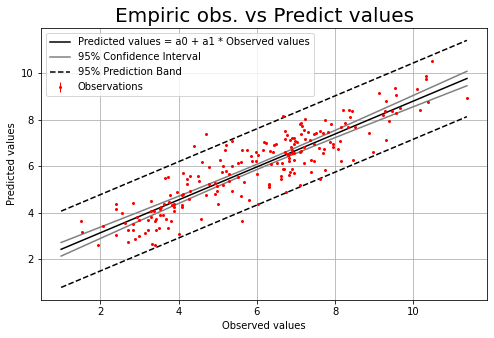

In [23]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [24]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [25]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: AEDR_mean: mean - 1.145, median - 1.147, CI - [1.099-1.195]

SHAP-values for: A_year: mean - 0.455, median - 0.457, CI - [0.408-0.505]

SHAP-values for: D_cm: mean - 0.227, median - 0.229, CI - [0.197-0.257]

SHAP-values for: F_Soil_ID: mean - 0.186, median - 0.187, CI - [0.152-0.22]

SHAP-values for: G_m2_ha: mean - 0.198, median - 0.198, CI - [0.164-0.227]

SHAP-values for: H_m: mean - 0.189, median - 0.189, CI - [0.157-0.217]

SHAP-values for: Species_ID: mean - 0.051, median - 0.048, CI - [0.037-0.063]



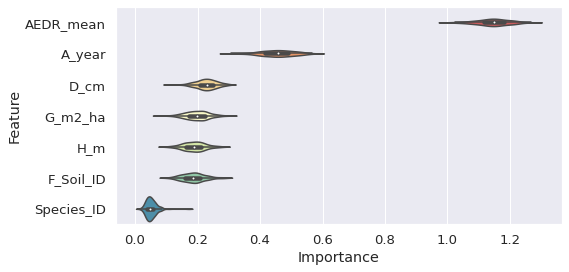

In [27]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['AEDR_mean', 'A_year', 'D_cm', 'G_m2_ha', 'H_m', 'F_Soil_ID', 'Species_ID'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [28]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [29]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 70.33, median: 63.5,
 pred. interval (P(0.025)-P(0.975)): 30.975-151.025, 
 conf. interval (p-value=0.95): 46.77-92.638 
***
Aggregate bias statistic: 
 mean: -0.031, median: -0.032,
 pred. interval (P(0.025)-P(0.975)): -0.359-0.298, 
 conf. interval (p-value=0.95): -0.181-0.134 
***
Aggregate RMSE statistic: 
 mean: 1.03, median: 1.027, pred. interval (P(0.025)-P(0.975)): 0.797-1.29, 
 conf. interval (p-value=0.95): 0.918-1.136 
***
Aggregate MSE statistic: 
 mean: 1.077, median: 1.055, pred. interval (P(0.025)-P(0.975)): 0.635-1.665, 
 conf. interval (p-value=0.95): 0.845-1.293 
***
Aggregate R^2 statistic: 
 mean: 0.747, median: 0.752, pred. interval (P(0.025)-P(0.975)): 0.611-0.851, 
 conf. interval (p-value=0.95): 0.69-0.808 
***
Aggregate bias(%) statistic: 
 mean: -0.448, median: -0.032, pred. interval (P(0.025)-P(0.975)): -5.496-4.955, 
 conf. interval (p-value=0.95): -2.992

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

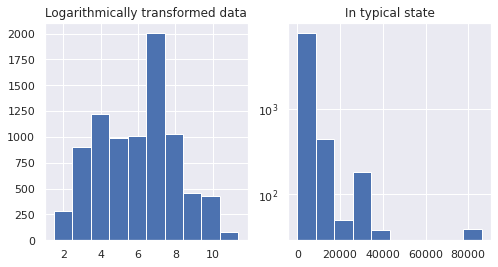

In [30]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [31]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [0, 2, 4, 6, 8, 10])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 1000, 2000, 5000, 10000, 100000])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

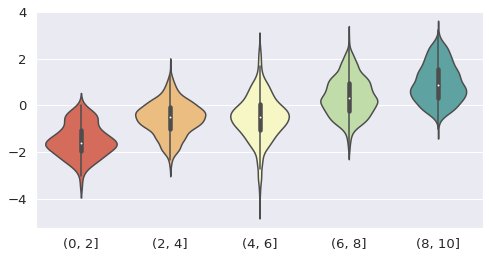

In [33]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

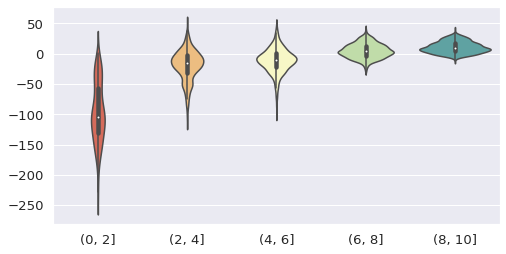

In [34]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

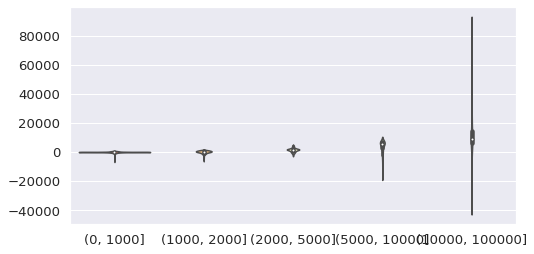

In [35]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

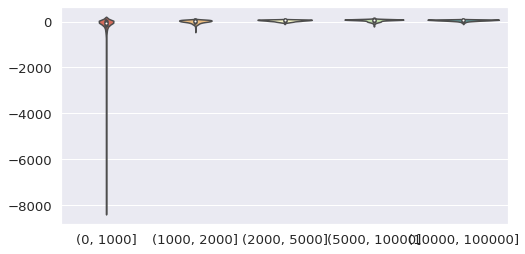

In [36]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [37]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [38]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [39]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:5.15401
[1]	validation_0-rmse:4.55860
[2]	validation_0-rmse:4.00190
[3]	validation_0-rmse:3.50652
[4]	validation_0-rmse:3.08754
[5]	validation_0-rmse:2.72554
[6]	validation_0-rmse:2.44555
[7]	validation_0-rmse:2.20903
[8]	validation_0-rmse:2.01202
[9]	validation_0-rmse:1.79735


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.61918
[11]	validation_0-rmse:1.46413
[12]	validation_0-rmse:1.33830
[13]	validation_0-rmse:1.24536
[14]	validation_0-rmse:1.17398
[15]	validation_0-rmse:1.09008
[16]	validation_0-rmse:1.03590
[17]	validation_0-rmse:0.97019
[18]	validation_0-rmse:0.91572
[19]	validation_0-rmse:0.88727
[20]	validation_0-rmse:0.85263
[21]	validation_0-rmse:0.81544
[22]	validation_0-rmse:0.78588
[23]	validation_0-rmse:0.76944
[24]	validation_0-rmse:0.74271
[25]	validation_0-rmse:0.72068
[26]	validation_0-rmse:0.69763
[27]	validation_0-rmse:0.68384
[28]	validation_0-rmse:0.67106
[29]	validation_0-rmse:0.66253
[30]	validation_0-rmse:0.65247
[31]	validation_0-rmse:0.64656
[32]	validation_0-rmse:0.63937
[33]	validation_0-rmse:0.62821
[34]	validation_0-rmse:0.61851
[35]	validation_0-rmse:0.61318
[36]	validation_0-rmse:0.60540
[37]	validation_0-rmse:0.59685
[38]	validation_0-rmse:0.58751
[39]	validation_0-rmse:0.58224
[40]	validation_0-rmse:0.57881
[41]	validation_0-rmse:0.57280
[42]	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [40]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 158


In [41]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

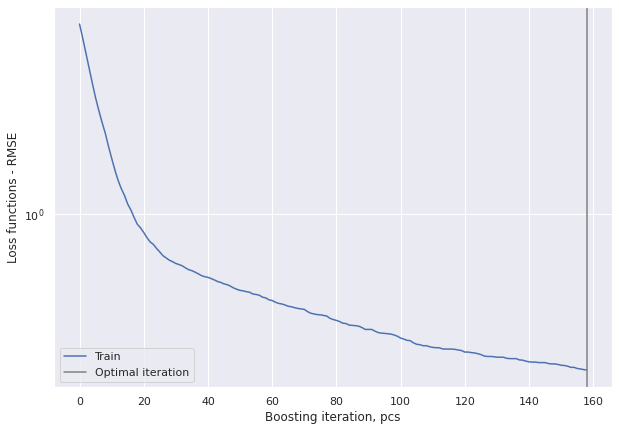

In [42]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [43]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.01
RMSE: 0.3
Relative RMSE(%):  4.362
MSE: 0.1
R square: 98.5%


In [44]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.985
Uncertainty
a0: 0.24+/-0.05
a1: 0.959+/-0.008


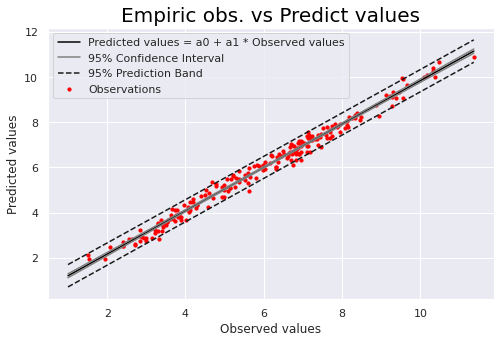

In [46]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

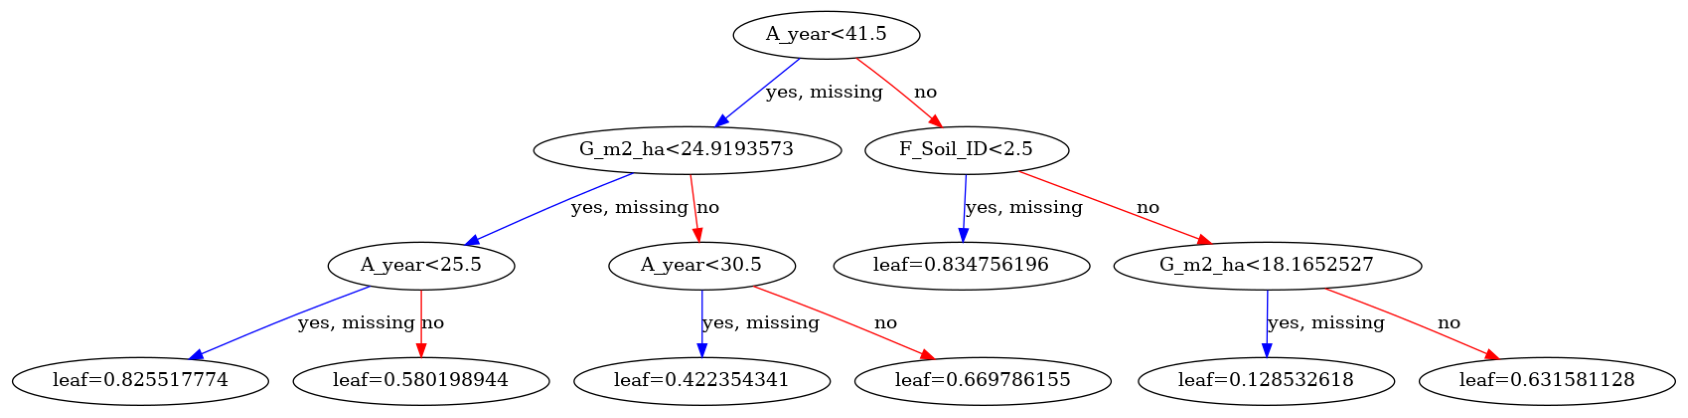

In [48]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

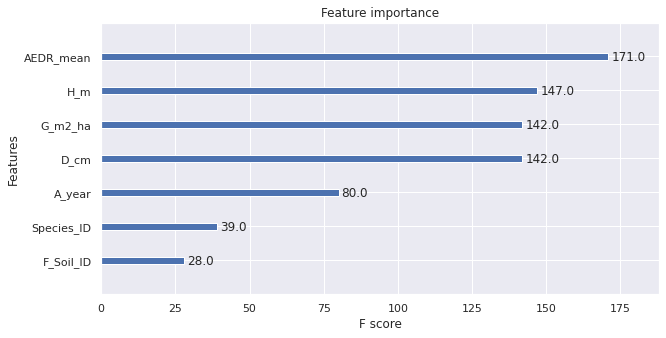

In [50]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

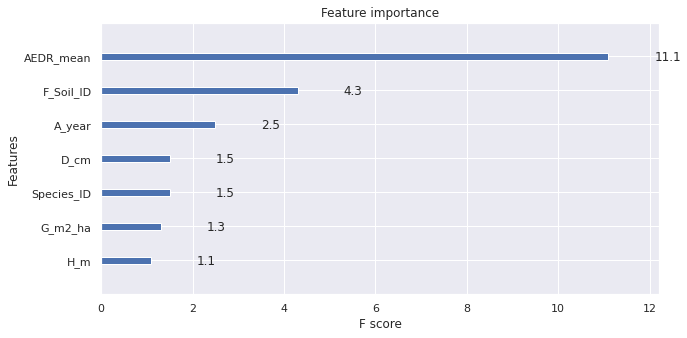

In [51]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

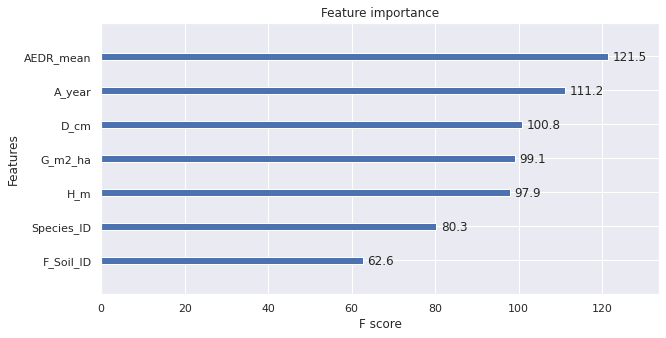

In [52]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [53]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


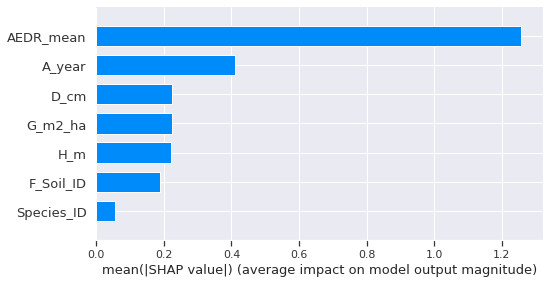

In [54]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

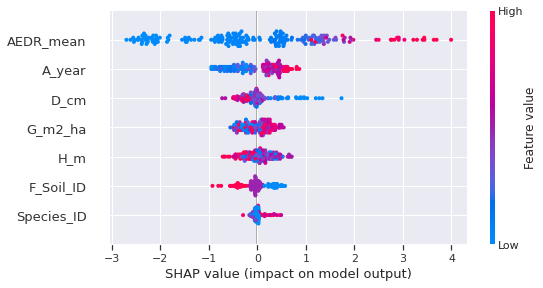

In [55]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

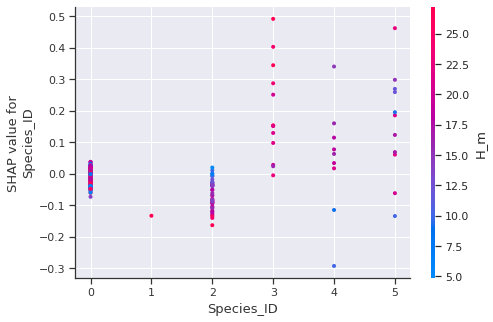

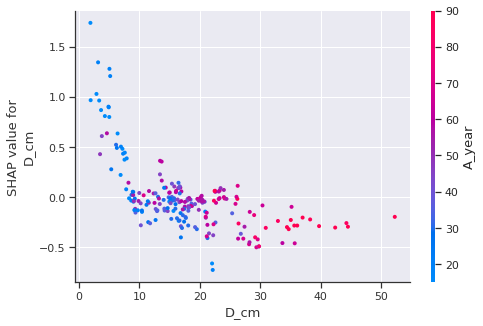

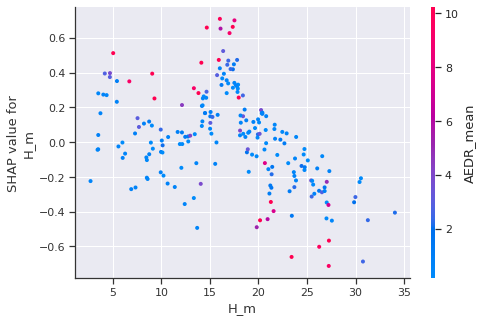

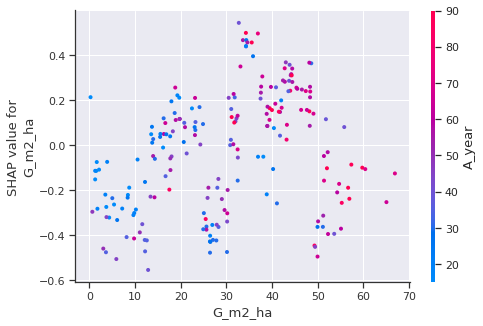

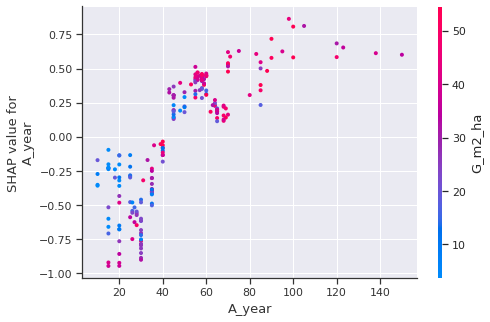

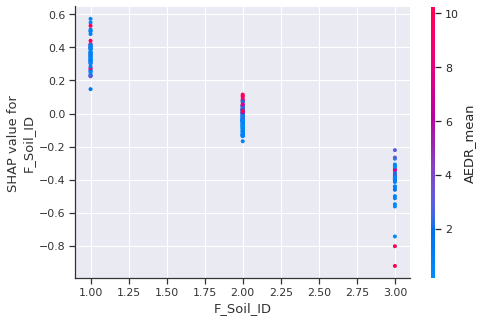

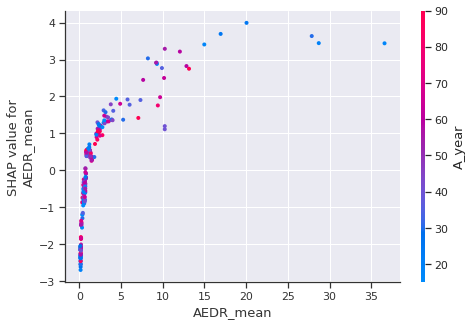

In [56]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [57]:
# Save to JSON
f_xgb_model.save_model("../02_output_data/XGBoost_models/01_LN_Cs_content_without_geo_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../02_output_data/XGBoost_models/01_LN_Cs_content_without_geo_XGB_model.txt")